Notebook for visualizing voltage scan images collected by Xenics camera.

# Imports

In [1]:
import numpy as np
import scipy.ndimage
import matplotlib
matplotlib.use("TkAgg")
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
%matplotlib inline

import PIC_lib as PIC

import imageio, io, glob

# Plot 1D voltage scan

Read in data and darks

C:\Users\Pradip\AppData\Local\Temp\ipykernel_3312\583592812.py:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im0 = ax[0].pcolormesh(x, y, data, norm=cbar_norm)
C:\Users\Pradip\AppData\Local\Temp\ipykernel_3312\583592812.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im1 = ax[1].pcolormesh(x, y, dark, norm=cbar_norm)
C:\Users\Pradip\AppData\Local\Temp\ipykernel_3312\583592812.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the 

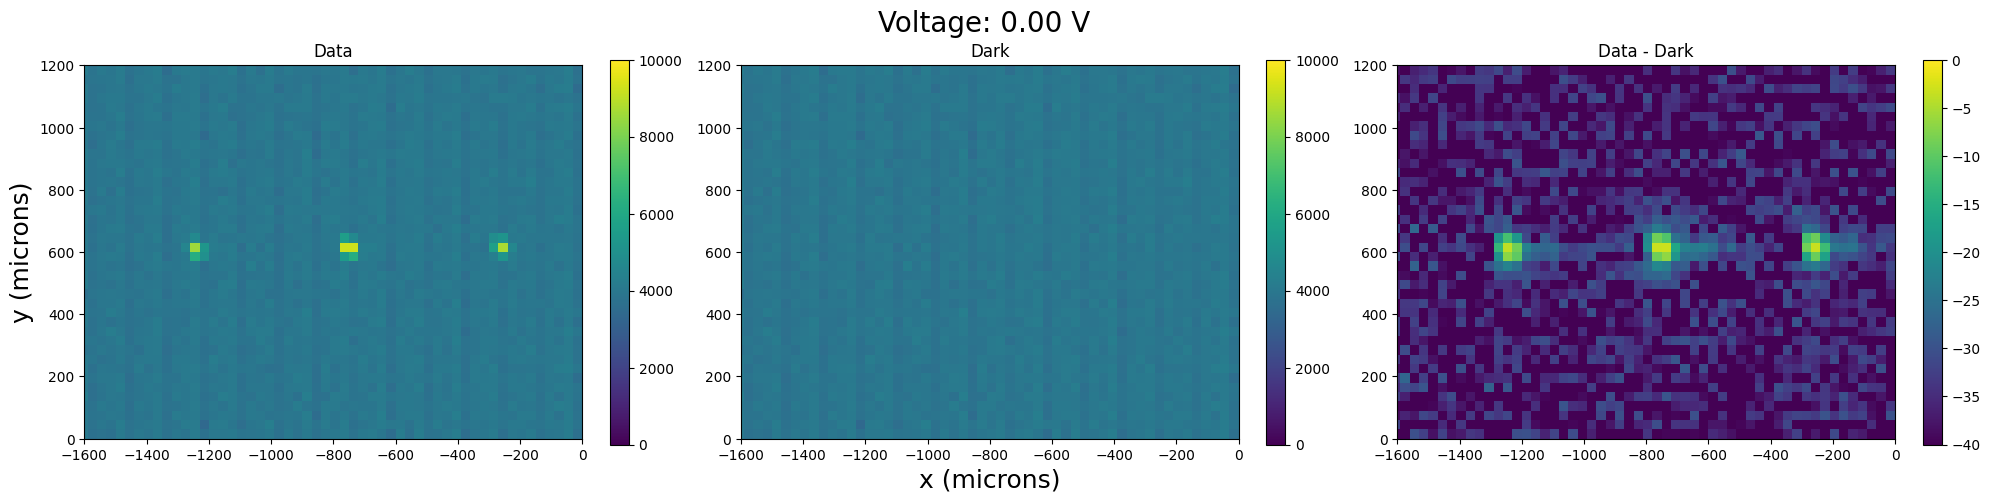

C:\Users\Pradip\AppData\Local\Temp\ipykernel_3312\583592812.py:59: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(buf))


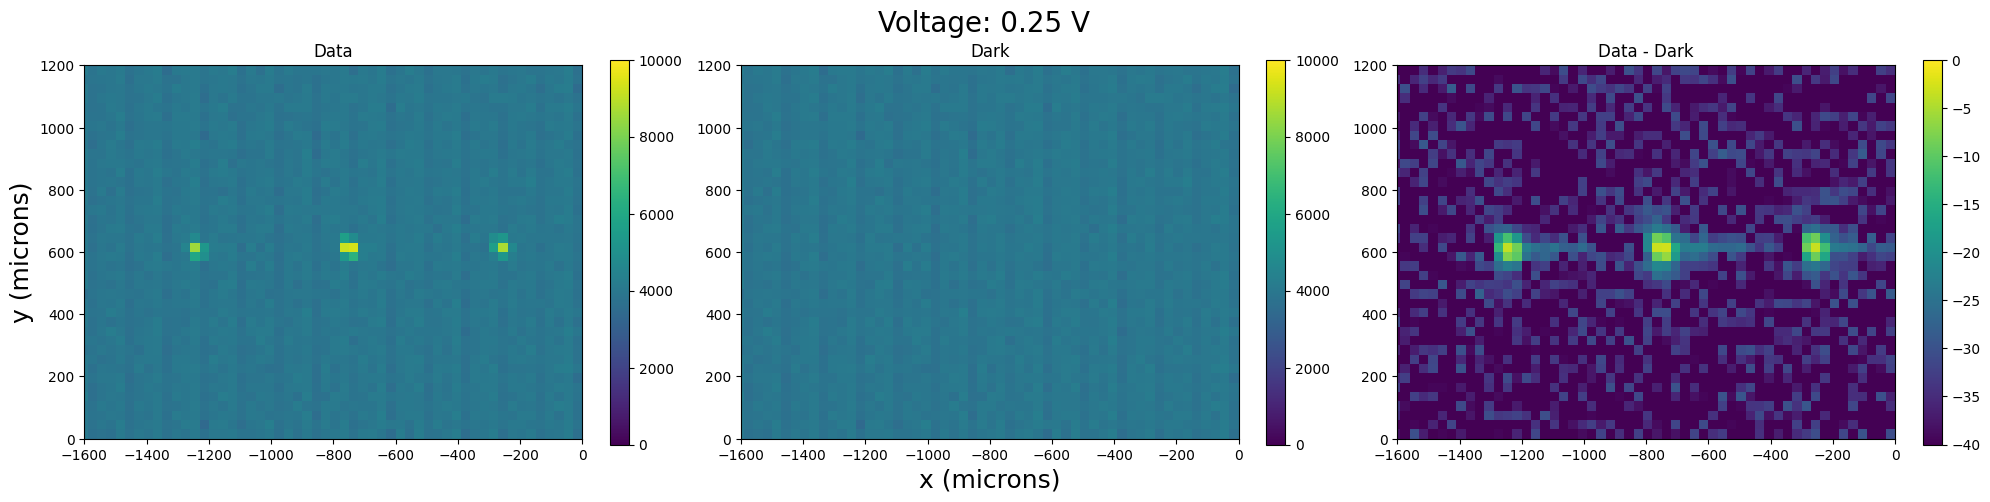

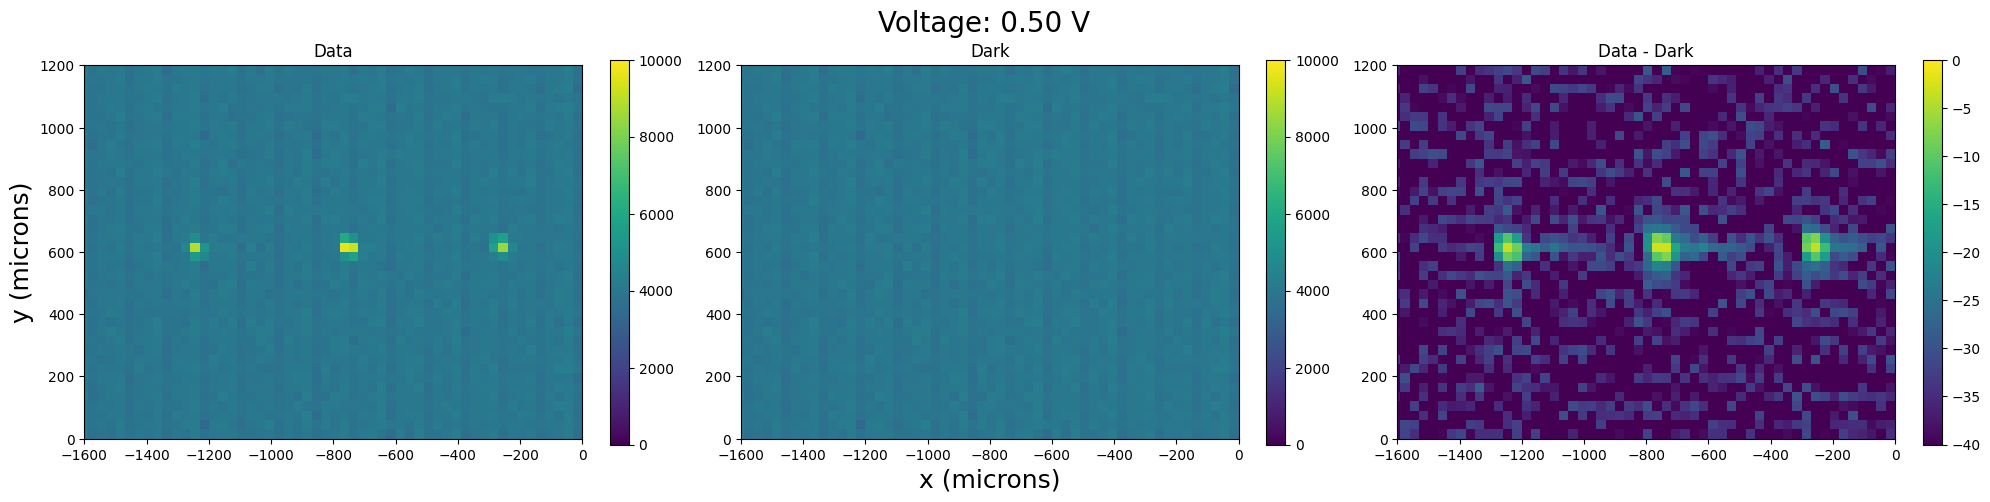

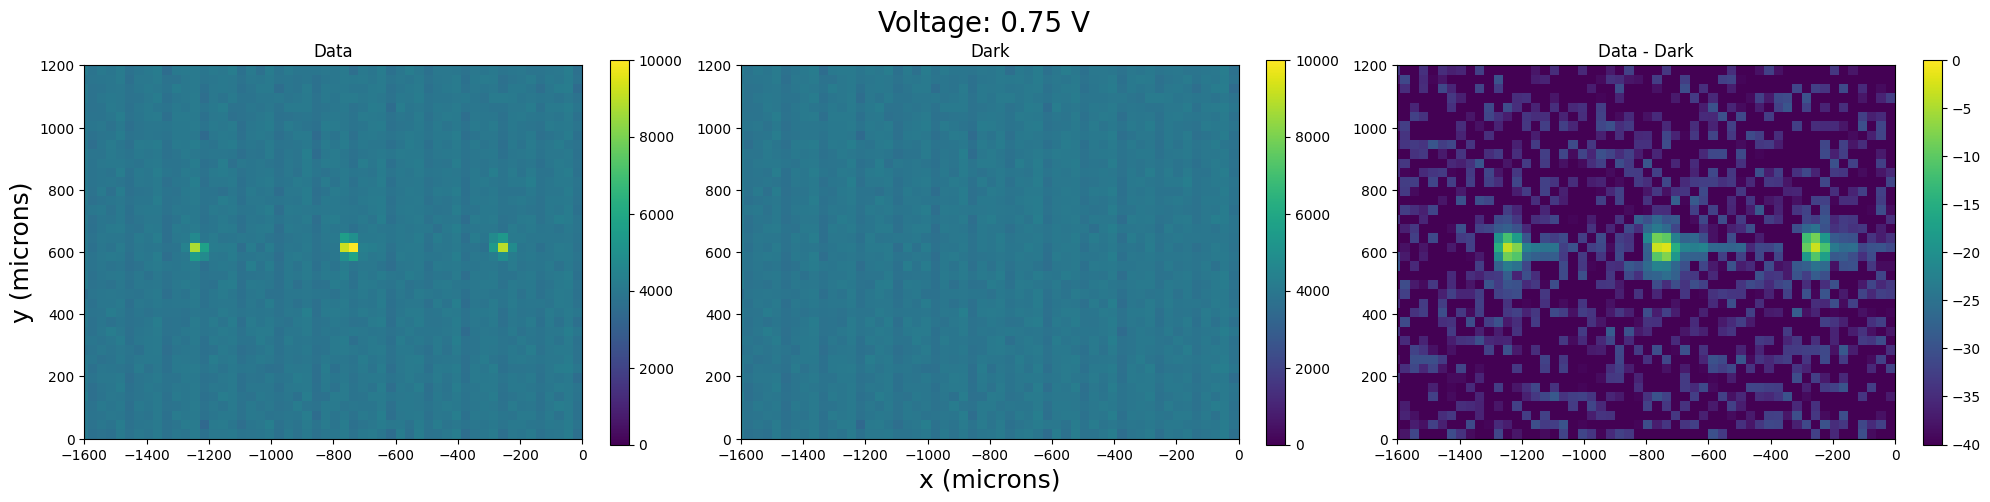

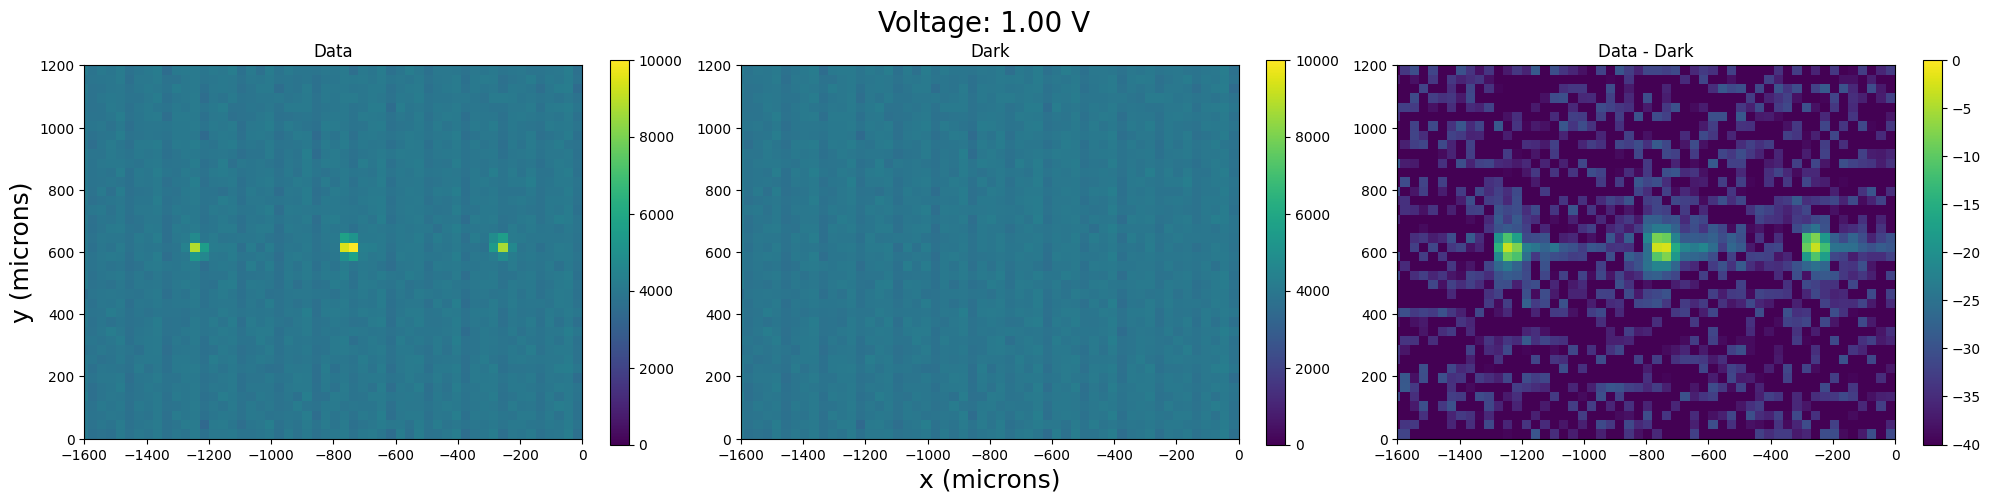

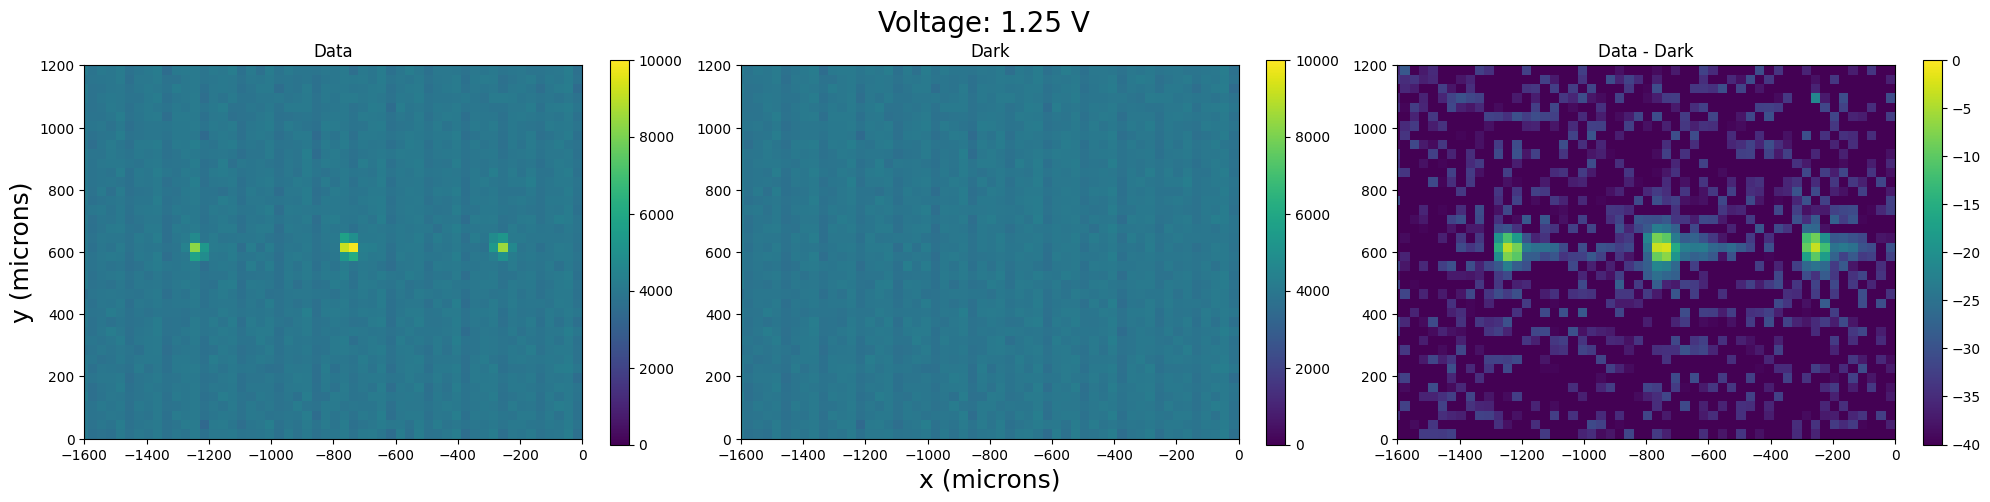

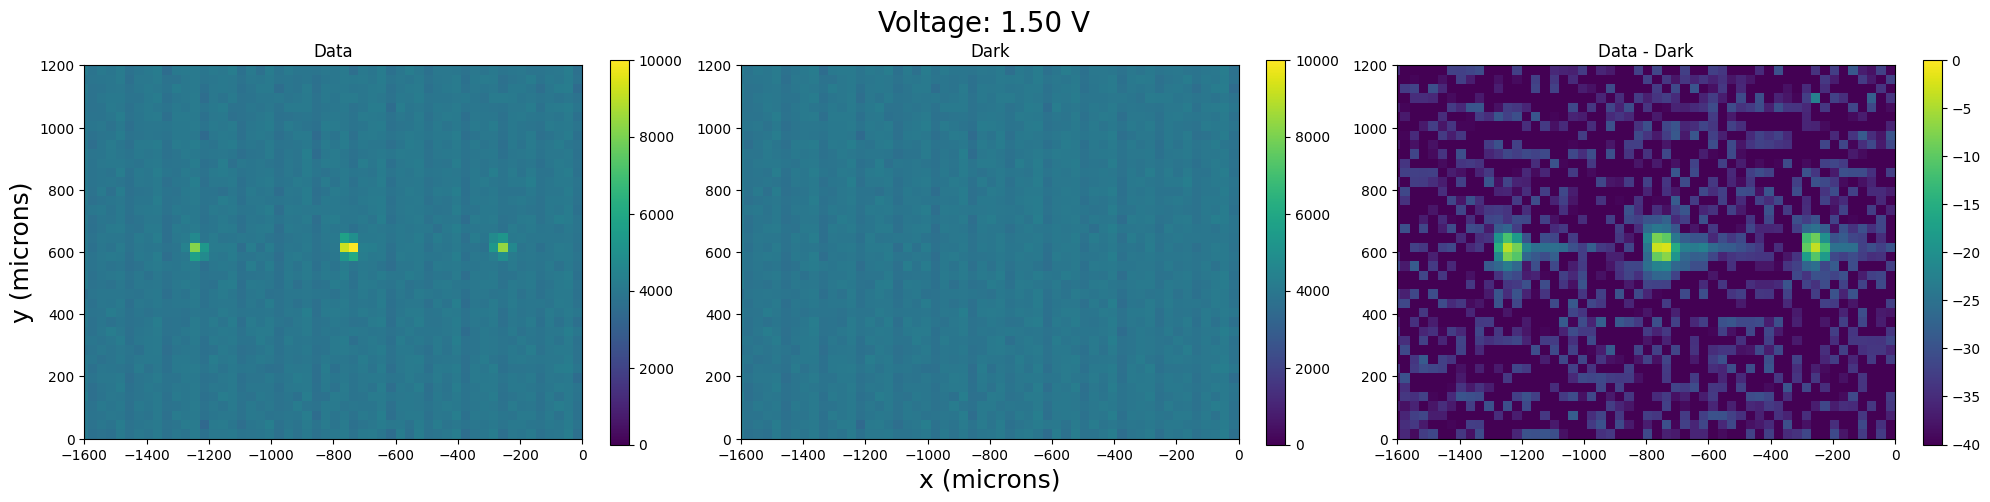

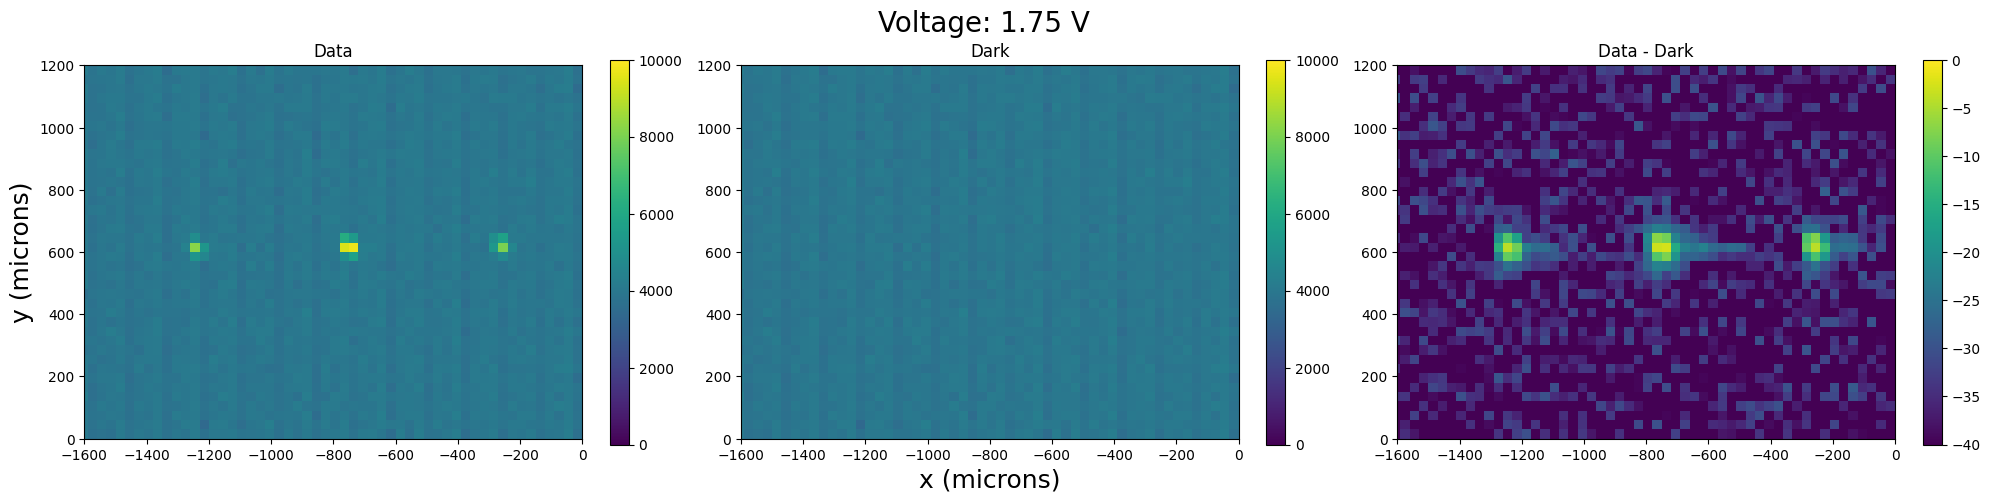

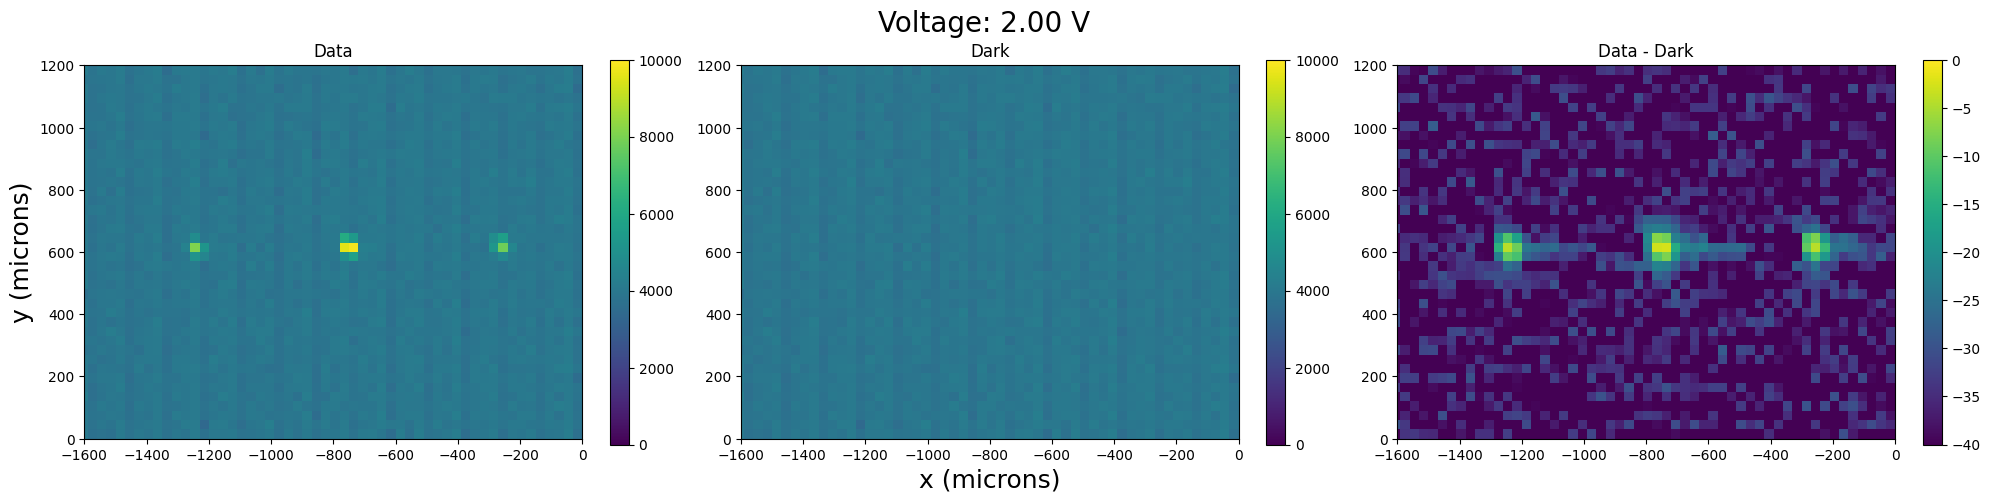

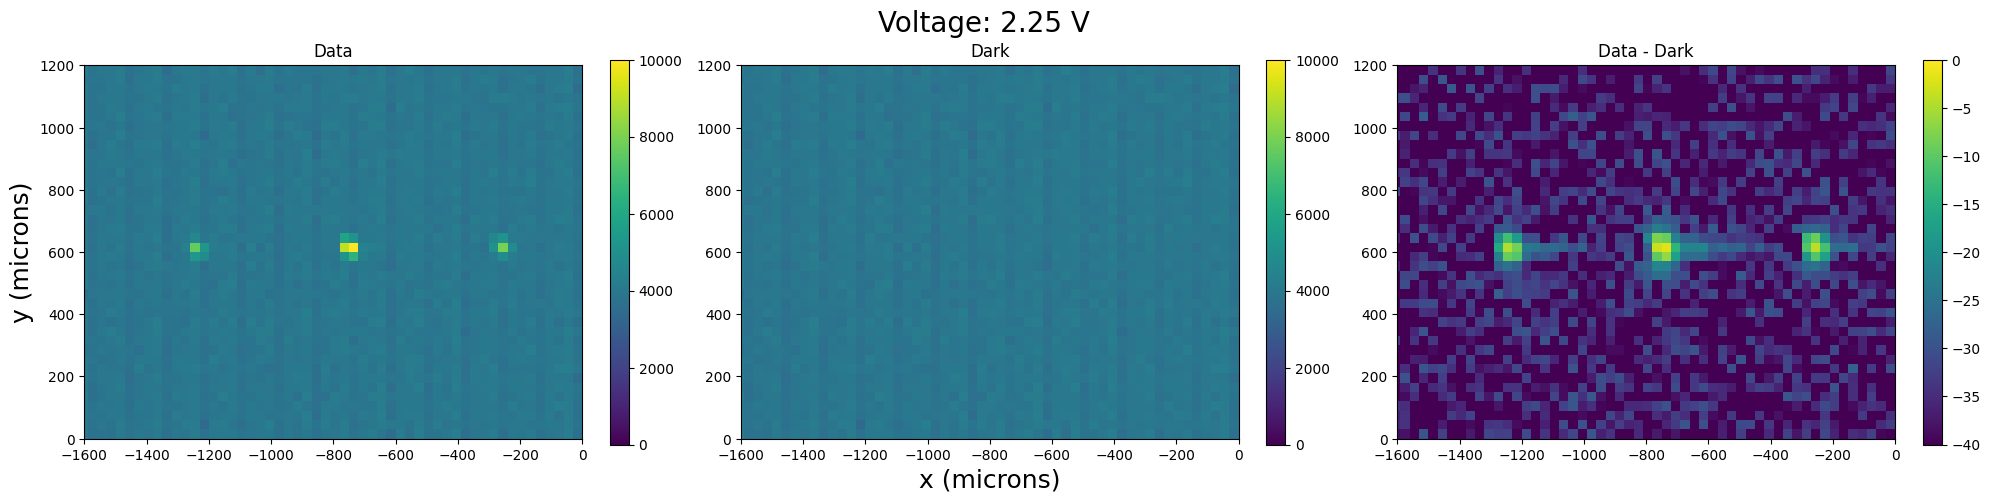

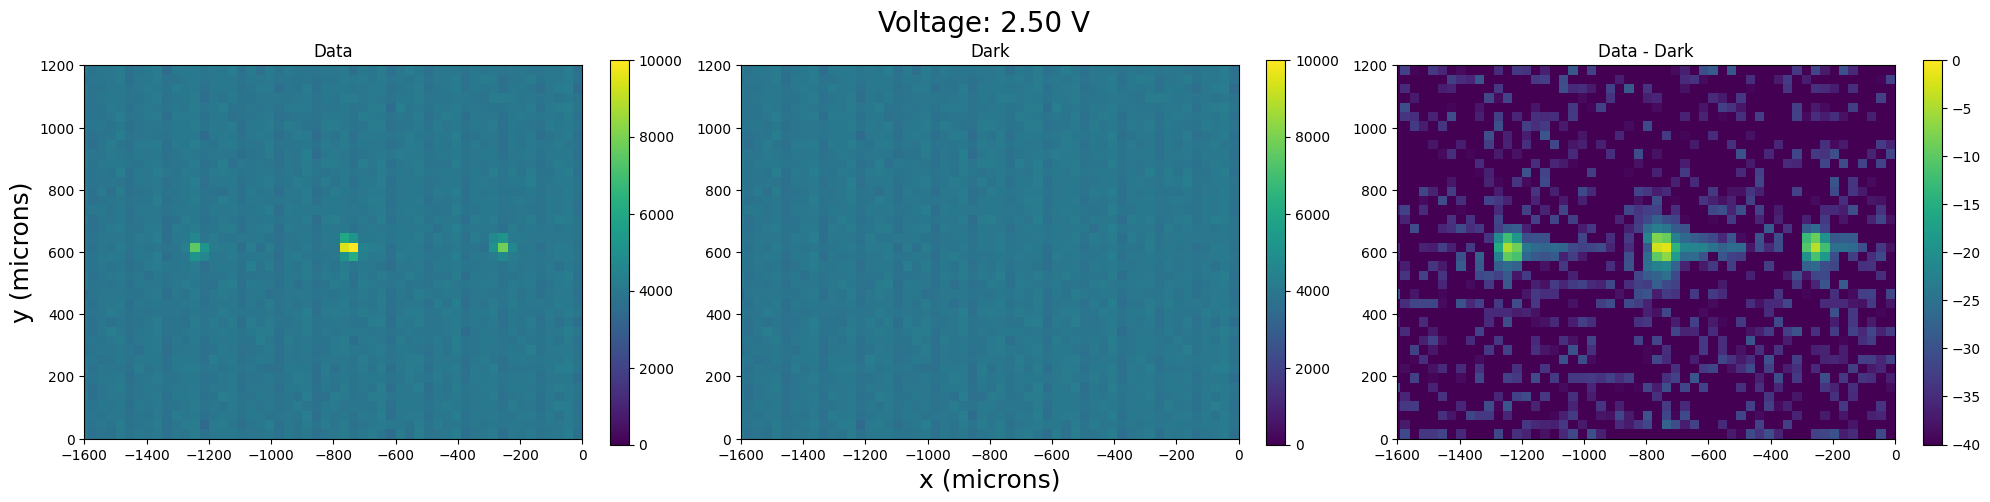

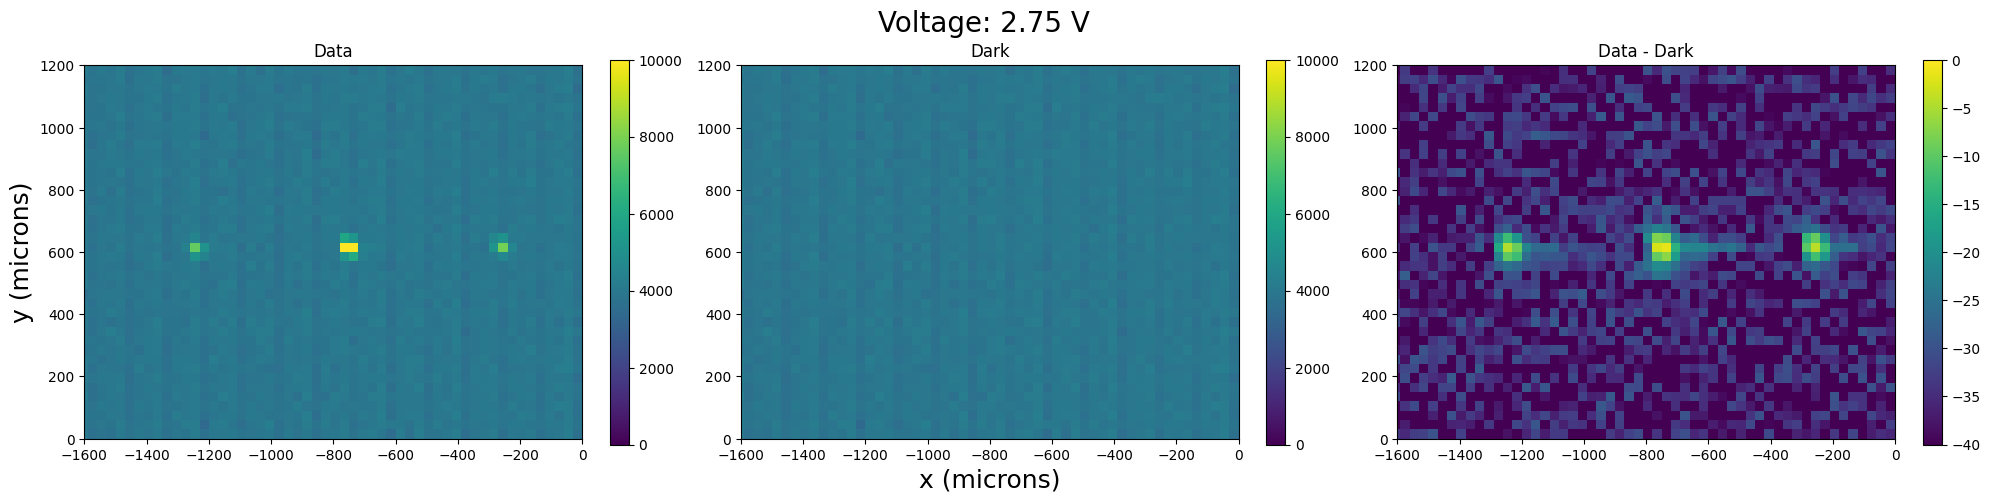

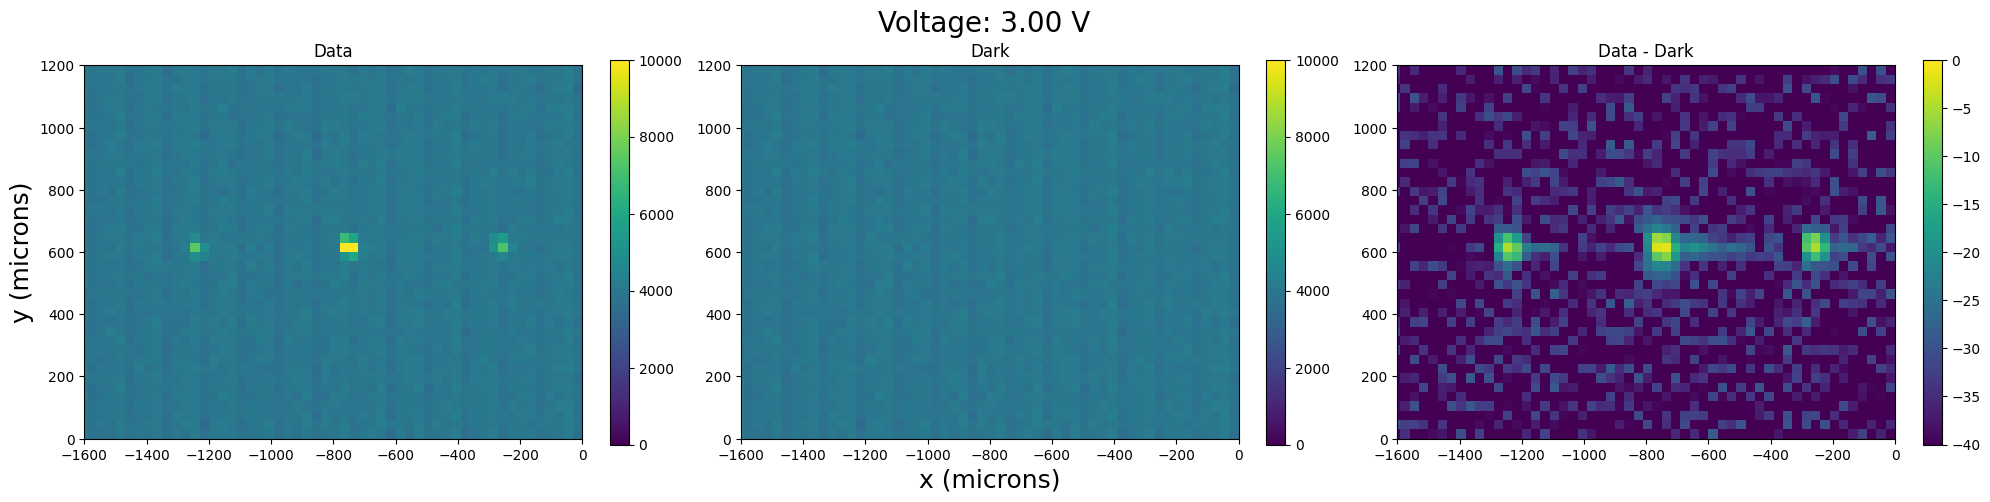

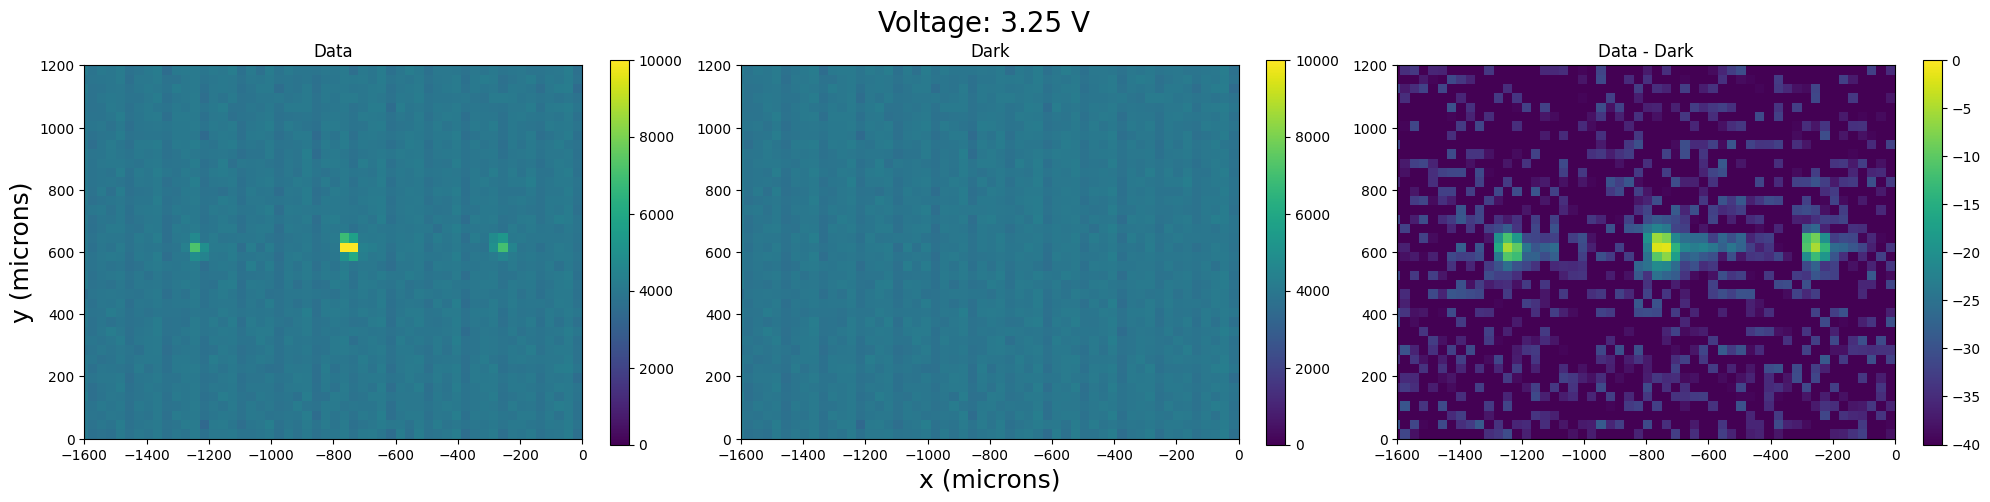

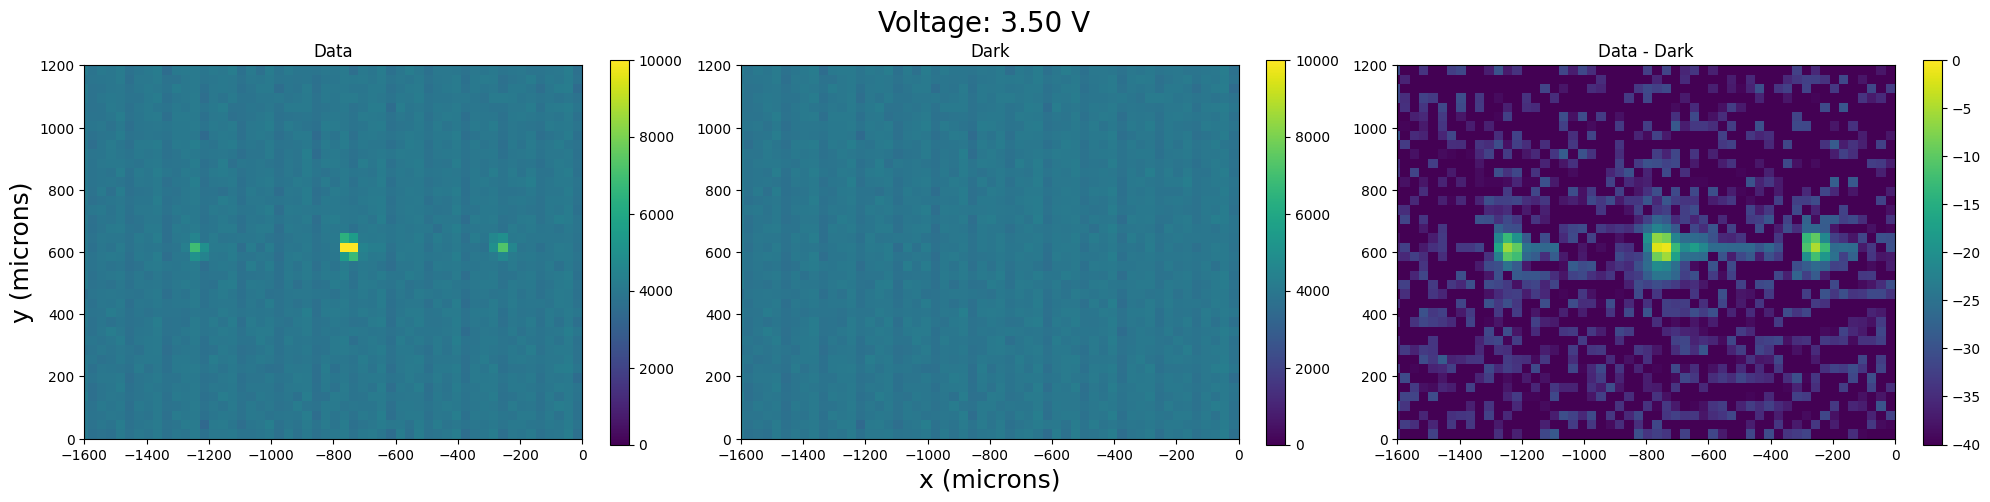

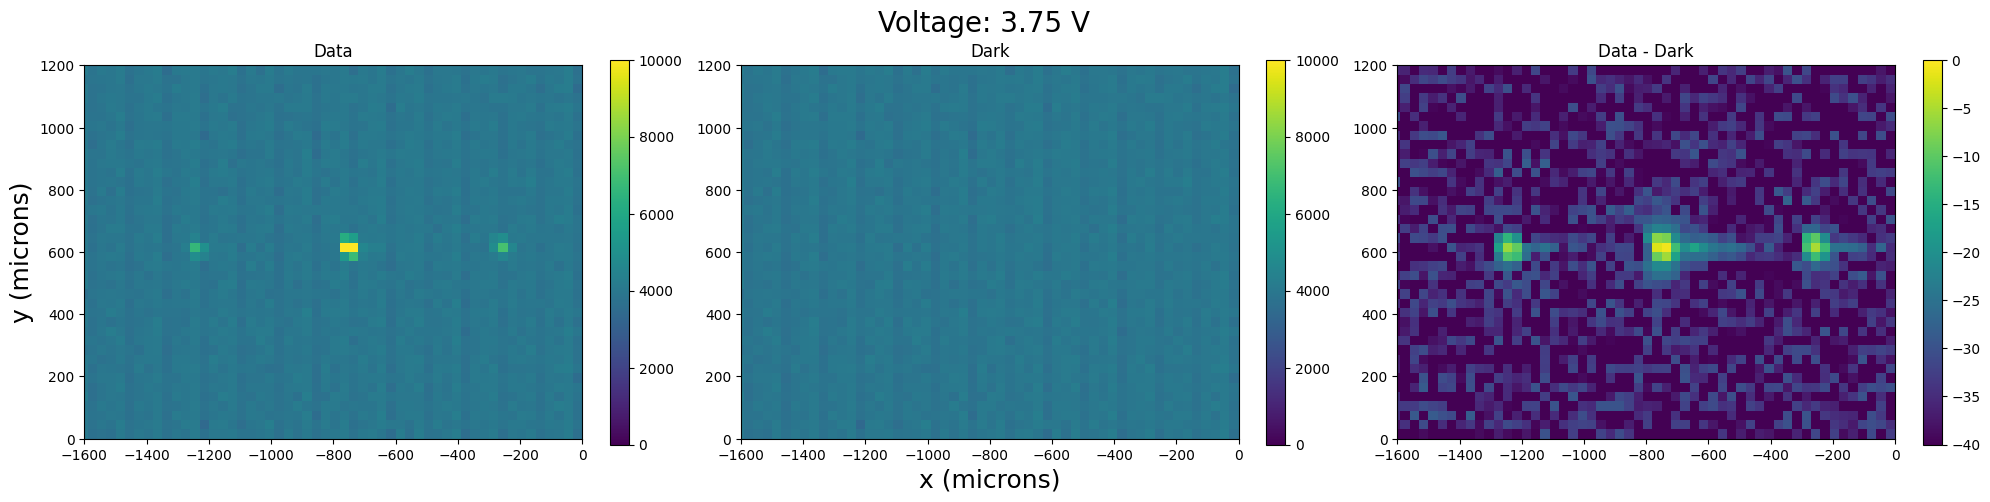

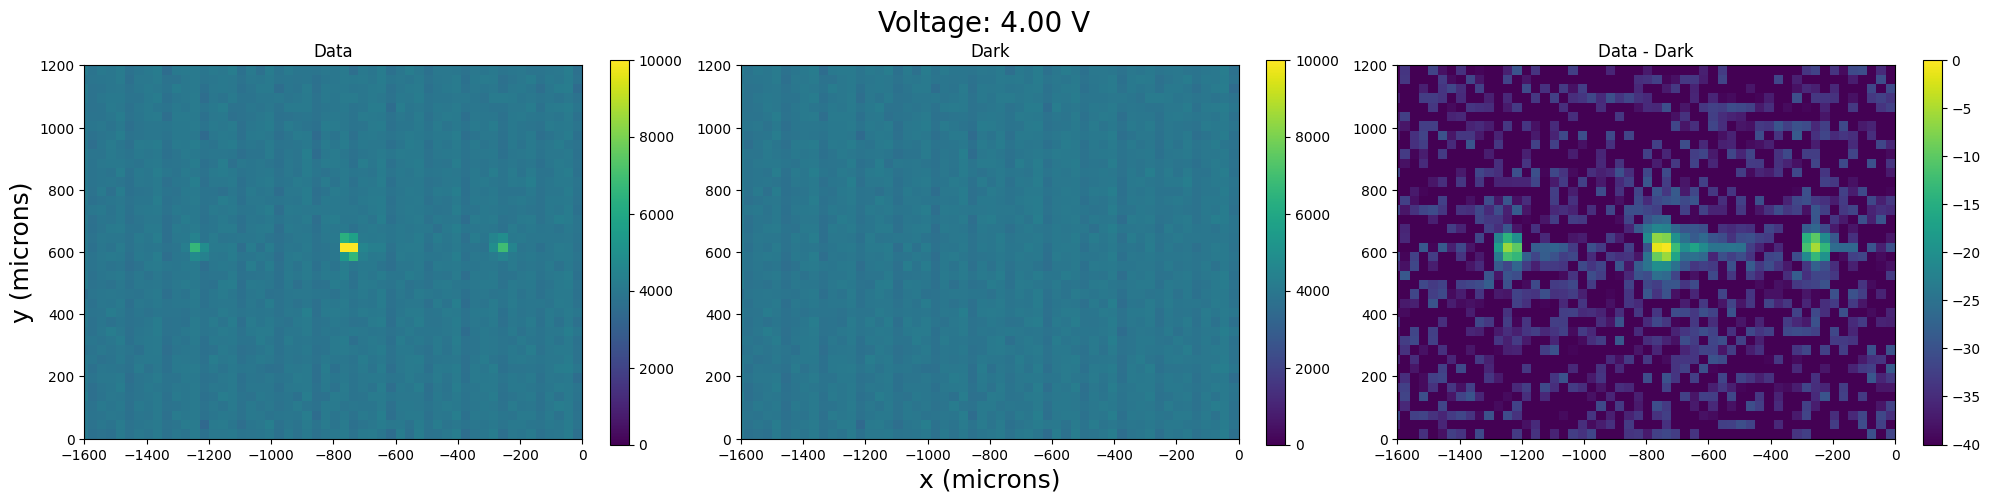

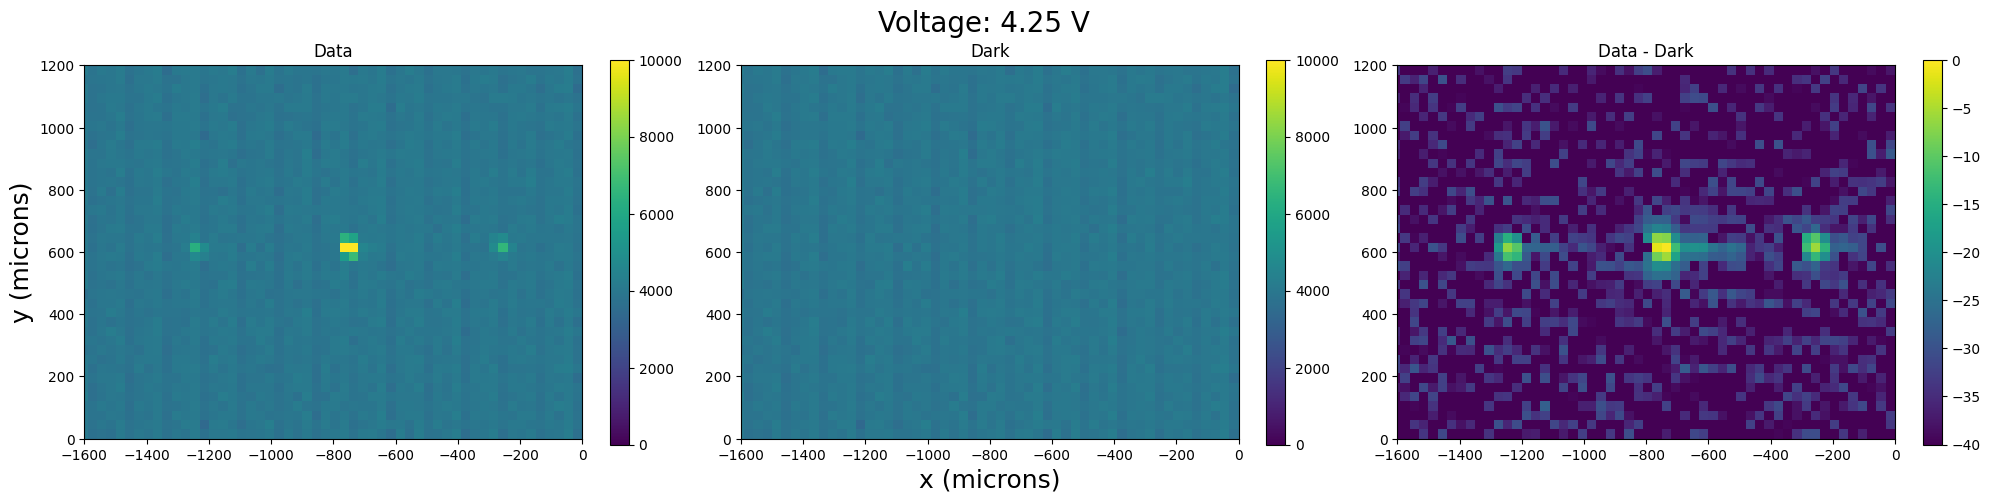

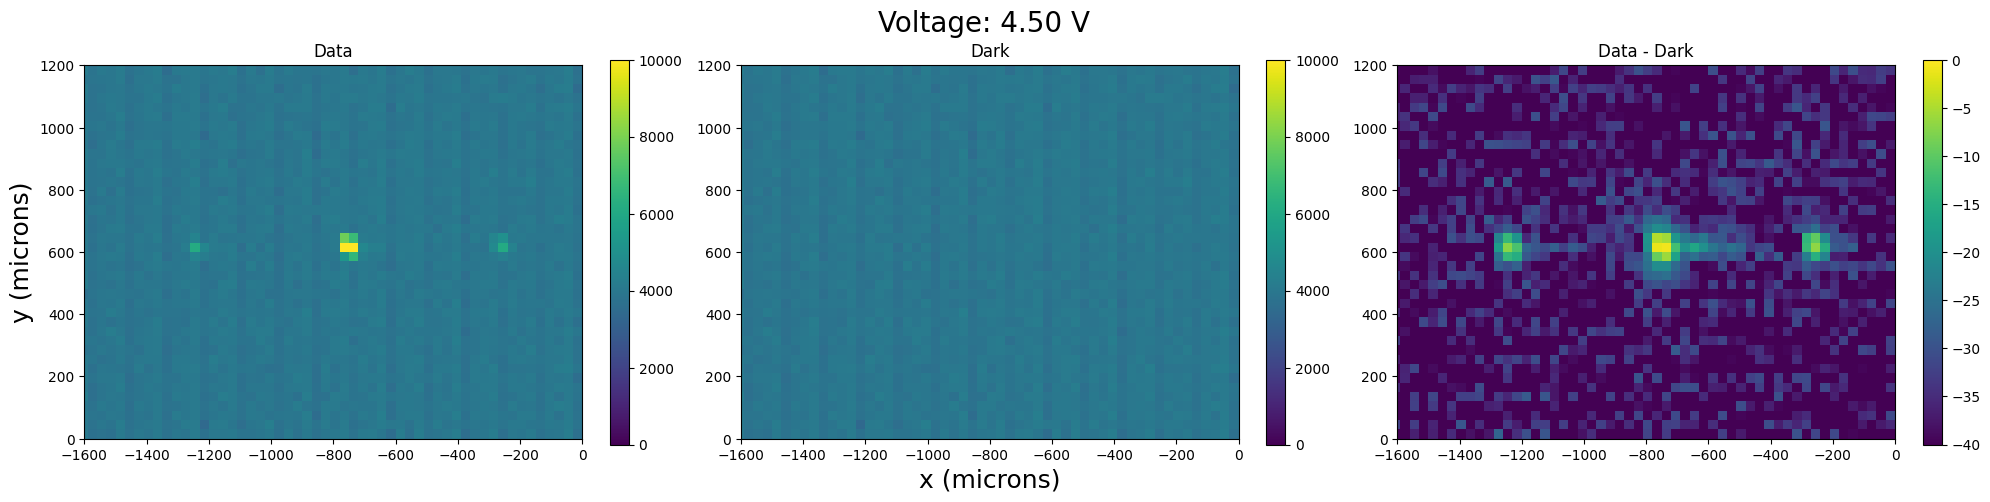

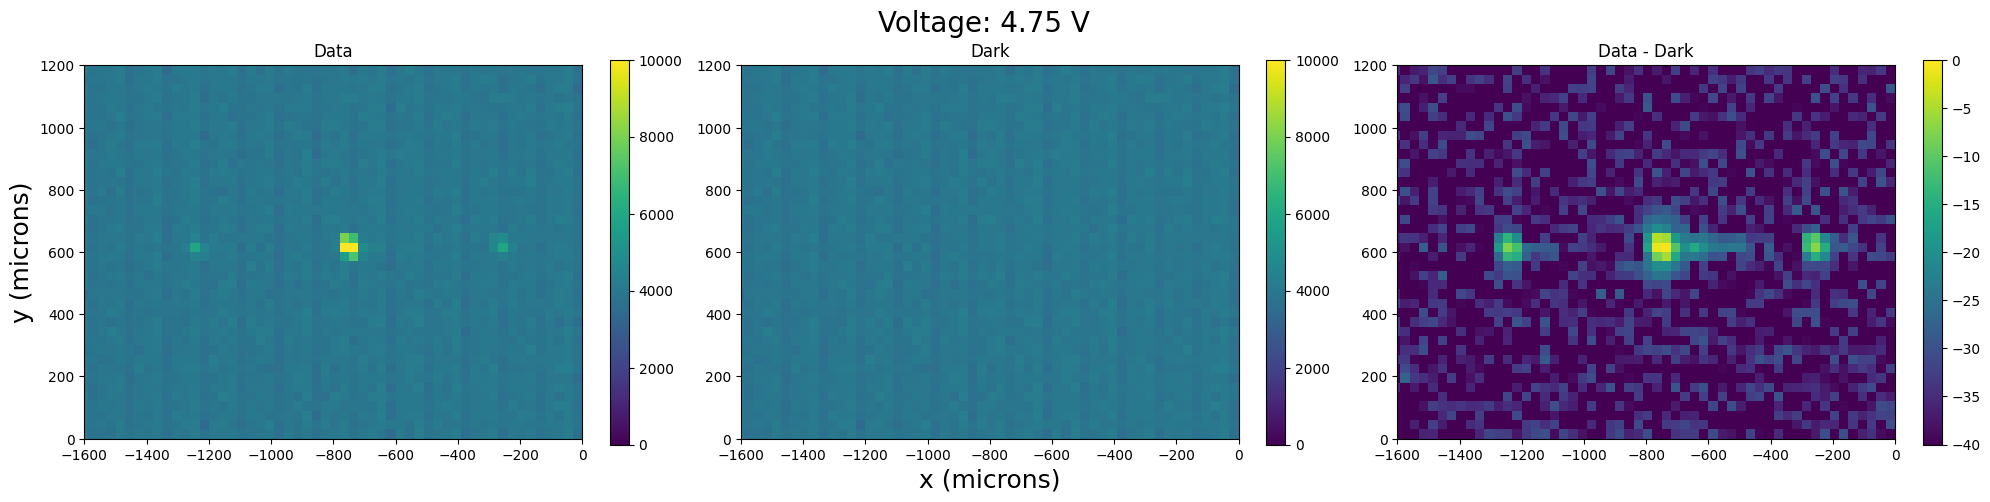

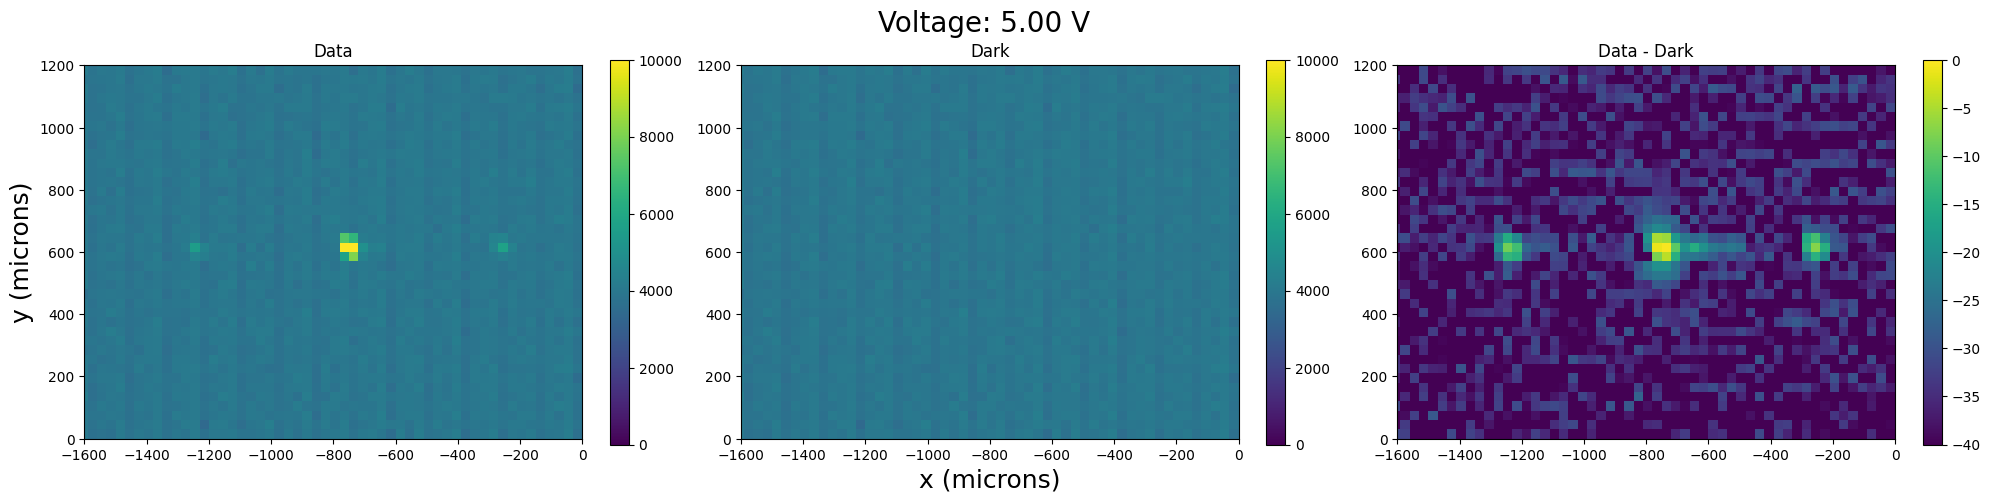

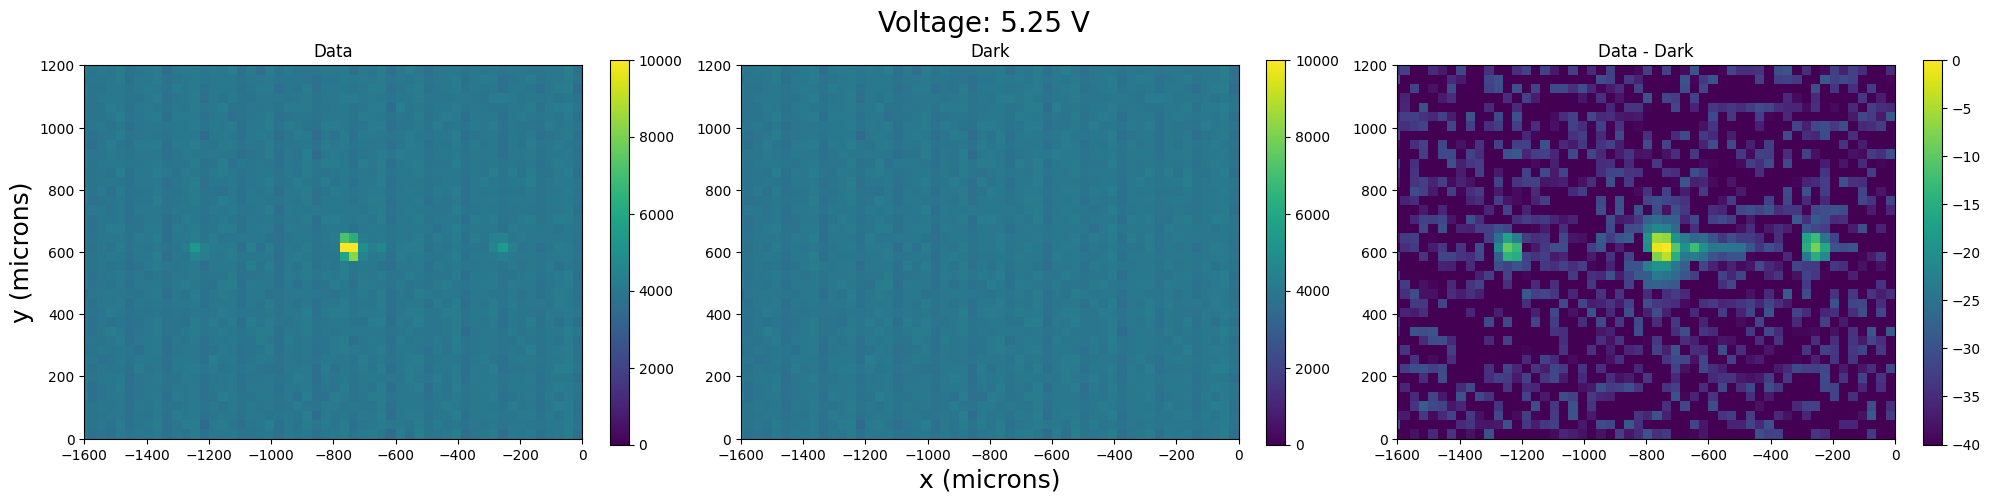

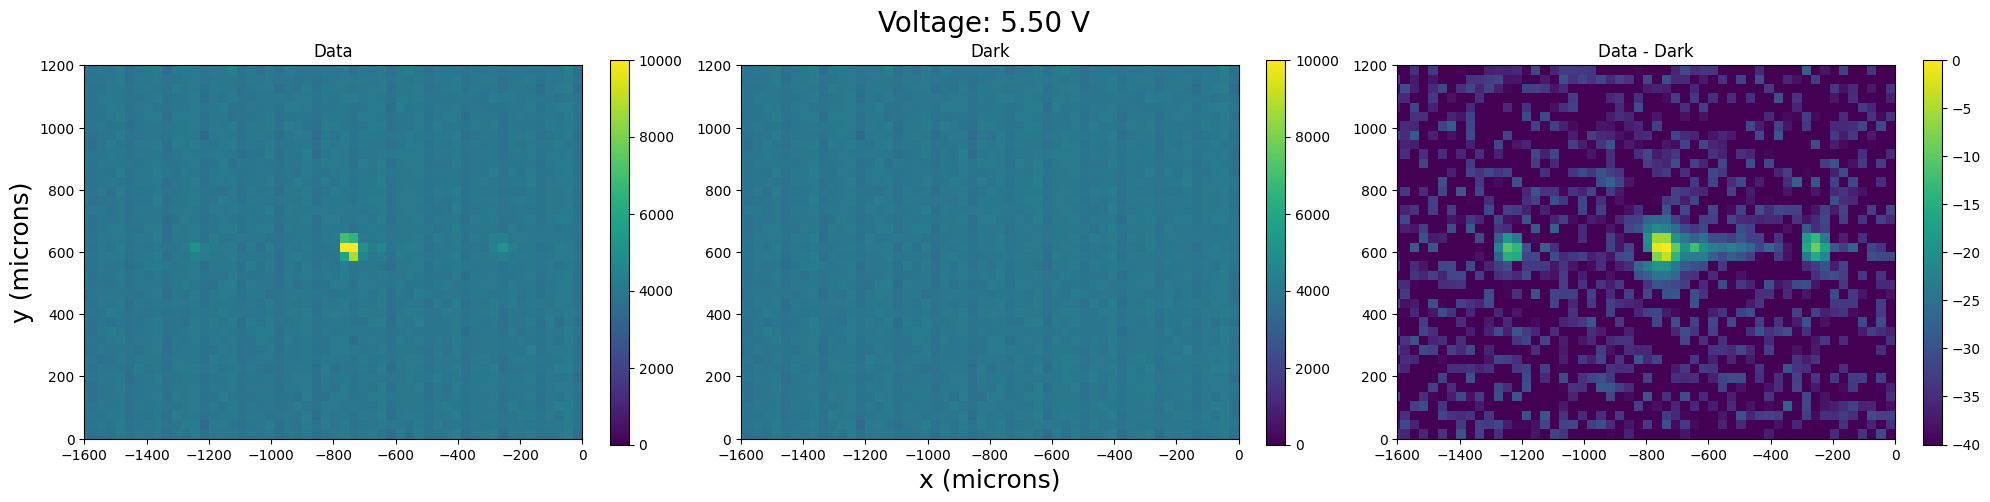

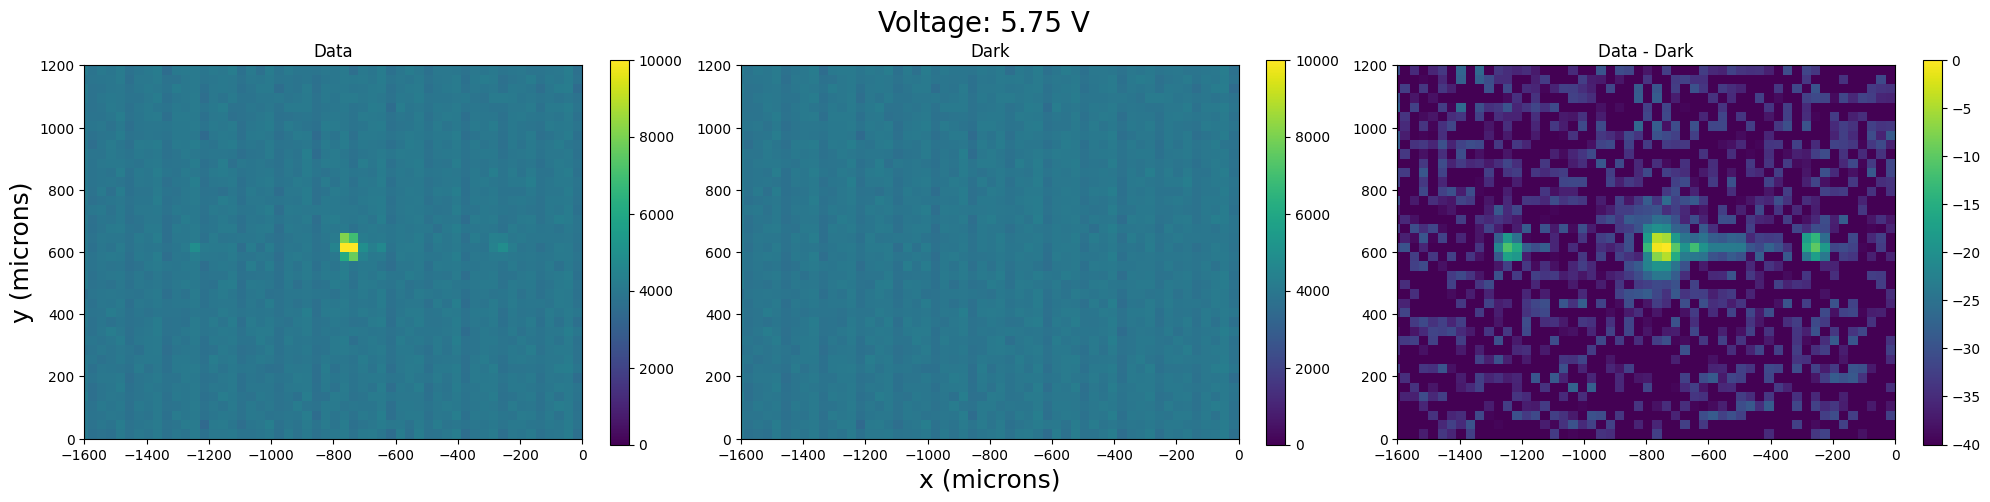

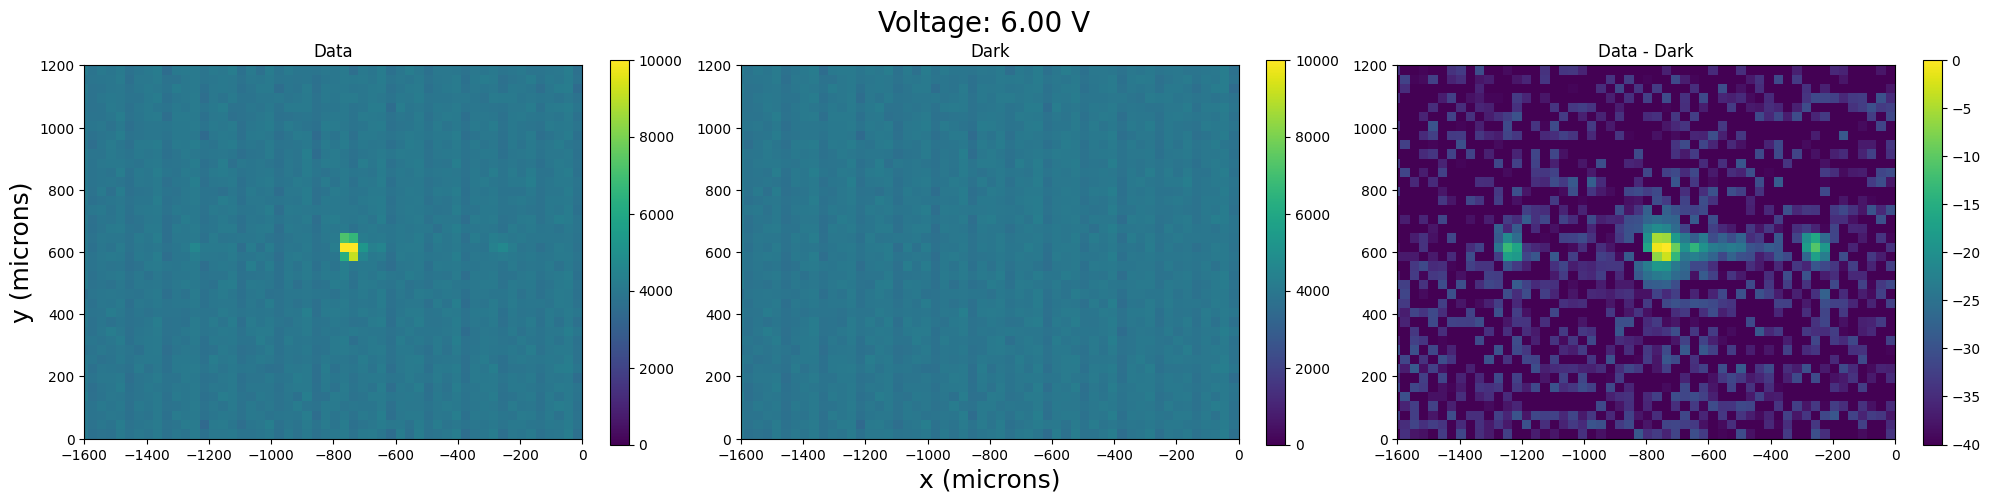

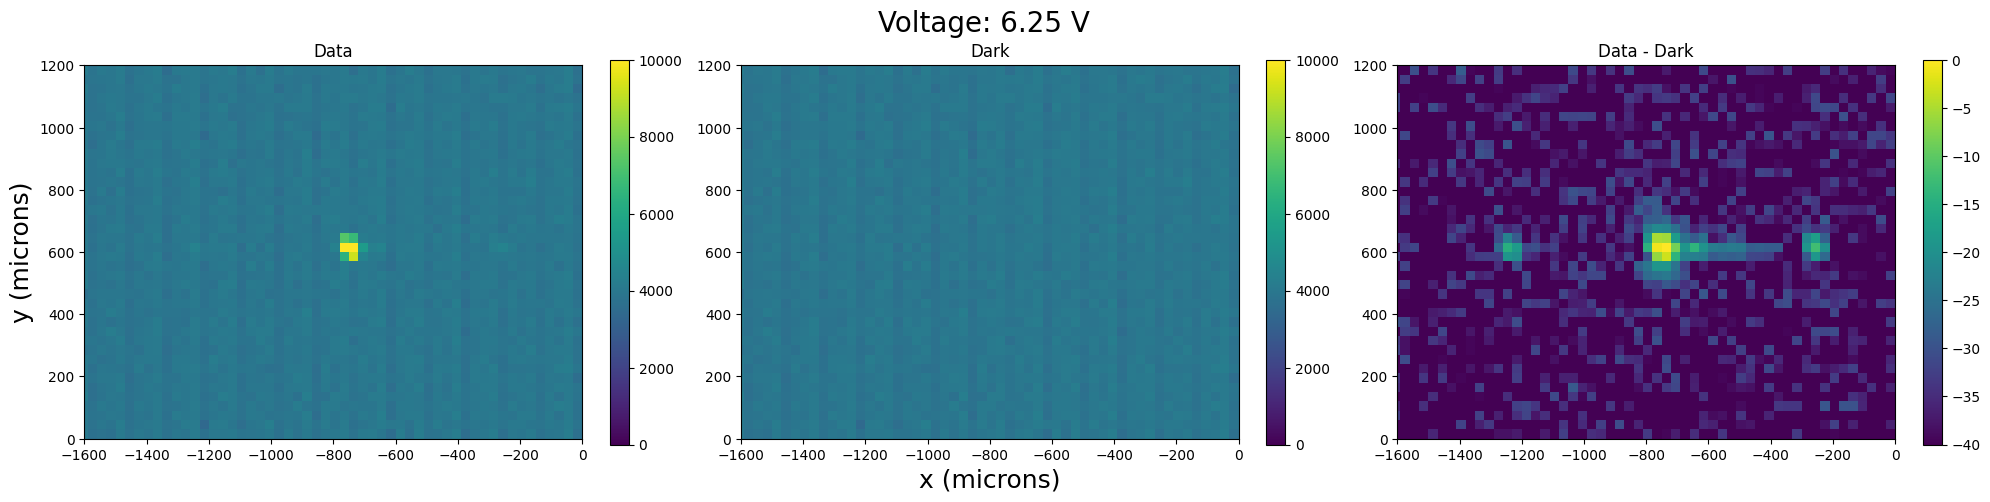

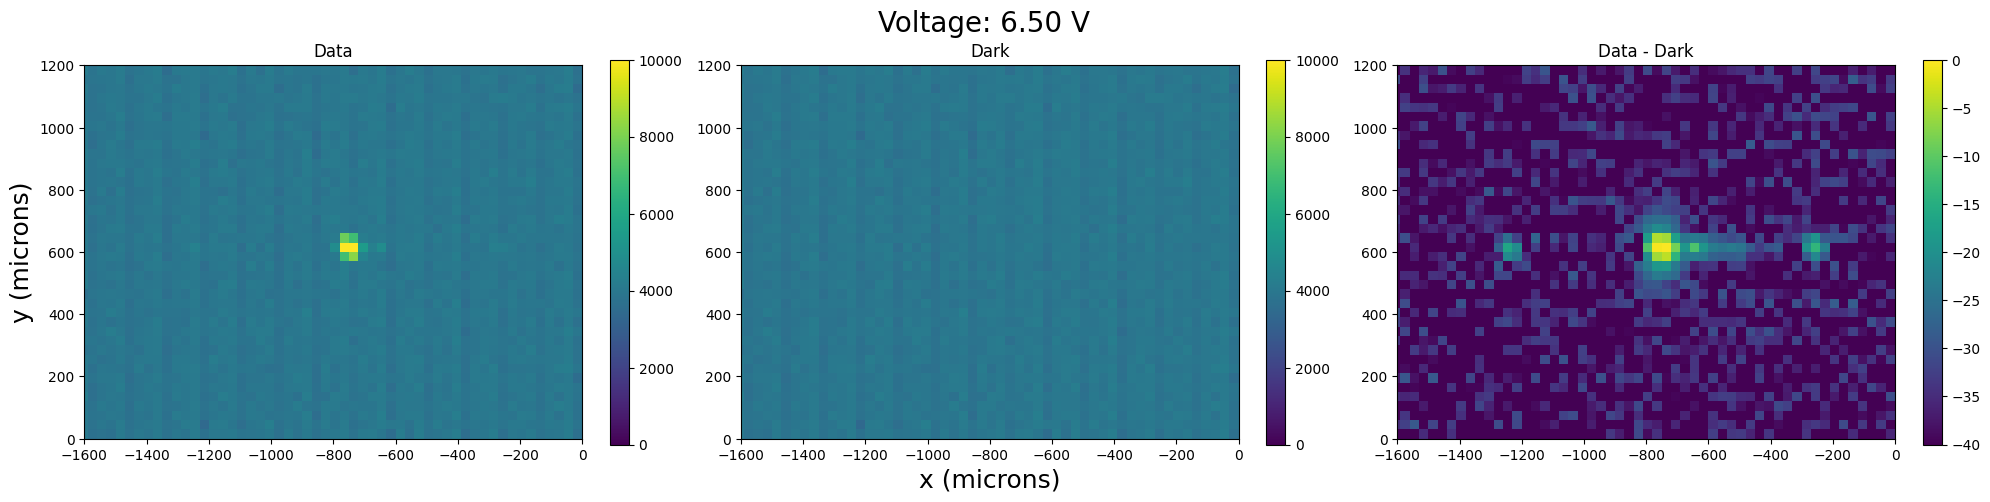

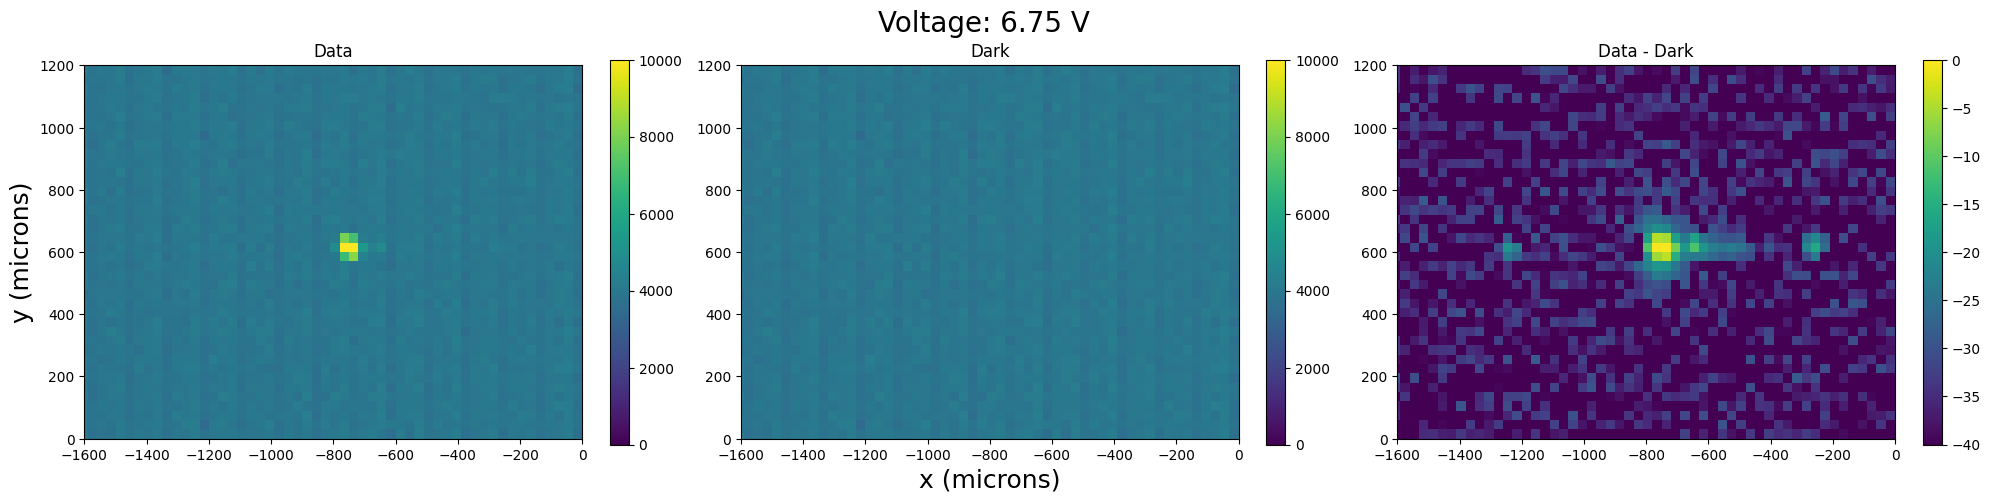

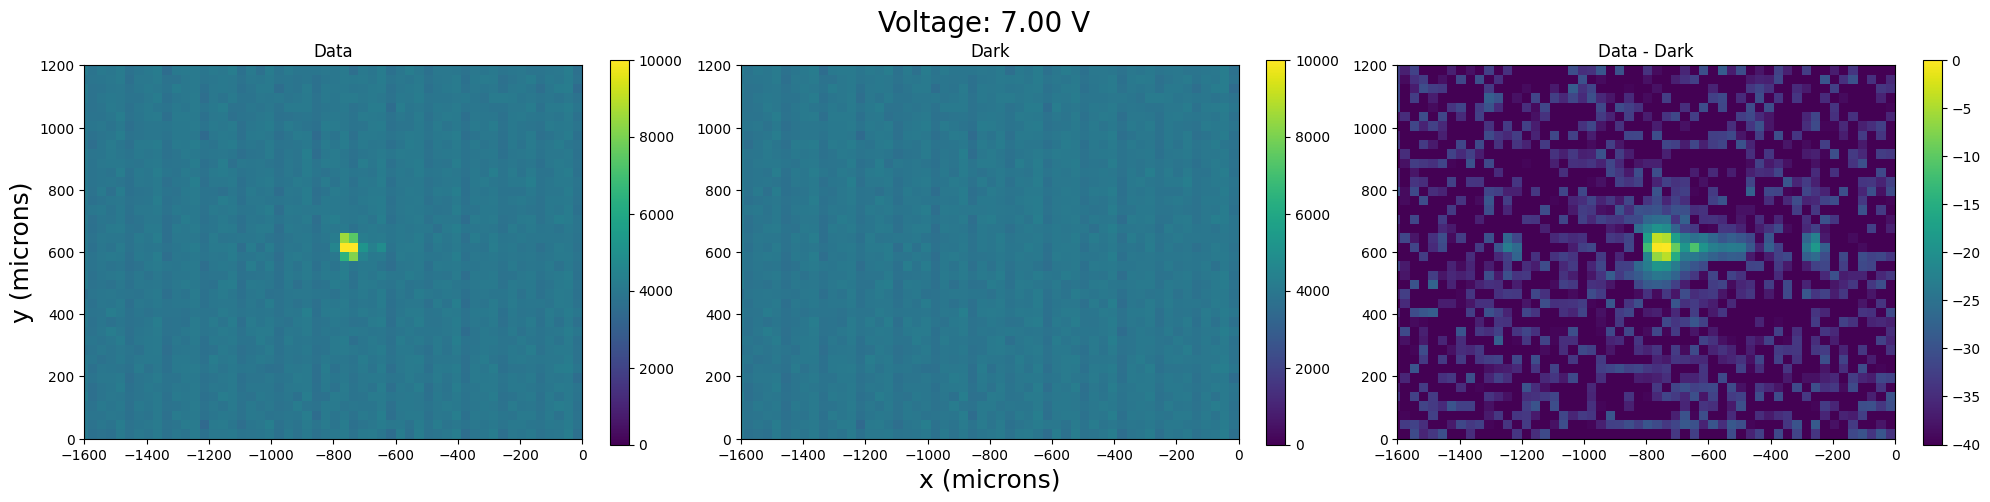

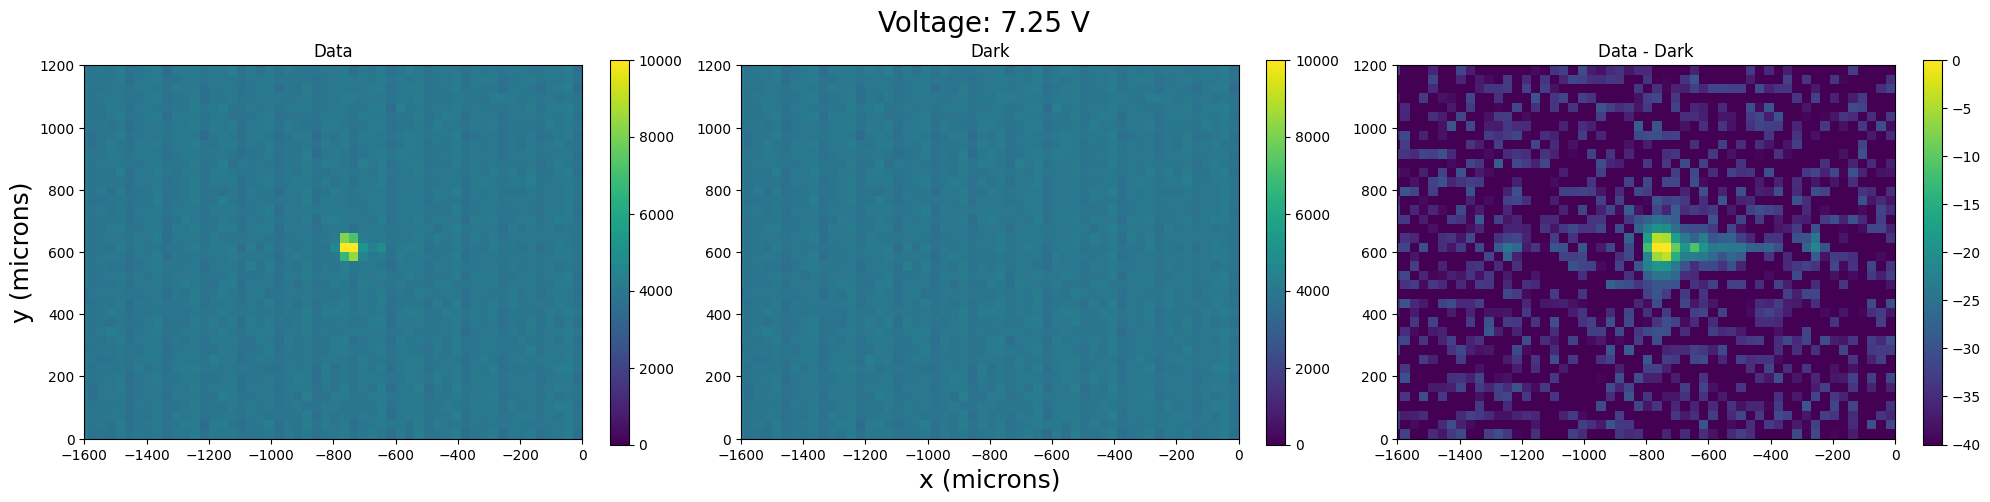

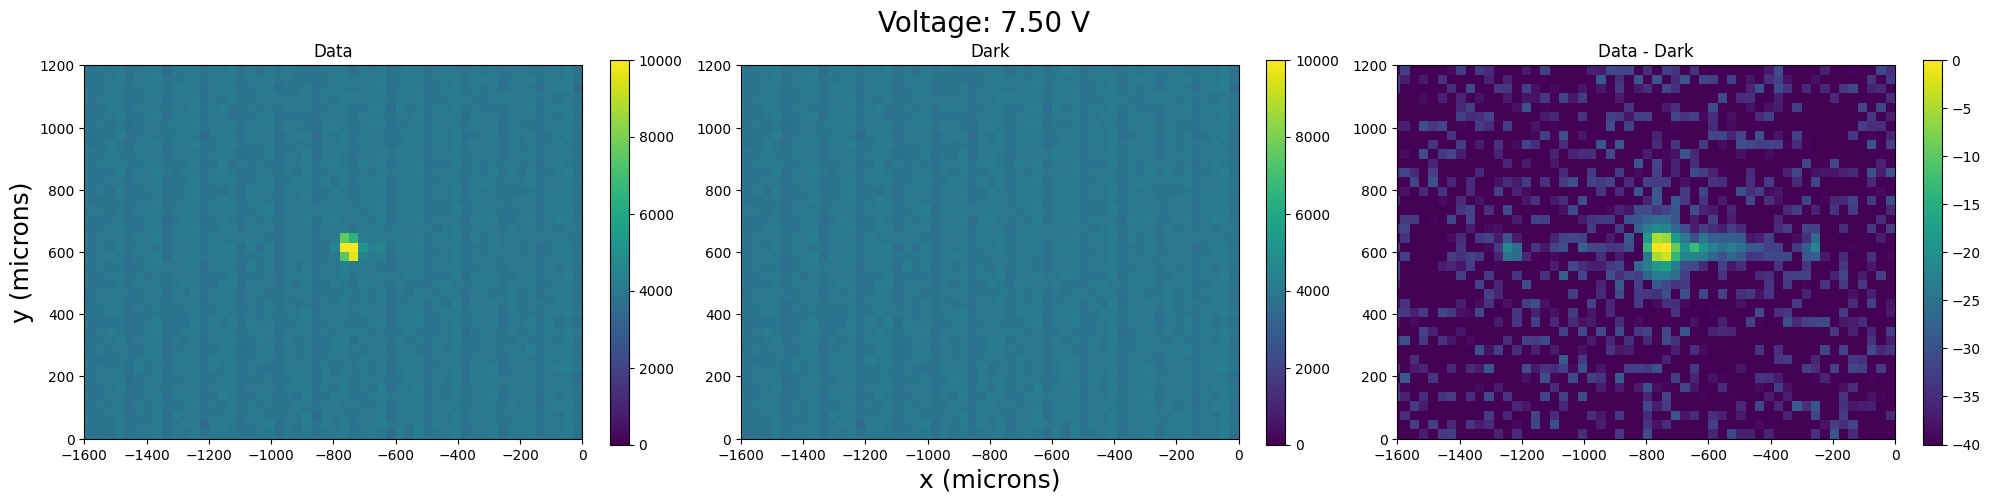

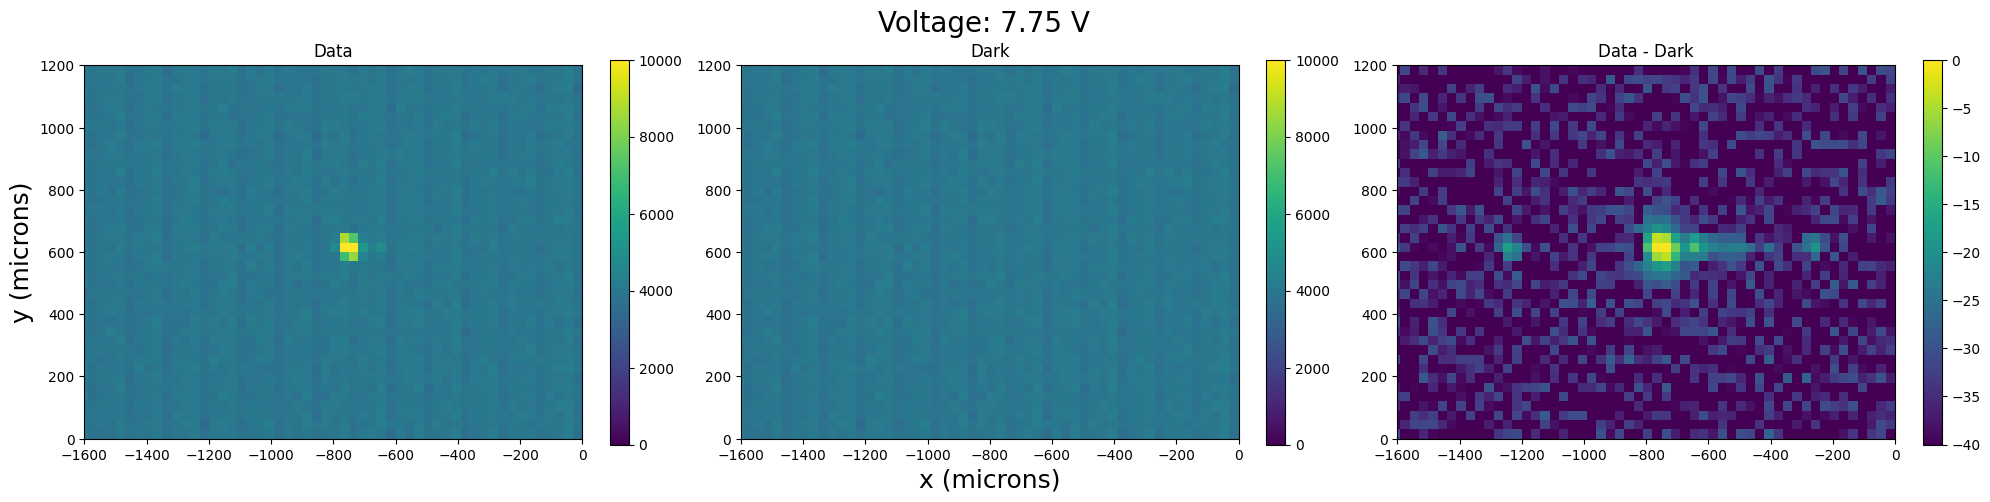

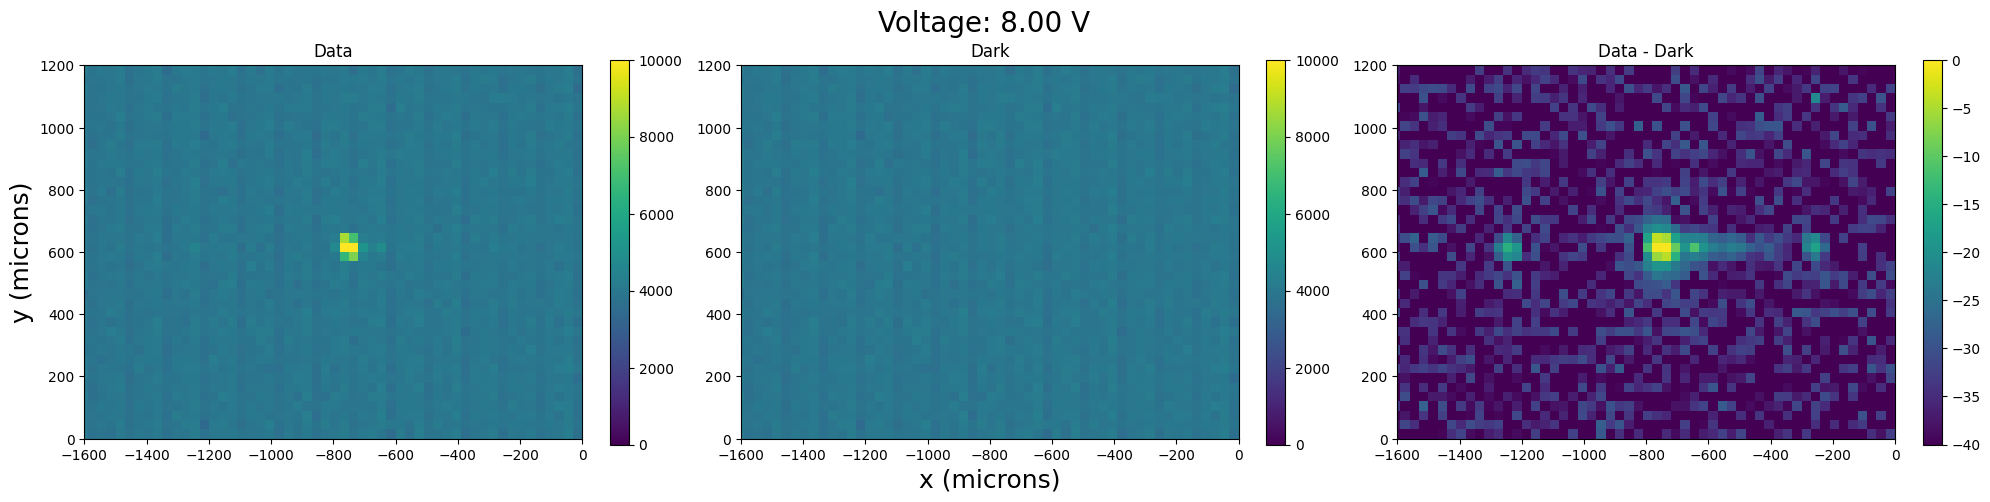

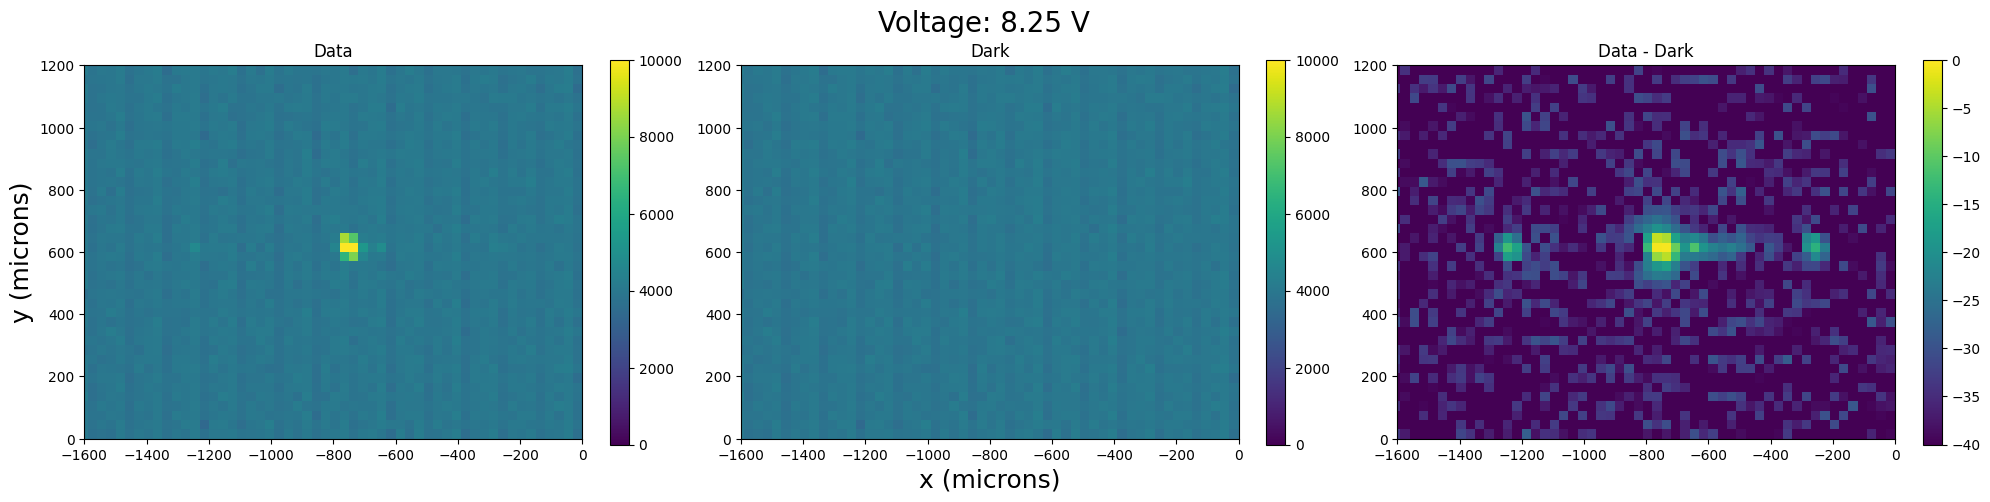

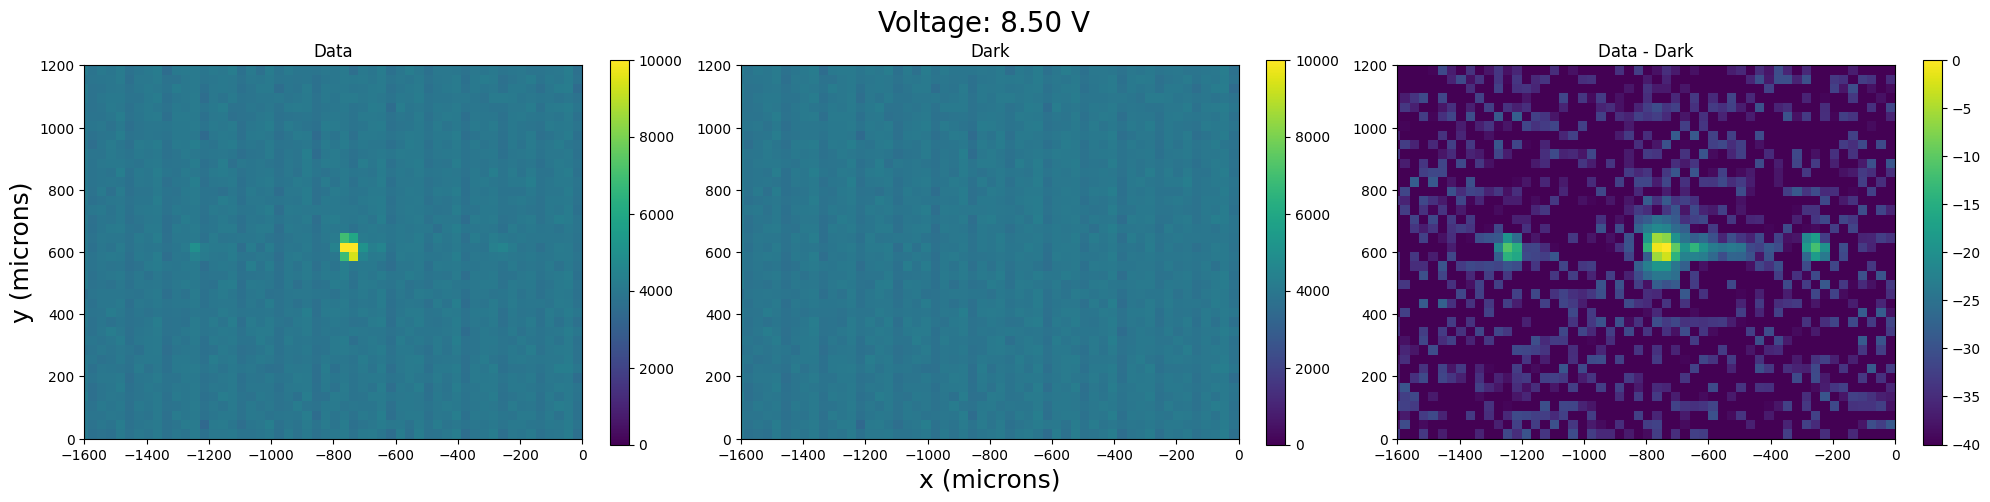

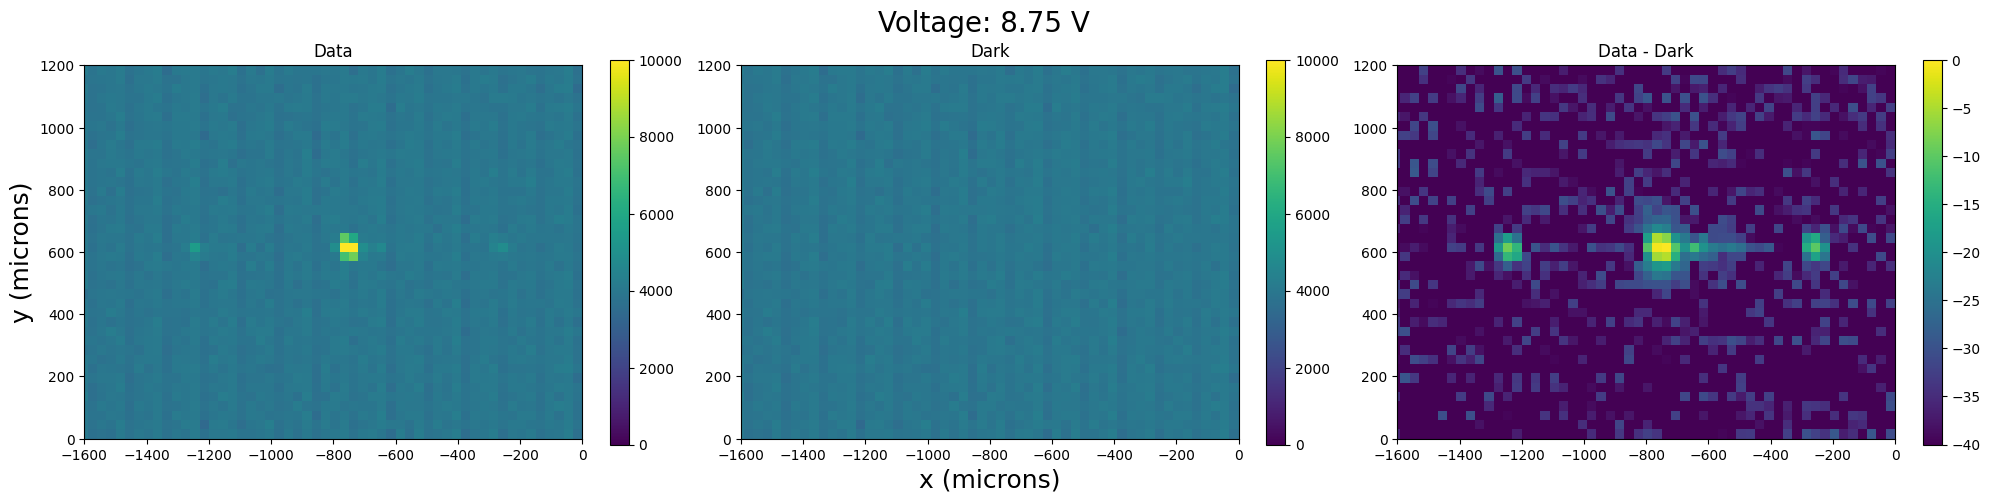

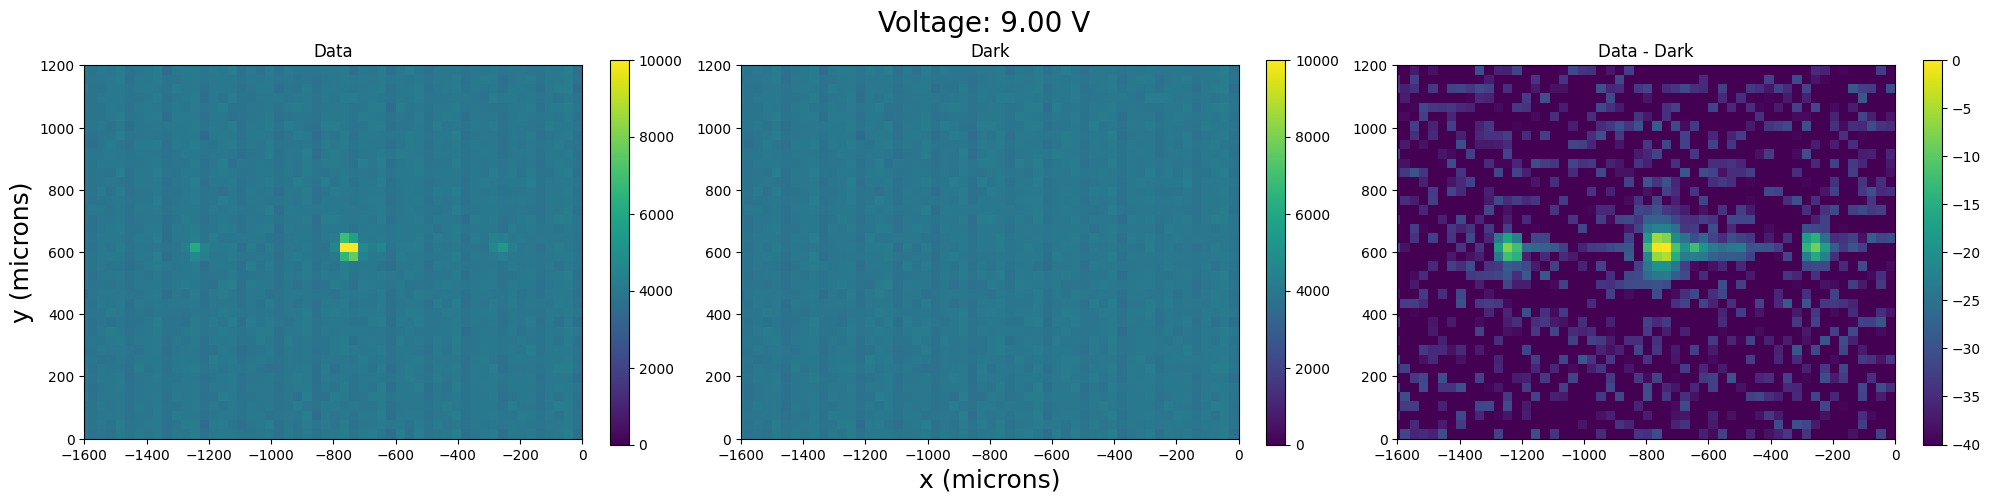

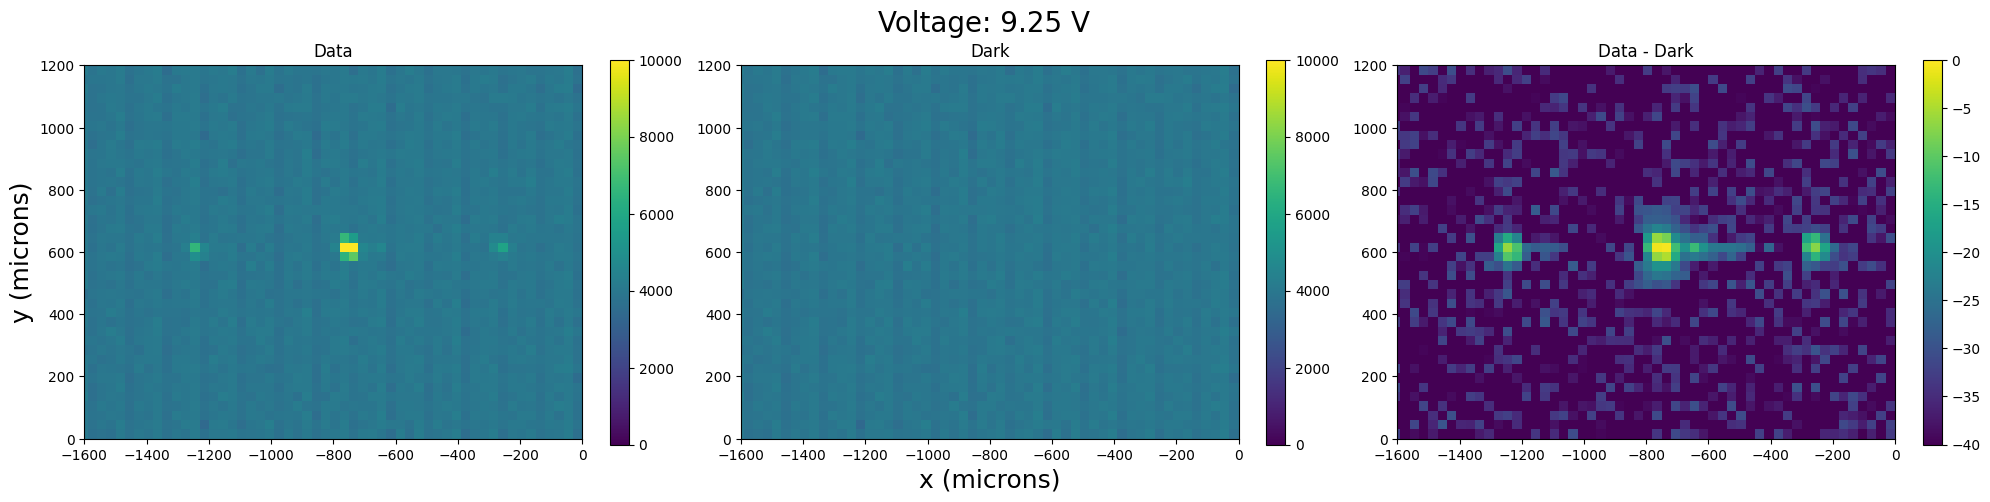

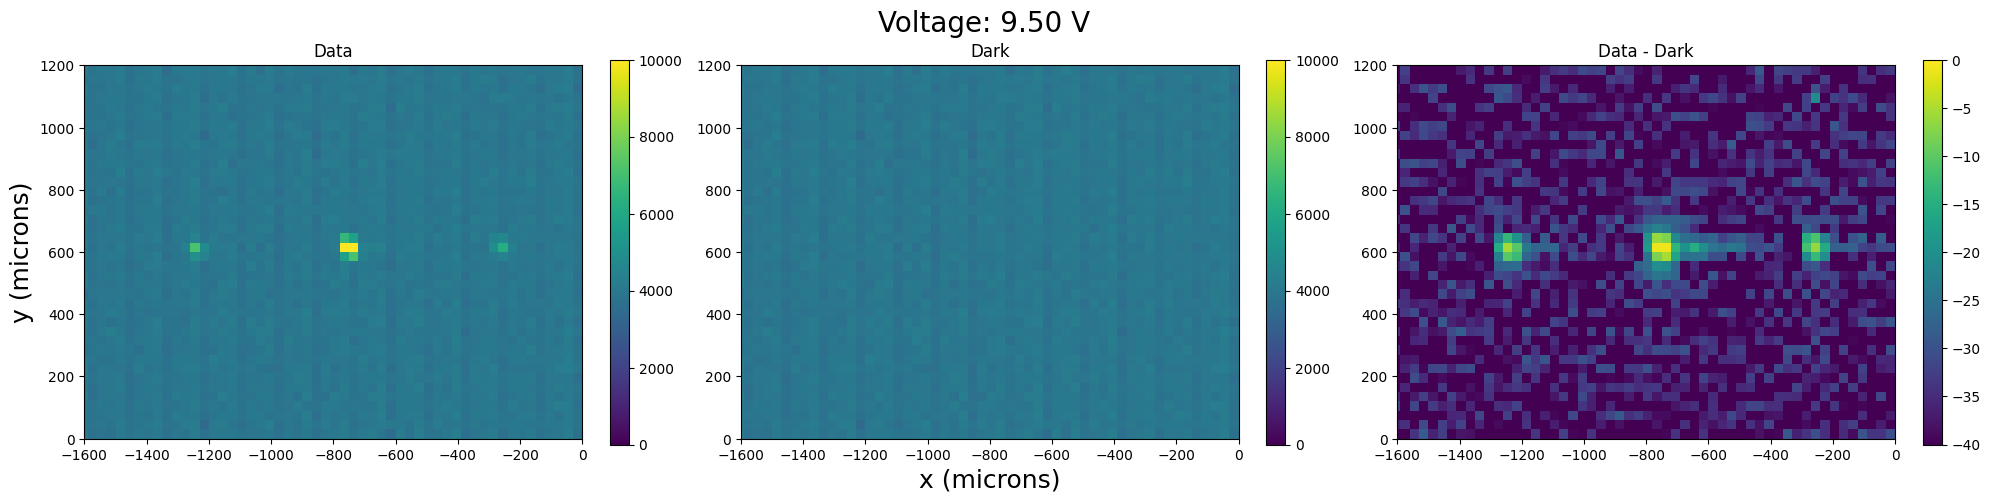

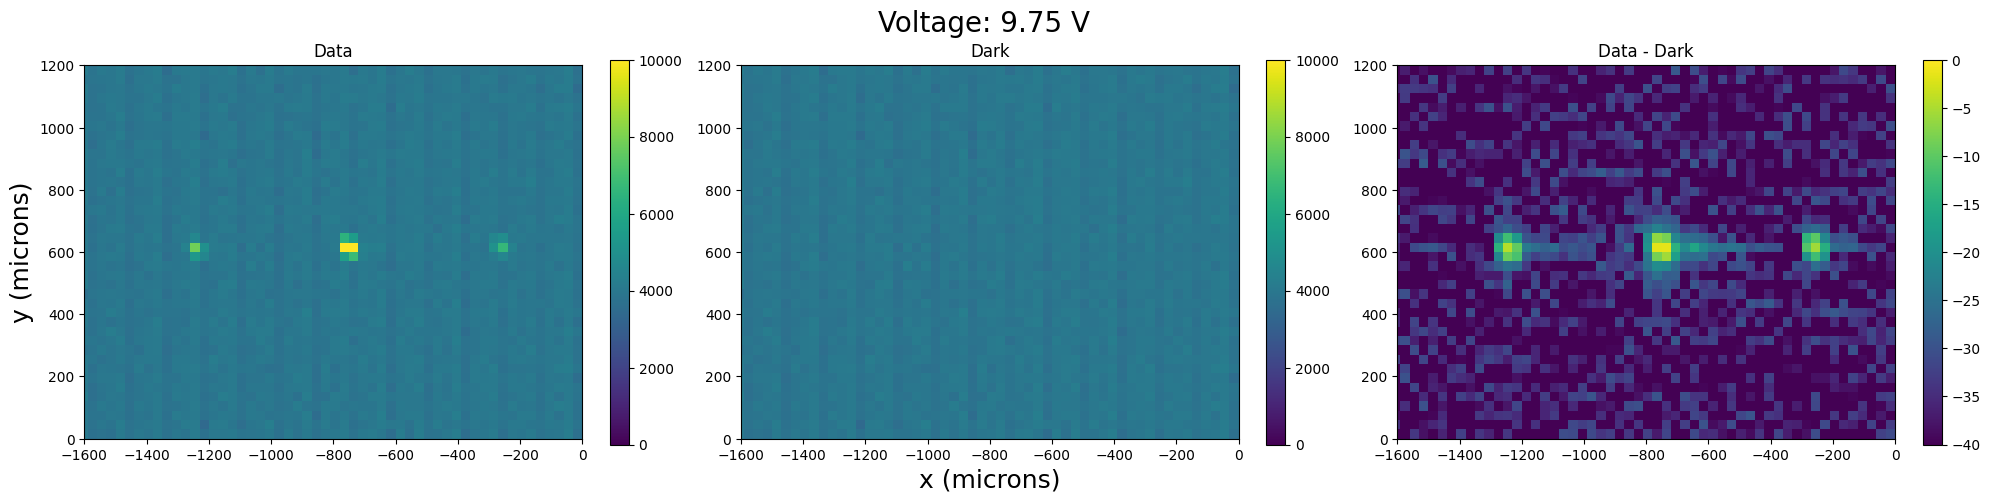

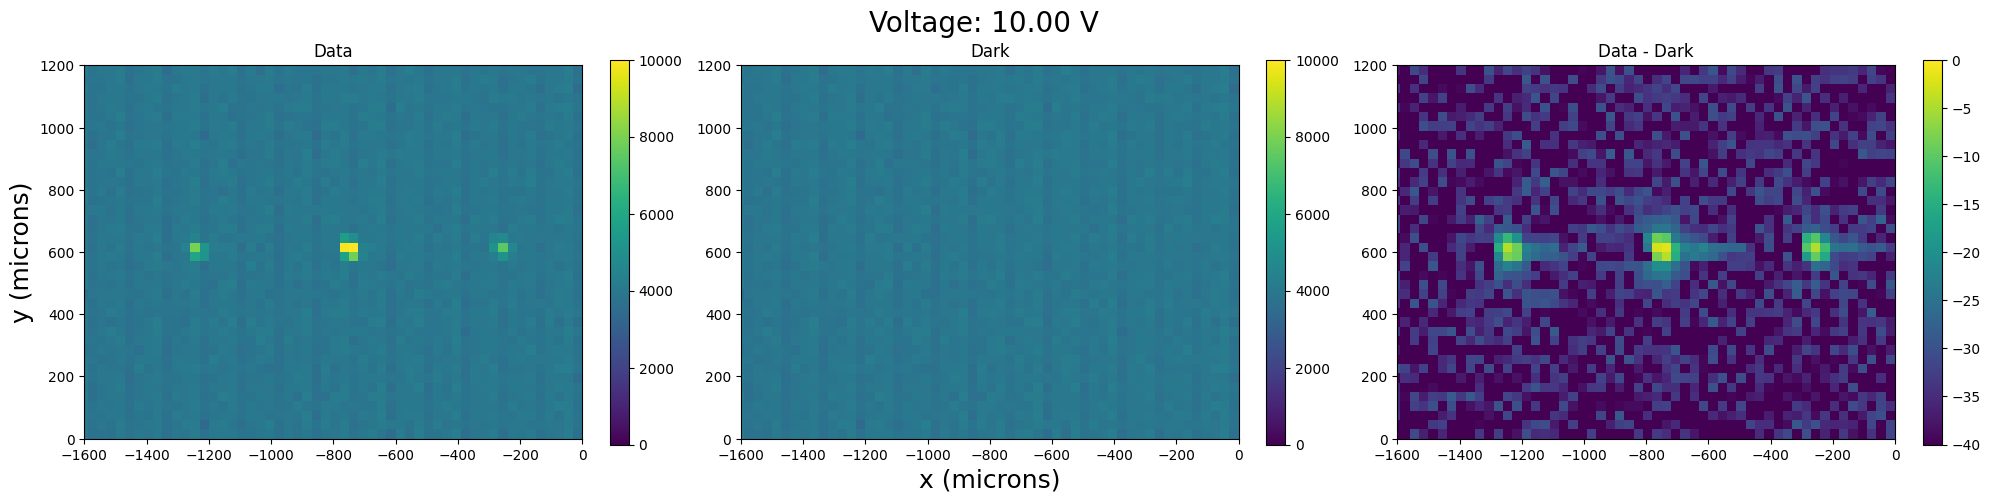

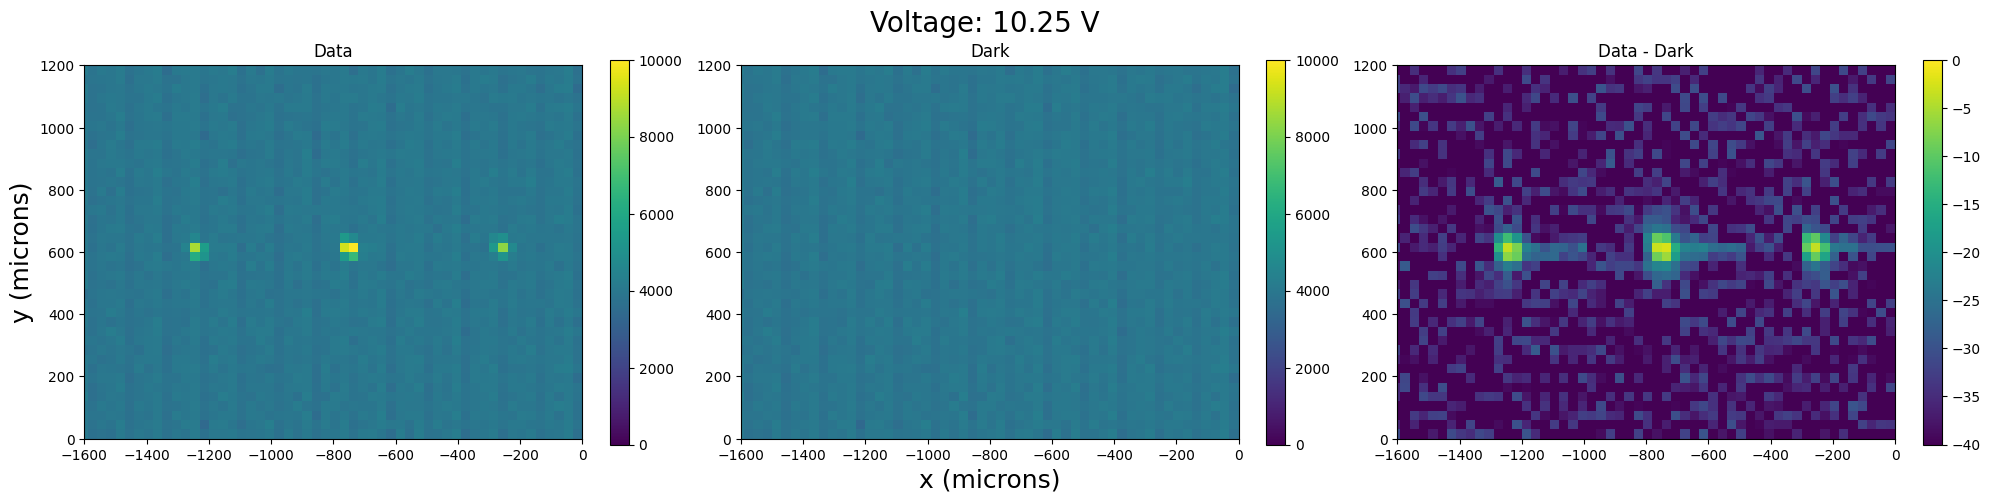

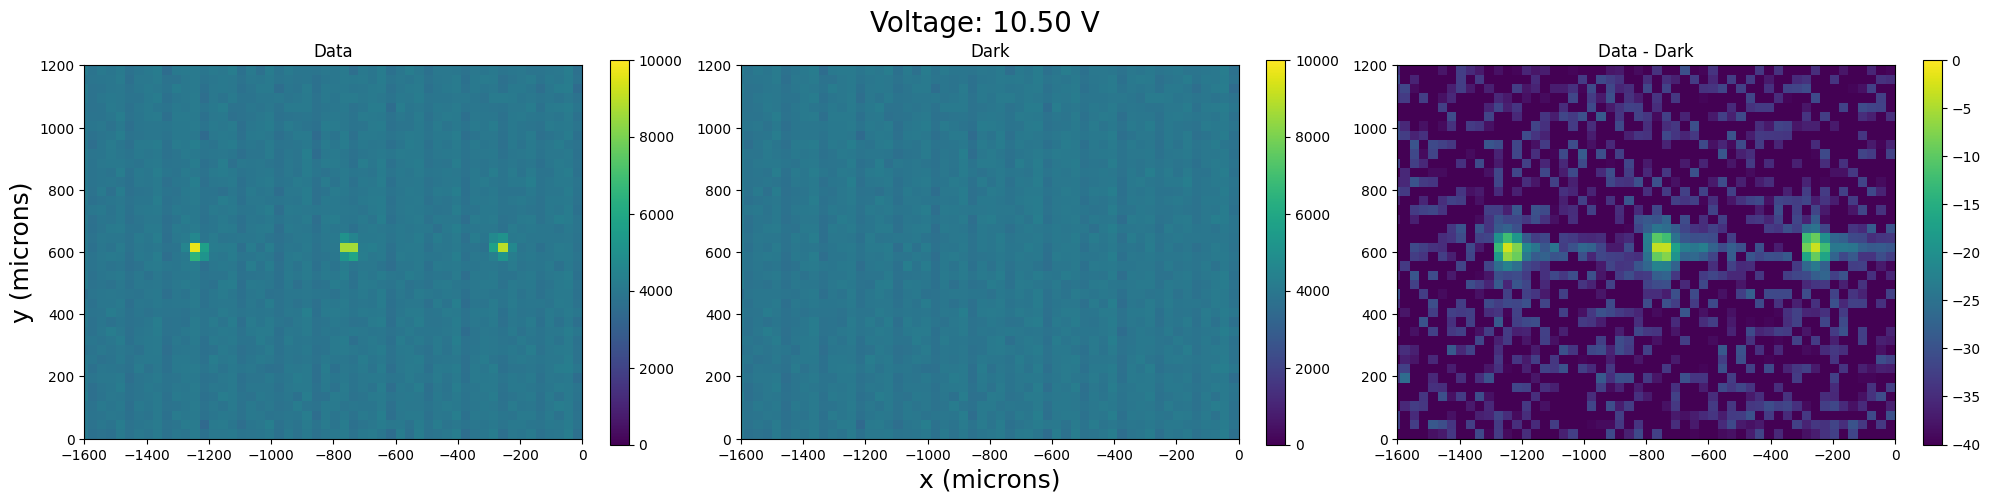

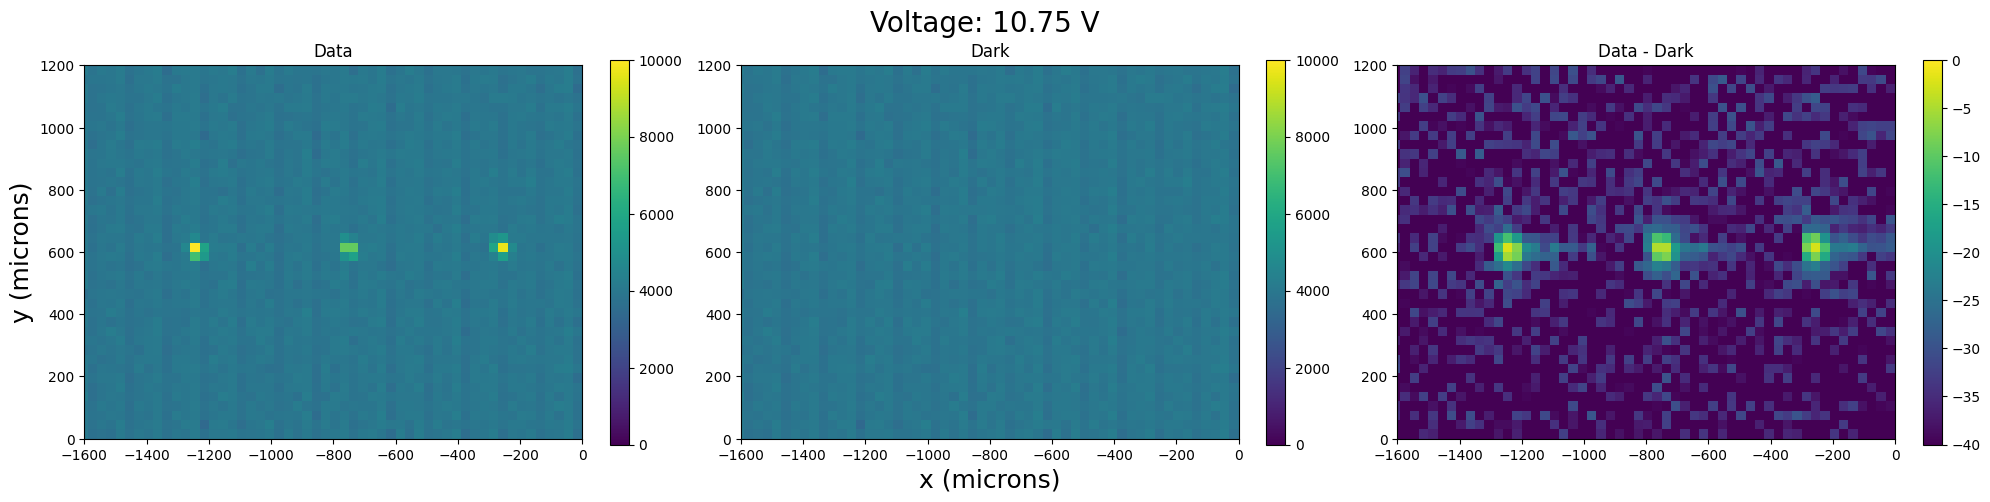

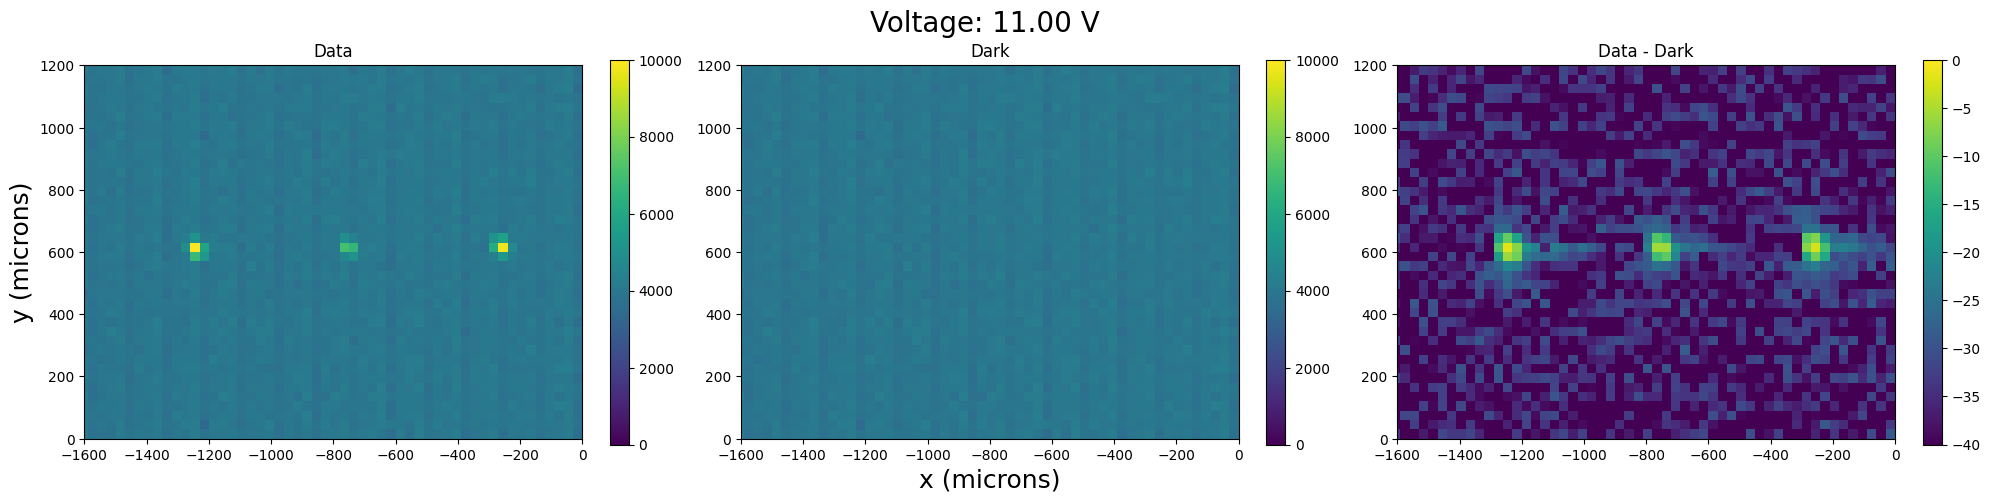

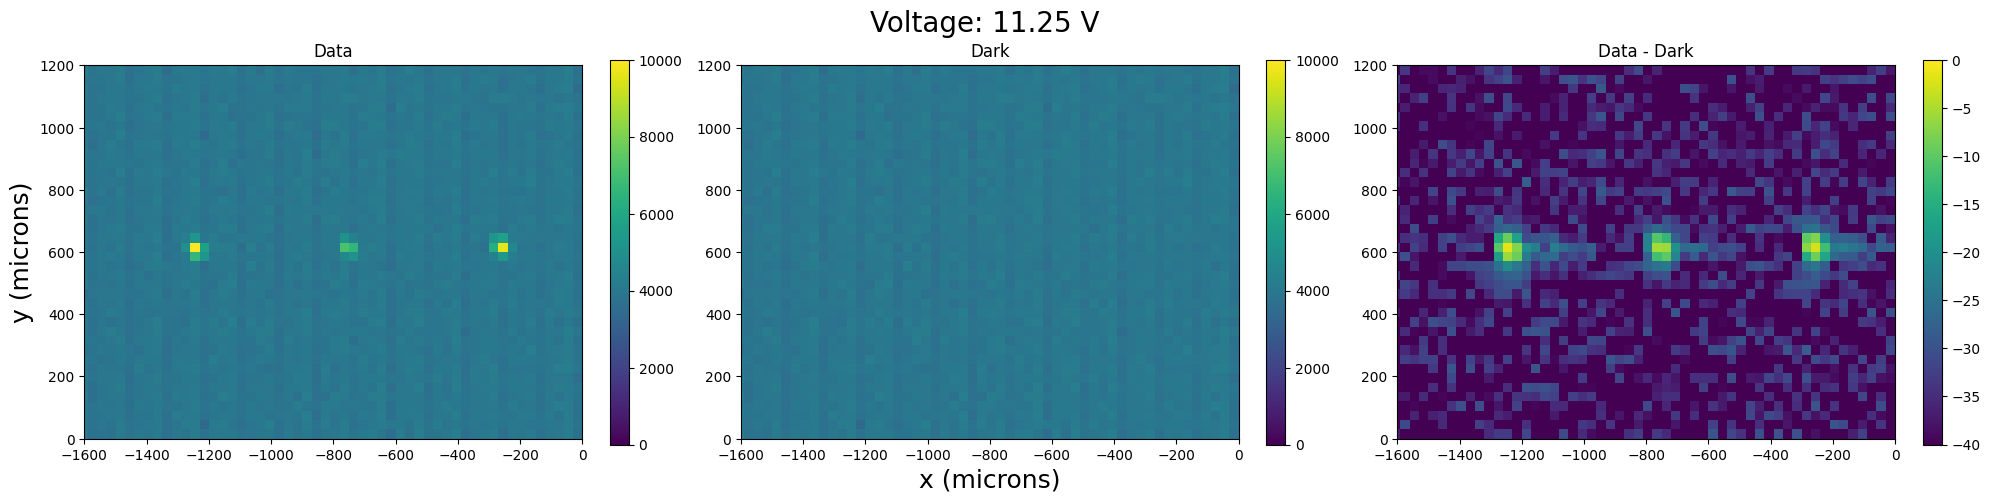

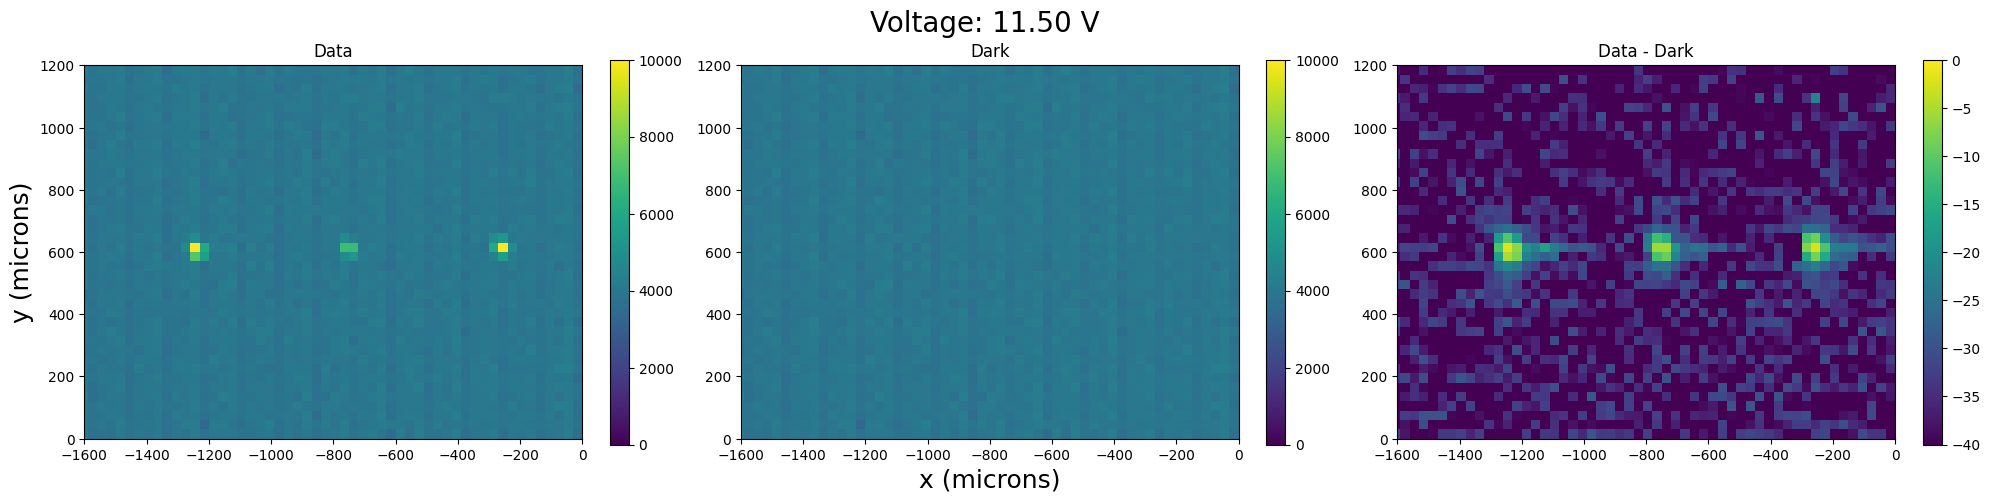

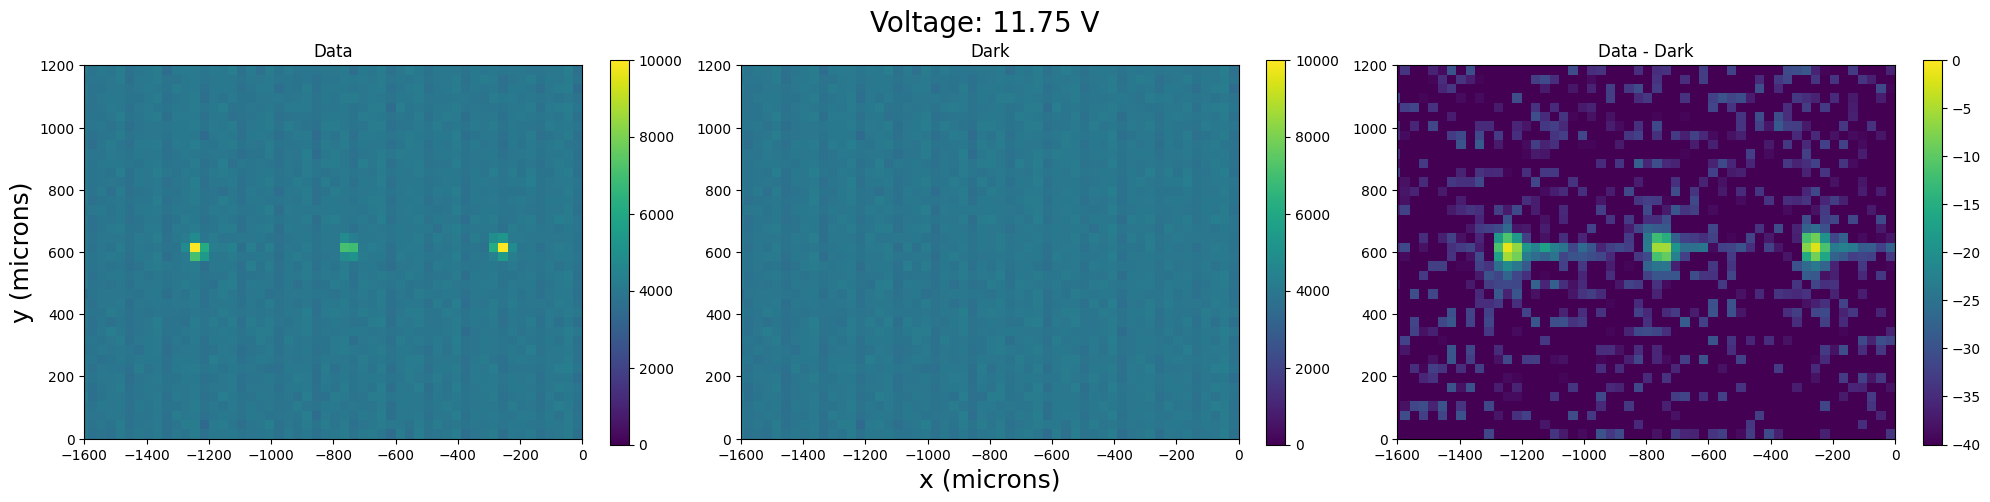

MemoryError: Unable to allocate 174. MiB for an array with shape (48, 482, 1970, 4) and data type uint8

In [208]:
data_dir = 'C:\\Users\\Pradip\\Desktop\\Sanny-PIC\\2025-11-21-Active_splitters_imaging\\Device5a_I15_1x3Tricoupler\\'
filename_root = 'Device5a_I15_1x3Tricoupler_voltageScan'

files = glob.glob(data_dir+filename_root+'*_V*[0-9].csv')
voltages = np.array([float(filename.split('_V')[-1].split('.csv')[0].replace('p','.')) for filename in files])
files = np.array(files)[np.argsort(voltages)]
voltages = voltages[np.argsort(voltages)]
frames = []

datas, darks = [], []
for filename in files:
    voltage = float(filename.split('_V')[-1].split('.csv')[0].replace('p','.'))
    filename_dark = filename.split('.csv')[0] + '_dark.csv'
    datas.append(np.loadtxt(filename, delimiter=','))
    darks.append(np.loadtxt(filename_dark, delimiter=','))

norm = np.max(np.array(datas) - np.array(darks))
for i, voltage in enumerate(voltages):
    data = datas[i]
    dark = darks[i]

    y_dim, x_dim = np.shape(data)
    x = np.linspace(-x_dim/2 * 30, (x_dim/2 - 1) * 30, x_dim)
    y = np.linspace(-y_dim/2 * 30,(y_dim/2 - 1) * 30, y_dim)

    fig, ax = plt.subplots(1, 3, figsize=(24,5))
    cbar_norm = colors.Normalize(vmin=0, vmax=10000) 
    im0 = ax[0].pcolormesh(x, y, data, norm=cbar_norm)
    im1 = ax[1].pcolormesh(x, y, dark, norm=cbar_norm)    
    
    data_reduce = data - dark
    cbar_norm = colors.Normalize(vmin=0, vmax=10000)

    data_reduce[data_reduce <= 0] = np.min(data_reduce[data_reduce > 0])
    data_reduce = 10*np.log10(data_reduce/norm)
    cbar_norm = colors.Normalize(vmin=-40, vmax=0)
    
    im2 = ax[2].pcolormesh(x, y, data_reduce, norm=cbar_norm)
    fig.colorbar(im0, ax=ax[0], fraction=0.05*y_dim/x_dim)
    fig.colorbar(im1, ax=ax[1], fraction=0.05*y_dim/x_dim)
    fig.colorbar(im2, ax=ax[2], fraction=0.05*y_dim/x_dim)
    ax[1].set_xlabel('x (microns)', fontsize=18)
    ax[0].set_ylabel('y (microns)', fontsize=18)
    ax[0].set_title('Data')
    ax[1].set_title('Dark')
    ax[2].set_title('Data - Dark')
    for i in range(3):
        ax[i].set_xlim(-1600, 0)
        ax[i].set_ylim(0, 1200)
        ax[i].set_aspect('equal')
    fig.suptitle(f"Voltage: {voltage:0.2f} V", fontsize=20)

    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close(fig)
    buf.seek(0)
    
    frames.append(imageio.imread(buf))

imageio.mimsave(data_dir+filename_root+"_dB.gif", frames, fps=5, loop=0)

datas_raw = np.copy(datas)
darks_raw = np.copy(darks)

Reduce raw images

In [4]:
import numpy as np

voltagecombos = [[1, 2], [3, 4, 5, 6], [7, 8, 9], [10, 11, 12]]
voltagecombos = np.meshgrid(*voltagecombos)
voltagecombos = np.stack(voltagecombos, axis=-1).reshape(-1, len(voltagecombos))
voltagecombos

array([[ 1,  3,  7, 10],
       [ 1,  3,  7, 11],
       [ 1,  3,  7, 12],
       [ 1,  3,  8, 10],
       [ 1,  3,  8, 11],
       [ 1,  3,  8, 12],
       [ 1,  3,  9, 10],
       [ 1,  3,  9, 11],
       [ 1,  3,  9, 12],
       [ 2,  3,  7, 10],
       [ 2,  3,  7, 11],
       [ 2,  3,  7, 12],
       [ 2,  3,  8, 10],
       [ 2,  3,  8, 11],
       [ 2,  3,  8, 12],
       [ 2,  3,  9, 10],
       [ 2,  3,  9, 11],
       [ 2,  3,  9, 12],
       [ 1,  4,  7, 10],
       [ 1,  4,  7, 11],
       [ 1,  4,  7, 12],
       [ 1,  4,  8, 10],
       [ 1,  4,  8, 11],
       [ 1,  4,  8, 12],
       [ 1,  4,  9, 10],
       [ 1,  4,  9, 11],
       [ 1,  4,  9, 12],
       [ 2,  4,  7, 10],
       [ 2,  4,  7, 11],
       [ 2,  4,  7, 12],
       [ 2,  4,  8, 10],
       [ 2,  4,  8, 11],
       [ 2,  4,  8, 12],
       [ 2,  4,  9, 10],
       [ 2,  4,  9, 11],
       [ 2,  4,  9, 12],
       [ 1,  5,  7, 10],
       [ 1,  5,  7, 11],
       [ 1,  5,  7, 12],
       [ 1,  5,  8, 10],


C:\Users\Pradip\AppData\Local\Temp\ipykernel_3312\2628862709.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(x, y, data_reduce, norm=cbar_norm, zorder=0)
C:\Users\Pradip\AppData\Local\Temp\ipykernel_3312\2628862709.py:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(x, y, masked_overlay, cmap=yellow_cmap, alpha=0.2, zorder=1)


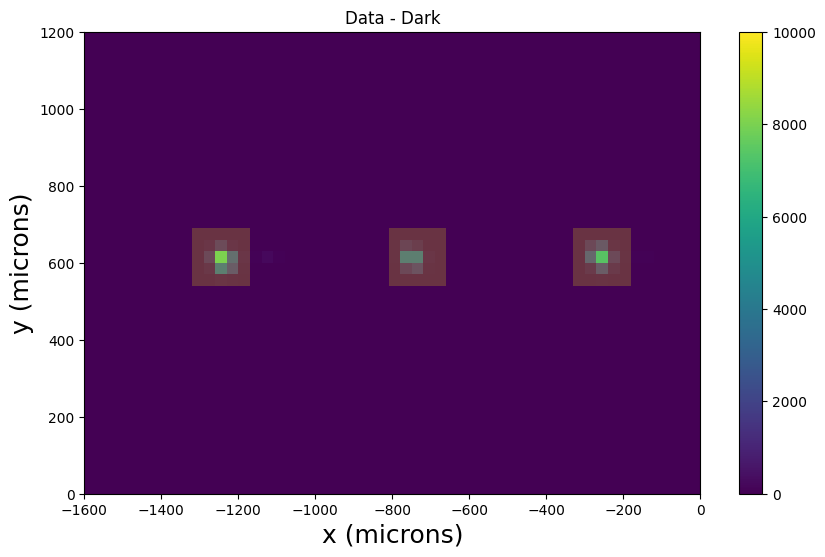

C:\Users\Pradip\AppData\Local\Temp\ipykernel_3312\2628862709.py:99: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im2 = ax.pcolormesh(x, y, data_reduce, norm=cbar_norm)


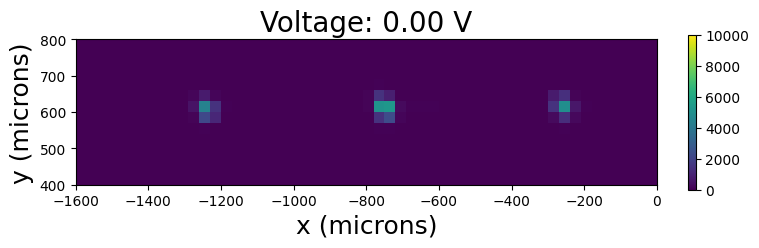

C:\Users\Pradip\AppData\Local\Temp\ipykernel_3312\2628862709.py:114: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(buf))


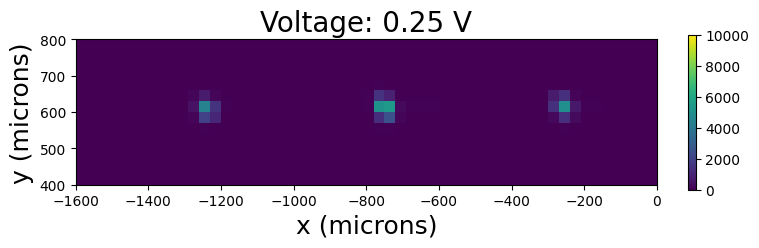

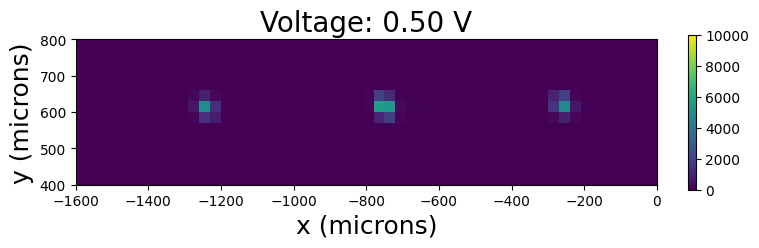

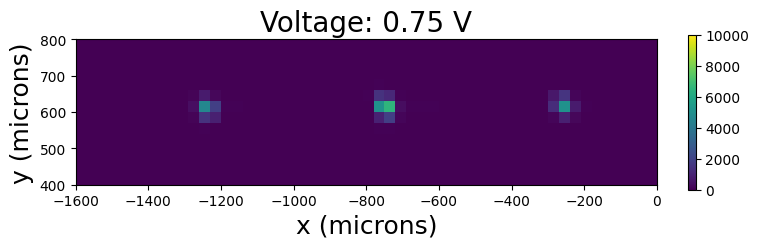

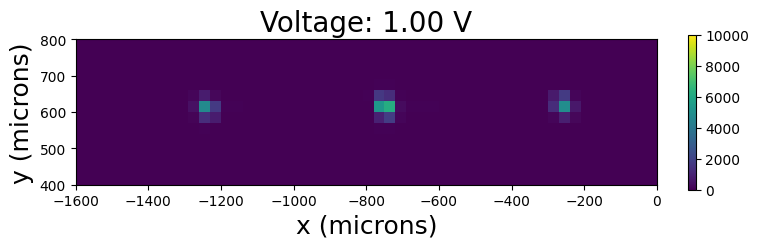

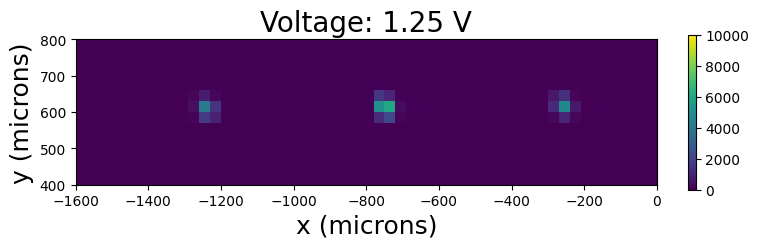

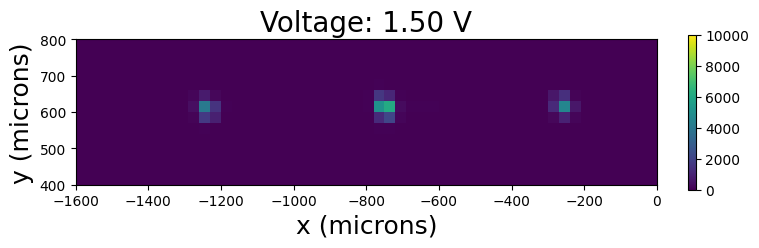

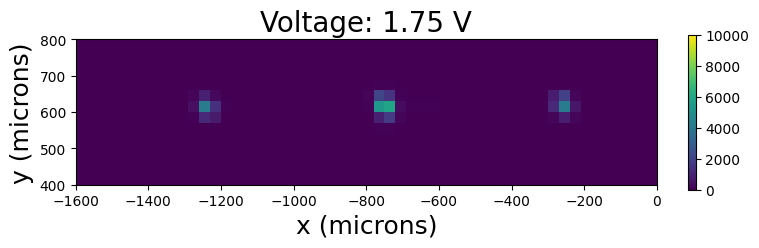

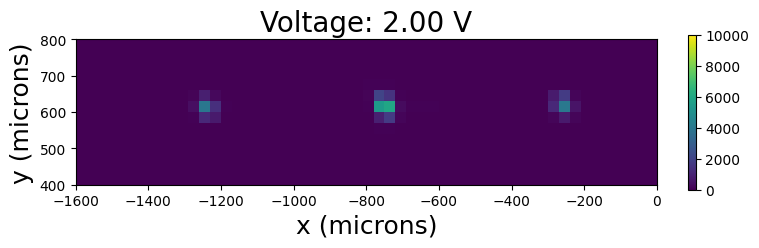

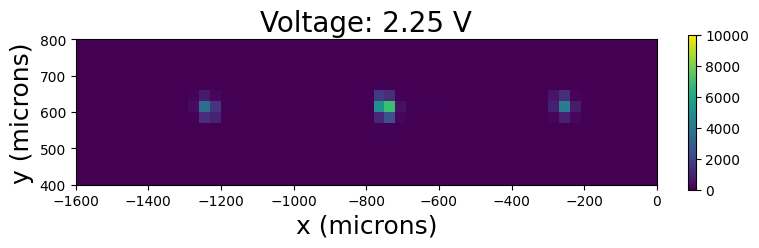

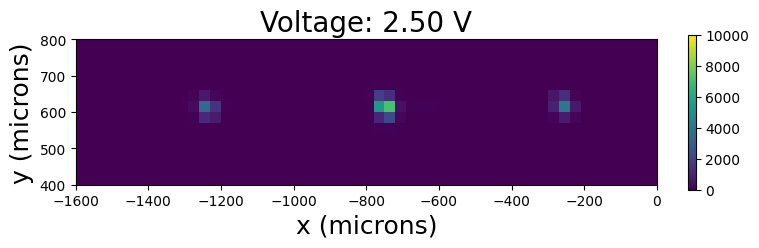

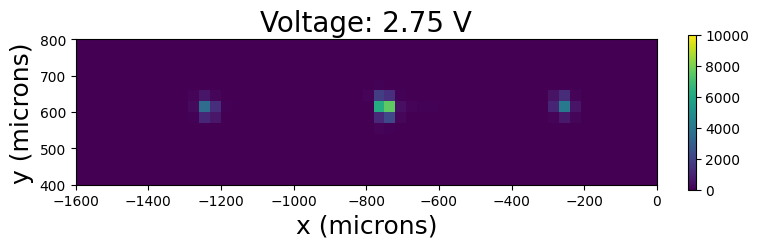

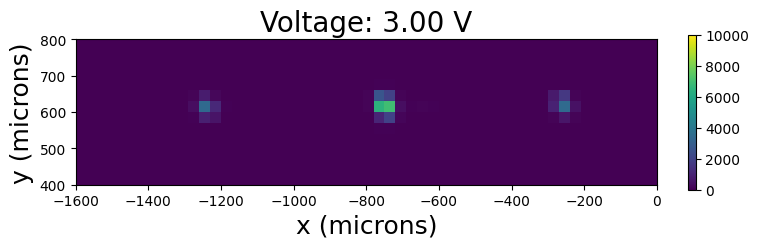

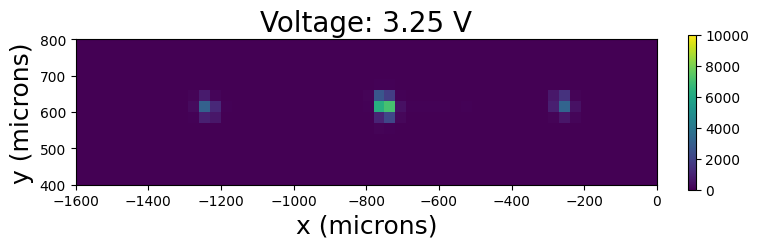

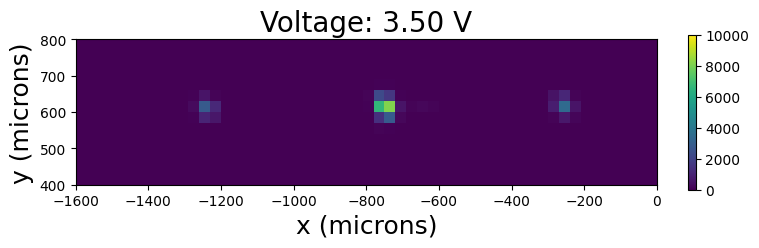

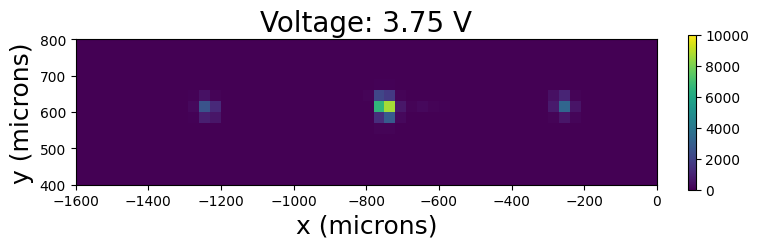

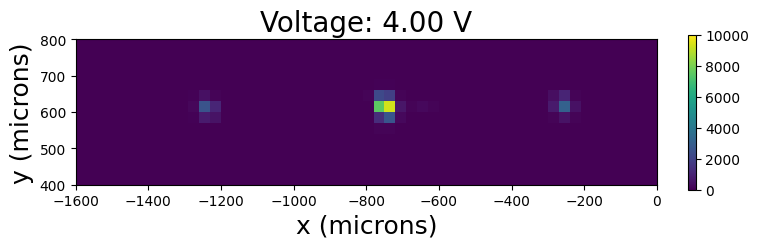

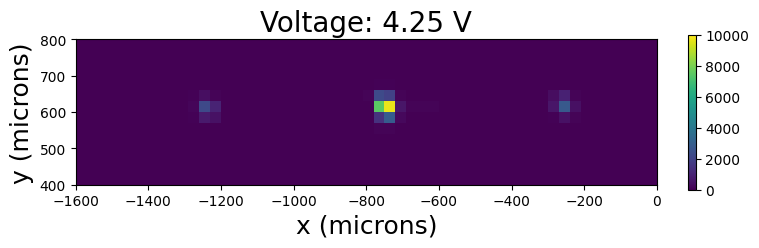

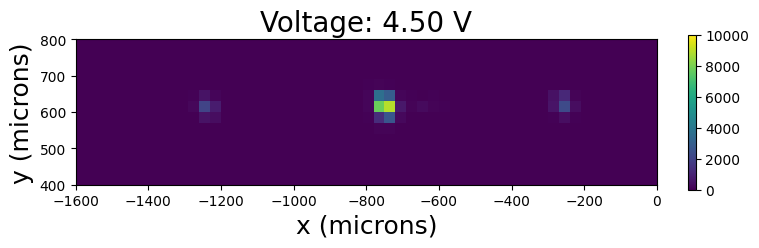

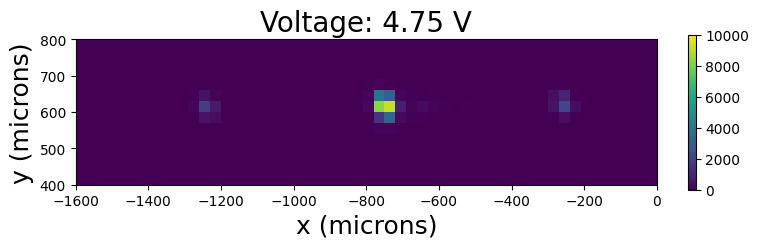

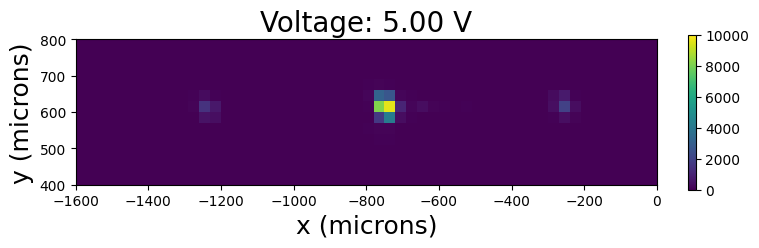

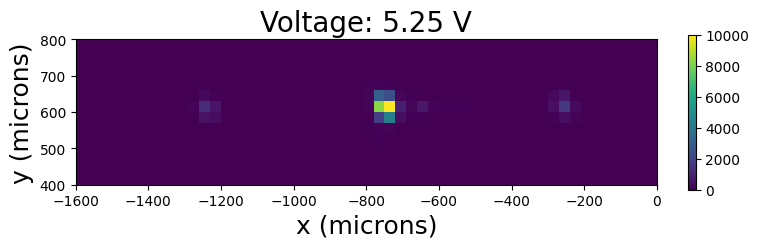

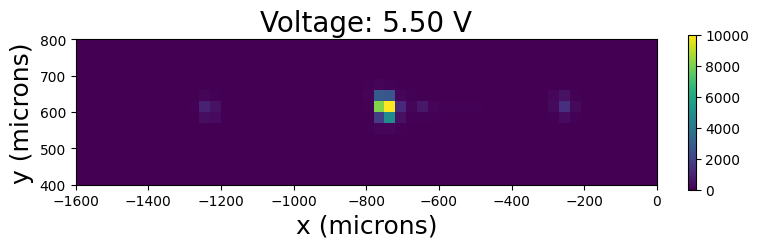

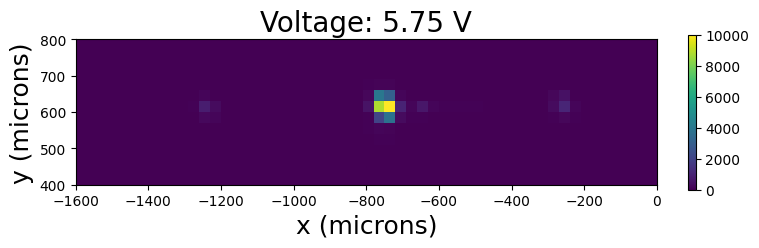

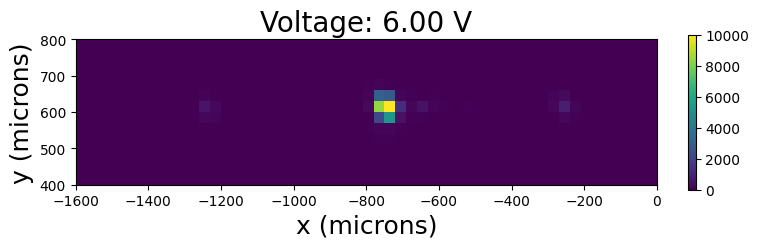

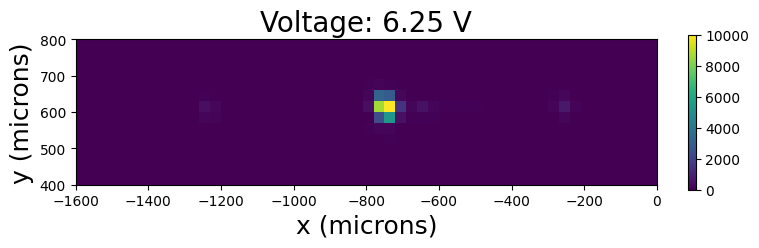

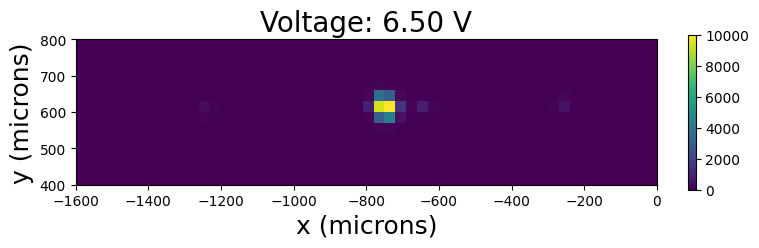

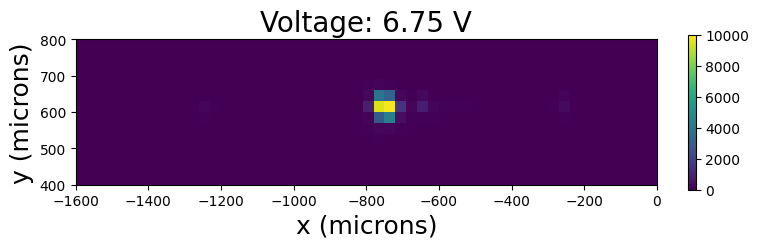

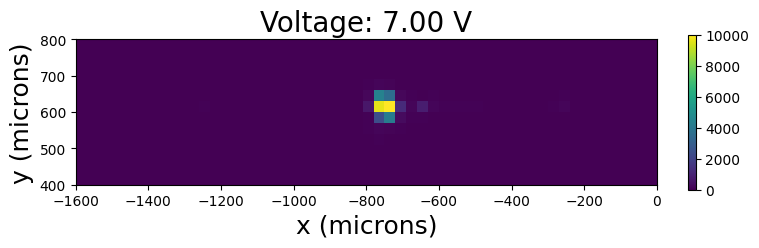

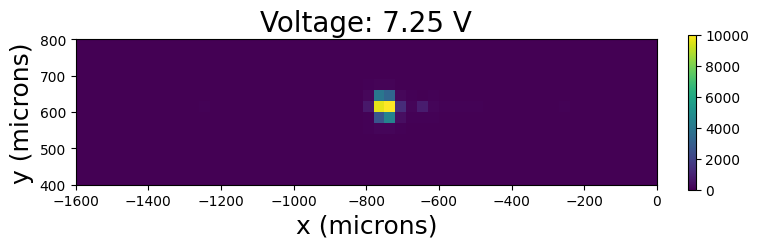

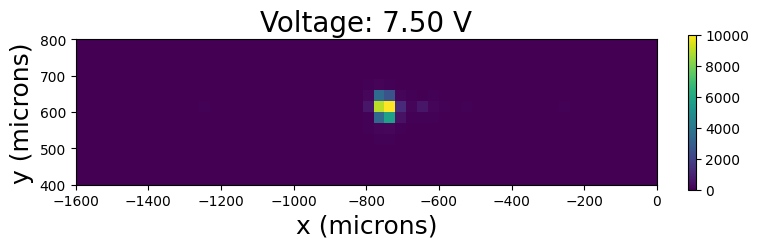

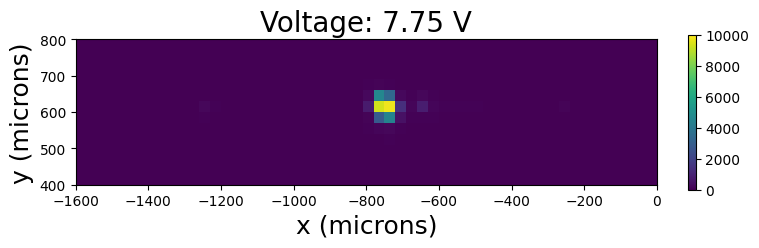

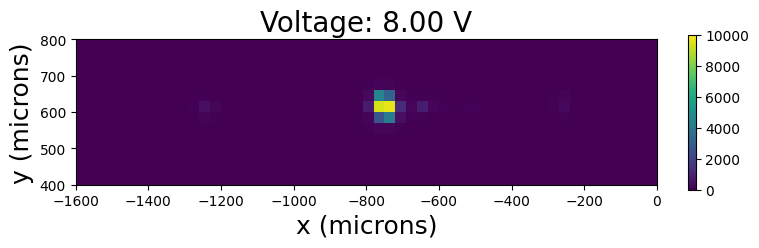

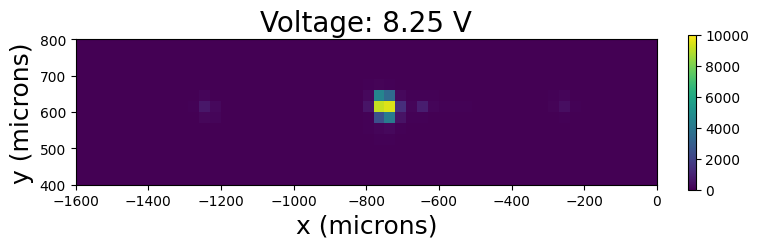

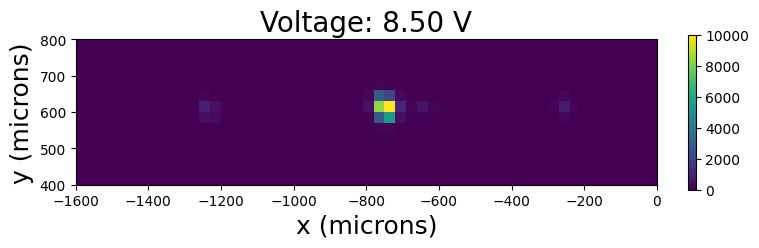

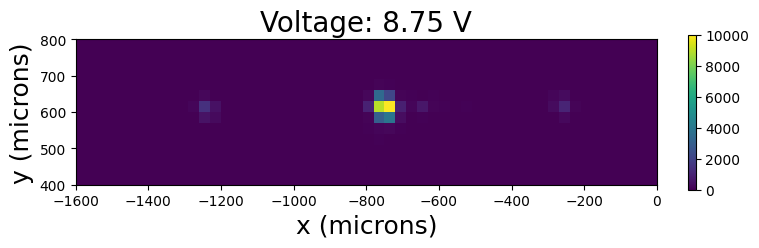

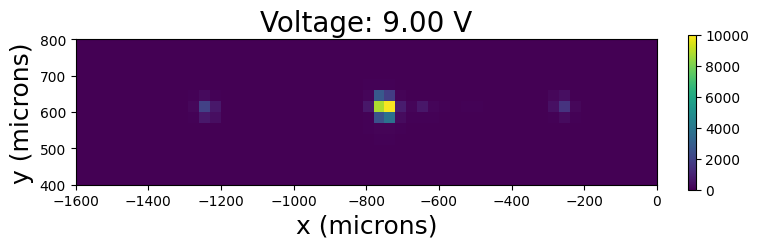

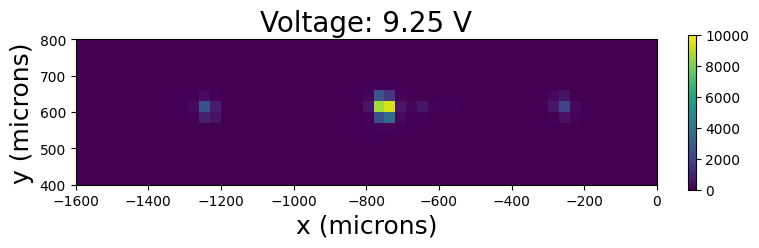

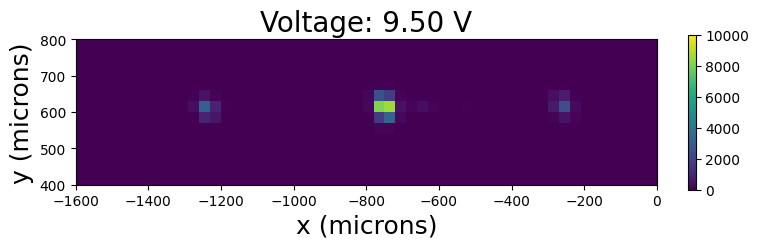

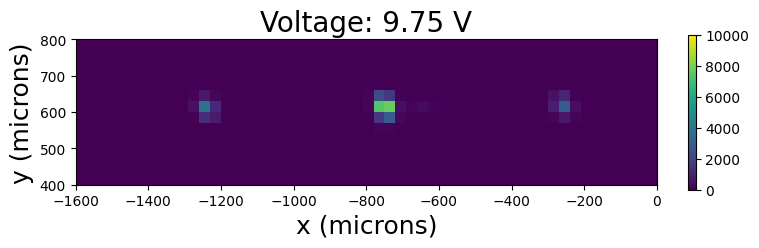

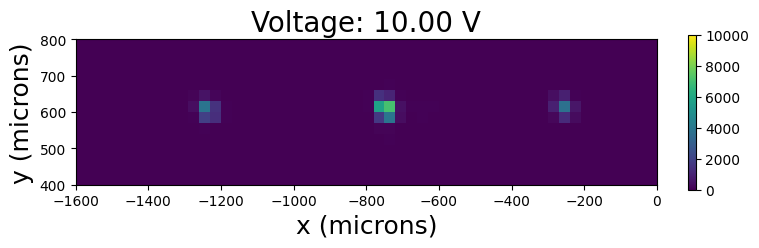

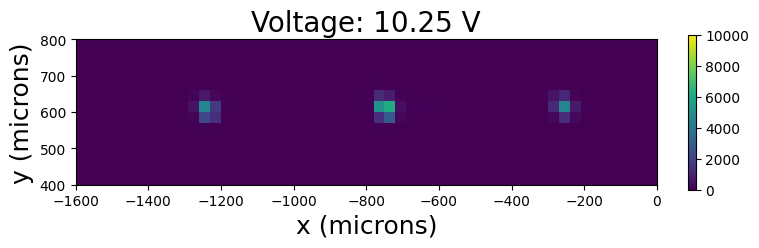

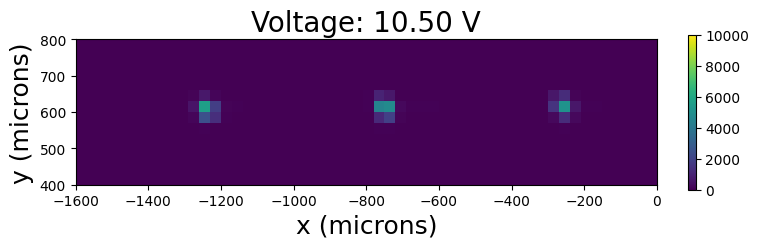

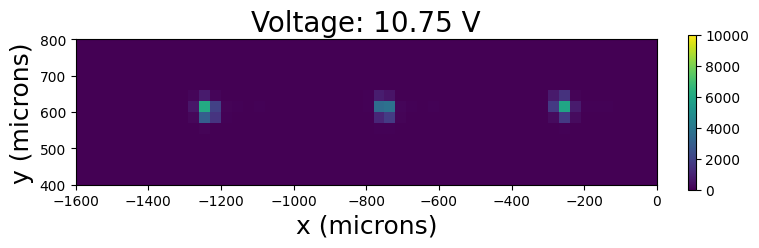

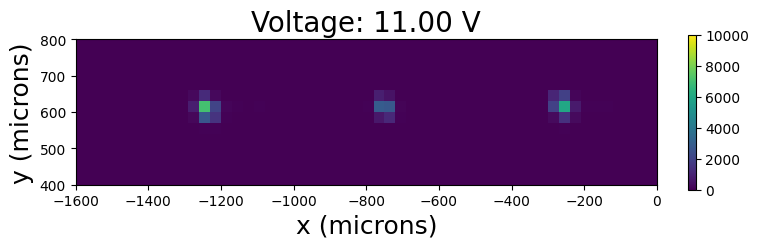

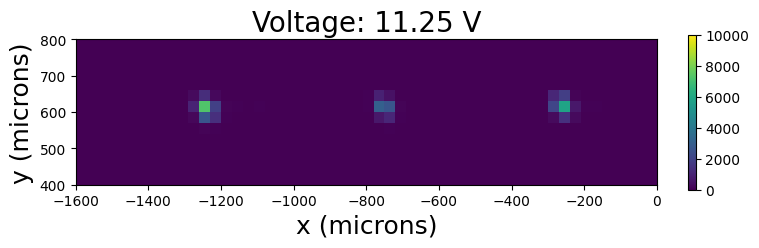

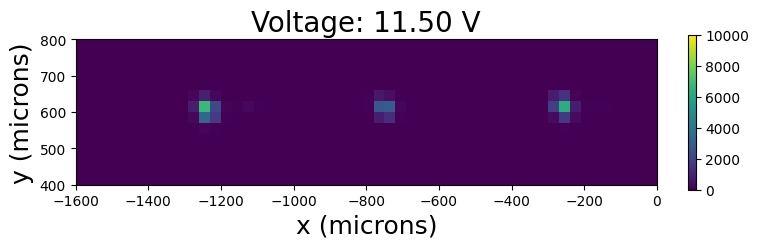

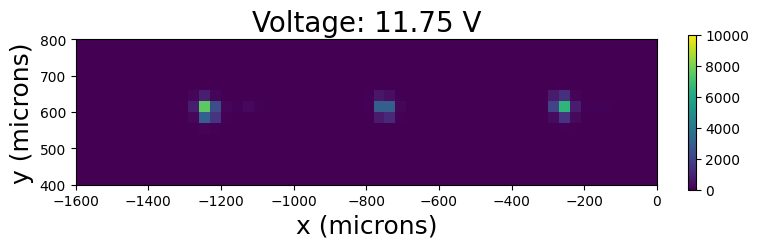

In [210]:
# Set up reference image for identifying locations of outputs
voltage_ref = 0
v_str = f"{voltage_ref:.2f}".replace('.', 'p')
filename_ref = glob.glob(data_dir+filename_root+f"*_V{v_str}.csv")[0]
filename_ref_dark = filename.split('.csv')[0] + '_dark.csv'
data = np.loadtxt(filename, delimiter=',')
dark = np.loadtxt(filename_dark, delimiter=',')
data_reduce = data - dark

# Build mask for each output
num_outputs = 3
filtered = scipy.ndimage.maximum_filter(data_reduce, size=5)
mask = (data_reduce == filtered)
coords = np.column_stack(np.nonzero(mask))
coords = coords[np.argsort(data_reduce[coords[:,0], coords[:,1]])][-num_outputs:]
coords = coords[np.argsort(coords[:, 1])]

masks = []
select = 2 # how wide to make mask
for coord in coords:
    mask = np.zeros_like(data, dtype=bool)
    mask[coord[0]-select:coord[0]+select+1, coord[1]-select:coord[1]+select+1] = True 
    masks.append(mask)

yellow_cmap = ListedColormap(['yellow'])

fig, ax = plt.subplots(1, 1, figsize=(10,6))
cbar_norm = colors.Normalize(vmin=0, vmax=10000)  

data_reduce = data - dark
cbar_norm = colors.Normalize(vmin=0, vmax=10000)
ax.pcolormesh(x, y, data_reduce, norm=cbar_norm, zorder=0)
for mask in masks:
    masked_overlay = np.ma.masked_where(~mask, np.ones_like(mask))
    ax.pcolormesh(x, y, masked_overlay, cmap=yellow_cmap, alpha=0.2, zorder=1)
# ax.plot(x[coords[:, 1]], y[coords[:, 0]], 'r+')
fig.colorbar(im0, ax=ax, fraction=0.05*y_dim/x_dim)
ax.set_xlabel('x (microns)', fontsize=18)
ax.set_ylabel('y (microns)', fontsize=18)
ax.set_title('Data - Dark')
ax.set_xlim(-1600, 0)
ax.set_ylim(0, 1200)
ax.set_aspect('equal')
plt.show()

# Extract and plot intensities from each output in each frame
outputs = []
frames = []
biases = []
for i, voltage in enumerate(voltages):
    # Read in frame
    output = []
    data = datas[i]
    dark = darks[i]
 
    # Subtract stripes
    mask_stripes = np.copy(mask)
    inds = np.argwhere(mask_stripes==True)
    inds_rows = list(set(inds[:,0]))
    ind_min, ind_max = np.min(inds_rows), np.max(inds_rows)
    inds_rows = np.arange(ind_min - 2*(ind_max-ind_min), ind_max + 2*(ind_max-ind_min))
    for ind in inds_rows:
        mask_stripes[ind,:] = True

    data_stripes = np.copy(data)
    data_stripes[mask_stripes] = np.nan

    # datas[i] = data - np.nanmedian(data_stripes, axis=0)
    # darks[i] = dark - np.nanmedian(dark, axis=0)
    
    # Subtract darks from data
    data_reduce = data - dark

    biases.append([np.mean(data[~mask_stripes]), np.mean(data_reduce[~mask_stripes])])

    # Extract output intensities
    for mask in masks:
        output.append(np.sum(data_reduce[mask]))
    outputs.append(output)

norm = np.max(np.array(datas) - np.array(darks))
for i, voltage in enumerate(voltages):
    data = datas[i]
    dark = darks[i]

    y_dim, x_dim = np.shape(data)
    x = np.linspace(-x_dim/2 * 30, (x_dim/2 - 1) * 30, x_dim)
    y = np.linspace(-y_dim/2 * 30,(y_dim/2 - 1) * 30, y_dim)

    data_reduce = data - dark
    cbar_norm = colors.Normalize(vmin=0, vmax=8000)

    # data_reduce[data_reduce <= 0] = np.min(data_reduce[data_reduce > 0])
    # data_reduce = 10*np.log10(data_reduce/norm)
    # cbar_norm = colors.Normalize(vmin=-40, vmax=0)

    fig, ax = plt.subplots(1, 1, figsize=(8,5))
    cbar_norm = colors.Normalize(vmin=0, vmax=10000)    
    im2 = ax.pcolormesh(x, y, data_reduce, norm=cbar_norm)
    fig.colorbar(im2, ax=ax, fraction=0.05*1/4)
    ax.set_xlabel('x (microns)', fontsize=18)
    ax.set_ylabel('y (microns)', fontsize=18)
    ax.set_xlim(-1600, 0)
    ax.set_ylim(400, 800)
    ax.set_aspect('equal')
    ax.set_title(f"Voltage: {voltage:0.2f} V", fontsize=20)

    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close(fig)
    buf.seek(0)
    
    frames.append(imageio.imread(buf))

imageio.mimsave(data_dir+filename_root+"_noStripes_linear_pretty.gif", frames, fps=5, loop=0)

In [218]:
norm

array([39271.06779661, 39413.96101695, 38961.03135593, 38980.10423729,
       38993.51101695, 38094.9720339 , 37590.13050847, 37366.3220339 ,
       36722.24661017, 37160.05423729, 36626.98644068, 37580.8940678 ,
       37793.95423729, 36763.14576271, 38353.27457627, 37704.33389831,
       38523.39067797, 38114.67457627, 38883.64915254, 40190.41949153,
       39424.39152542, 38409.10254237, 38088.02542373, 38886.79576271,
       38453.55677966, 38542.96101695, 38716.24152542, 38119.00254237,
       38172.57118644, 38312.85677966, 38189.06355932, 39019.42457627,
       38454.05254237, 39156.74830508, 38518.52118644, 39656.92711864,
       39391.72118644, 40022.33559322, 39358.84576271, 39751.49915254,
       40007.83474576, 39595.05      , 38674.72372881, 39277.65169492,
       38980.6779661 , 39092.98305085, 39139.85423729, 39329.98474576])

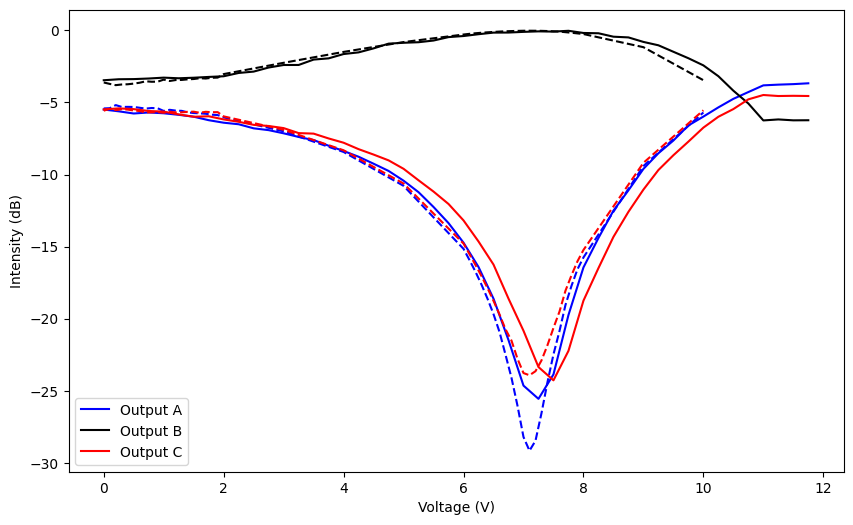

In [220]:
datadir = 'C:/Users/Pradip/Desktop/Sanny-PIC/2025-09-22-Active_splitters/'
output_A_OSA  = np.load(datadir+"1x3Tri_5a_outputA.npy")
output_B_OSA  = np.load(datadir+"1x3Tri_5a_outputB.npy")
output_C_OSA  = np.load(datadir+"1x3Tri_5a_outputC.npy")
voltages_OSA = np.load(datadir+"1x3Tri_5a_voltages.npy")
norm_OSA = output_A_OSA + output_B_OSA + output_C_OSA

plt.figure(figsize=(10,6))
plt.plot(voltages, 10*np.log10(outputs[:,0]/np.mean(norm)), color='b', label='Output A')
plt.plot(voltages_OSA, 10*np.log10(output_A_OSA/norm_OSA), color='b', linestyle='dashed')
plt.plot(voltages, 10*np.log10(outputs[:,1]/np.mean(norm)), color='k', label='Output B')
plt.plot(voltages_OSA, 10*np.log10(output_B_OSA/norm_OSA), color='k', linestyle='dashed')
plt.plot(voltages, 10*np.log10(outputs[:,2]/np.mean(norm)), color='r', label='Output C')
plt.plot(voltages_OSA, 10*np.log10(output_C_OSA/norm_OSA), color='r', linestyle='dashed')
plt.xlabel('Voltage (V)')
plt.ylabel('Intensity (dB)')
plt.legend()
plt.show()


C:\Users\Pradip\AppData\Local\Temp\ipykernel_3312\1572216593.py:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(x, y, data_reduce, norm=cbar_norm, zorder=0)
C:\Users\Pradip\AppData\Local\Temp\ipykernel_3312\1572216593.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(x, y, masked_overlay, cmap=yellow_cmap, alpha=0.2, zorder=1)


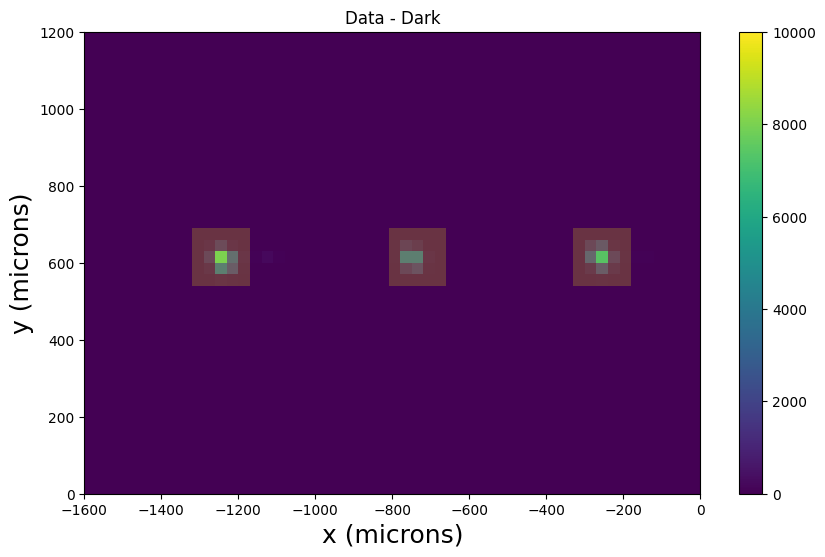

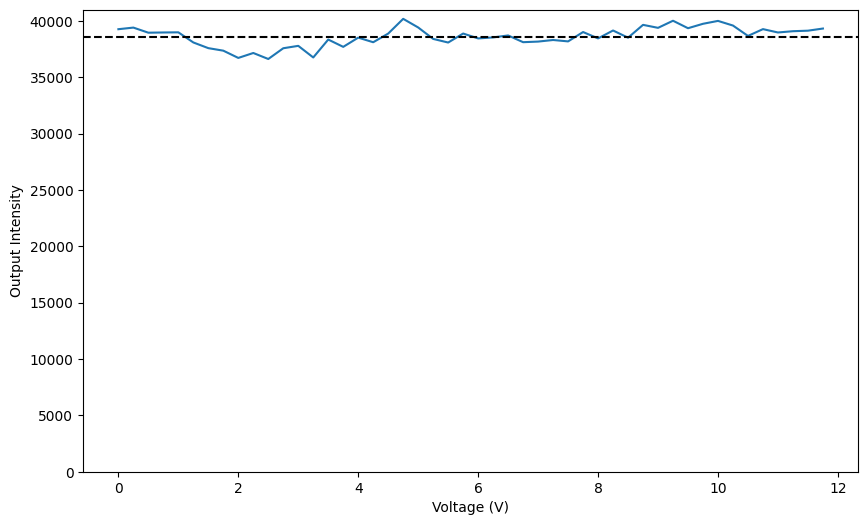

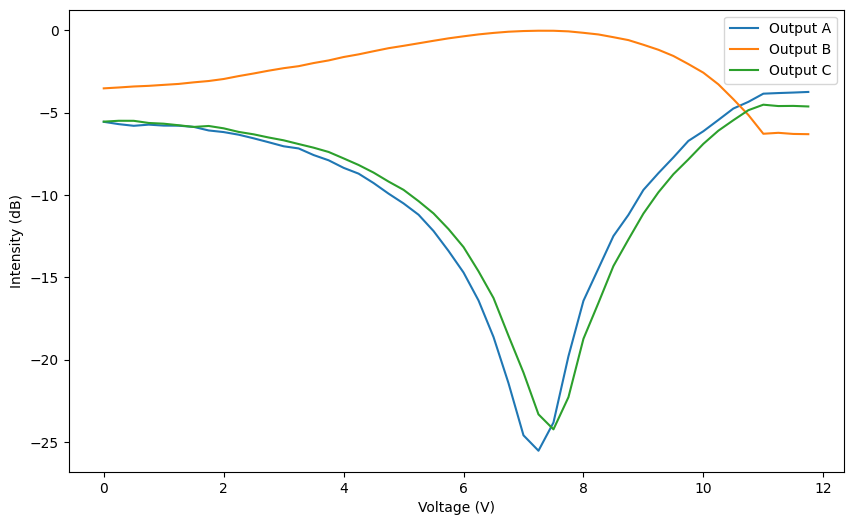

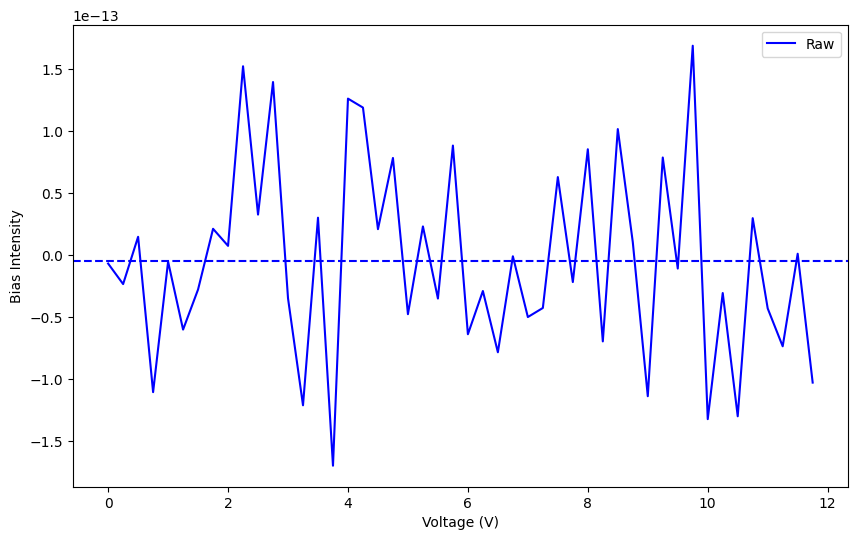

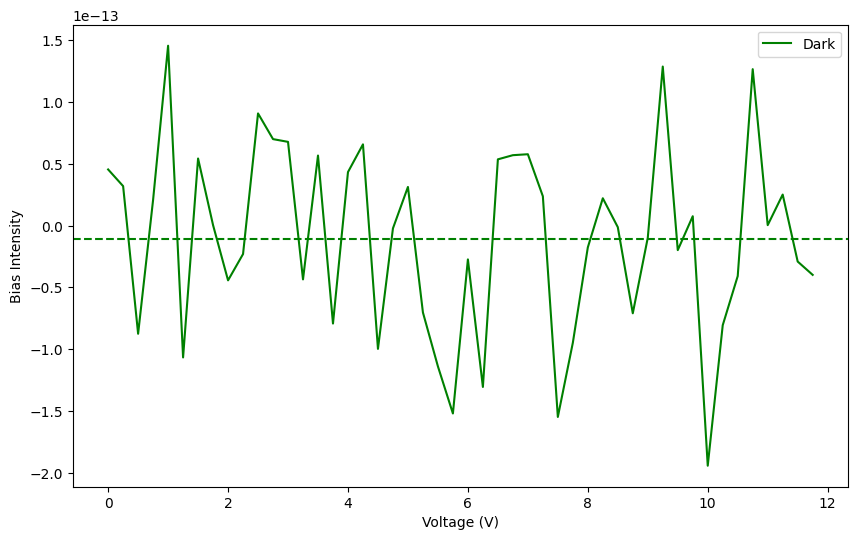

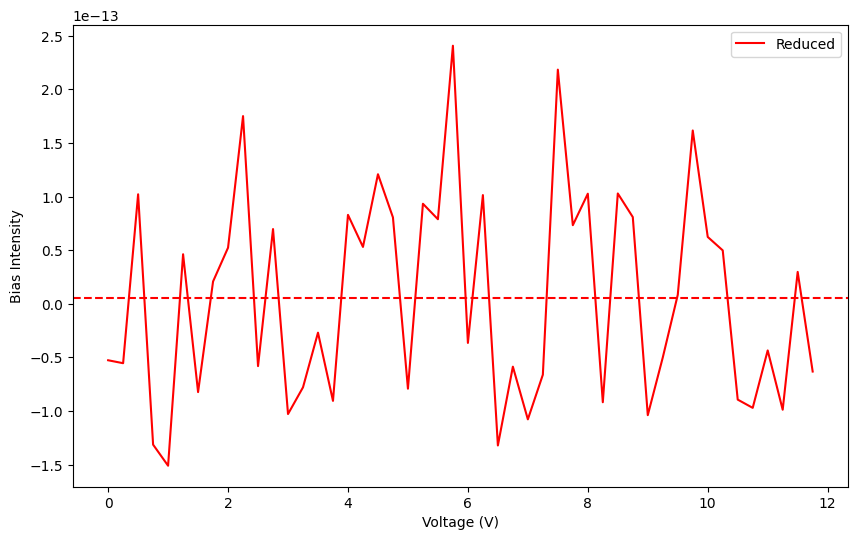

In [213]:
# datas = np.copy(datas_raw)
# darks = np.copy(darks_raw)

# Set up reference image for identifying locations of outputs
voltage_ref = 0
v_str = f"{voltage_ref:.2f}".replace('.', 'p')
filename_ref = glob.glob(data_dir+filename_root+f"*_V{v_str}.csv")[0]
filename_ref_dark = filename.split('.csv')[0] + '_dark.csv'
data = np.loadtxt(filename, delimiter=',')
dark = np.loadtxt(filename_dark, delimiter=',')
data_reduce = data - dark

# Build mask for each output
num_outputs = 3
filtered = scipy.ndimage.maximum_filter(data_reduce, size=5)
mask = (data_reduce == filtered)
coords = np.column_stack(np.nonzero(mask))
coords = coords[np.argsort(data_reduce[coords[:,0], coords[:,1]])][-num_outputs:]
coords = coords[np.argsort(coords[:, 1])]

masks = []
select = 2 # how wide to make mask
for coord in coords:
    mask = np.zeros_like(data, dtype=bool)
    mask[coord[0]-select:coord[0]+select+1, coord[1]-select:coord[1]+select+1] = True 
    masks.append(mask)

yellow_cmap = ListedColormap(['yellow'])

fig, ax = plt.subplots(1, 1, figsize=(10,6))
cbar_norm = colors.Normalize(vmin=0, vmax=10000)  

data_reduce = data - dark
cbar_norm = colors.Normalize(vmin=0, vmax=10000)
ax.pcolormesh(x, y, data_reduce, norm=cbar_norm, zorder=0)
for mask in masks:
    masked_overlay = np.ma.masked_where(~mask, np.ones_like(mask))
    ax.pcolormesh(x, y, masked_overlay, cmap=yellow_cmap, alpha=0.2, zorder=1)
# ax.plot(x[coords[:, 1]], y[coords[:, 0]], 'r+')
fig.colorbar(im0, ax=ax, fraction=0.05*y_dim/x_dim)
ax.set_xlabel('x (microns)', fontsize=18)
ax.set_ylabel('y (microns)', fontsize=18)
ax.set_title('Data - Dark')
ax.set_xlim(-1600, 0)
ax.set_ylim(0, 1200)
ax.set_aspect('equal')
plt.show()

# Extract and plot intensities from each output in each frame
outputs = []
frames = []
biases = []
for i, voltage in enumerate(voltages):
    # Read in frame
    output = []
    data = datas[i]
    dark = darks[i]
 
    # Subtract stripes
    mask_stripes = np.copy(mask)
    inds = np.argwhere(mask_stripes==True)
    inds_rows = list(set(inds[:,0]))
    ind_min, ind_max = np.min(inds_rows), np.max(inds_rows)
    inds_rows = np.arange(ind_min - 2*(ind_max-ind_min), ind_max + 2*(ind_max-ind_min))
    for ind in inds_rows:
        mask_stripes[ind,:] = True

    data_stripes, dark_stripes = np.copy(data), np.copy(dark)
    data_stripes[mask_stripes] = np.nan
    dark_stripes[mask_stripes] = np.nan

    # plt.figure()
    # plt.plot(np.nanmean(data_stripes, axis=0))
    # plt.plot(np.nanmean(dark, axis=0))
    # plt.show()

    datas[i] = data - np.nanmean(data_stripes, axis=0)
    darks[i] = dark - np.nanmean(dark_stripes, axis=0)
    
    # Subtract darks from data
    data_reduce = datas[i] - darks[i]

    biases.append([np.nanmean(datas[i][~mask_stripes]), np.nanmean(darks[i][~mask_stripes]), np.nanmean(data_reduce[~mask_stripes])])

    # Extract output intensities
    for mask in masks:
        output.append(np.sum(data_reduce[mask]))
    outputs.append(output)

norm = np.max(np.array(datas) - np.array(darks))
for i, voltage in enumerate(voltages):
    data = datas[i]
    dark = darks[i]

    y_dim, x_dim = np.shape(data)
    x = np.linspace(-x_dim/2 * 30, (x_dim/2 - 1) * 30, x_dim)
    y = np.linspace(-y_dim/2 * 30,(y_dim/2 - 1) * 30, y_dim)

    # data_reduce = data - dark
    # cbar_norm = colors.Normalize(vmin=0, vmax=8000)

    # data_reduce[data_reduce <= 0] = np.min(data_reduce[data_reduce > 0])
    # data_reduce = 10*np.log10(data_reduce/norm)
    # cbar_norm = colors.Normalize(vmin=-40, vmax=0)

#     fig, ax = plt.subplots(1, 3, figsize=(24,5))
#     cbar_norm = colors.Normalize(vmin=0, vmax=10000) 
#     im0 = ax[0].pcolormesh(x, y, data, norm=cbar_norm)
#     im1 = ax[1].pcolormesh(x, y, dark, norm=cbar_norm)     
#     im2 = ax[2].pcolormesh(x, y, data_reduce, norm=cbar_norm)
#     fig.colorbar(im0, ax=ax[0], fraction=0.05*y_dim/x_dim)
#     fig.colorbar(im1, ax=ax[1], fraction=0.05*y_dim/x_dim)
#     fig.colorbar(im2, ax=ax[2], fraction=0.05*y_dim/x_dim)
#     ax[1].set_xlabel('x (microns)', fontsize=18)
#     ax[0].set_ylabel('y (microns)', fontsize=18)
#     ax[0].set_title('Data')
#     ax[1].set_title('Dark')
#     ax[2].set_title('Data - Dark')
#     for i in range(3):
#         ax[i].set_xlim(-1600, 0)
#         ax[i].set_ylim(0, 1200)
#         ax[i].set_aspect('equal')
#     fig.suptitle(f"Voltage: {voltage:0.2f} V", fontsize=20)

#     buf = io.BytesIO()
#     plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0)
#     plt.show()
#     plt.close(fig)
#     buf.seek(0)
    
#     frames.append(imageio.imread(buf))

# imageio.mimsave(data_dir+filename_root+"_noStripes_dB.gif", frames, fps=5, loop=0)

outputs = np.array(outputs)
norm = np.sum(outputs, axis=1)

# Plots
plt.figure(figsize=(10,6))
plt.plot(voltages, norm)
plt.axhline(np.mean(norm), linestyle='dashed', color='k')
plt.ylim(0, 41000)
plt.xlabel('Voltage (V)')
plt.ylabel('Output Intensity')
plt.show()

# norm = np.mean(norm)

plt.figure(figsize=(10,6))
plt.plot(voltages, 10*np.log10(outputs[:,0]/norm), label='Output A')
plt.plot(voltages, 10*np.log10(outputs[:,1]/norm), label='Output B')
plt.plot(voltages, 10*np.log10(outputs[:,2]/norm), label='Output C')
plt.xlabel('Voltage (V)')
plt.ylabel('Intensity (dB)')
plt.legend()
plt.show()

biases = np.array(biases)
plt.figure(figsize=(10,6))
plt.plot(voltages, biases[:, 0], 'b', label='Raw')
plt.axhline(np.mean(biases[:, 0]), color='b', linestyle='dashed')
# plt.plot(voltages, biases[:, 1], 'r', label='Reduced, stripes removed')
# plt.axhline(np.mean(biases[:, 1]), color='r', linestyle='dashed')
plt.xlabel('Voltage (V)')
plt.ylabel('Bias Intensity')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
# plt.plot(voltages, biases[:, 0], 'b', label='Raw, stripes removed')
# plt.axhline(np.mean(biases[:, 0]), color='b', linestyle='dashed')
plt.plot(voltages, biases[:, 1], 'g', label='Dark')
plt.axhline(np.mean(biases[:, 1]), color='g', linestyle='dashed')
plt.xlabel('Voltage (V)')
plt.ylabel('Bias Intensity')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
# plt.plot(voltages, biases[:, 0], 'b', label='Raw, stripes removed')
# plt.axhline(np.mean(biases[:, 0]), color='b', linestyle='dashed')
plt.plot(voltages, biases[:, 2], 'r', label='Reduced')
plt.axhline(np.mean(biases[:, 2]), color='r', linestyle='dashed')
plt.xlabel('Voltage (V)')
plt.ylabel('Bias Intensity')
plt.legend()
plt.show()

C:\Users\Pradip\AppData\Local\Temp\ipykernel_25912\1156580924.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im0 = ax[0].pcolormesh(x, y, data, norm=cbar_norm)
C:\Users\Pradip\AppData\Local\Temp\ipykernel_25912\1156580924.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im1 = ax[1].pcolormesh(x, y, dark, norm=cbar_norm)
C:\Users\Pradip\AppData\Local\Temp\ipykernel_25912\1156580924.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have t

Text(0.5, 0.98, 'Voltage: 11.75 V')

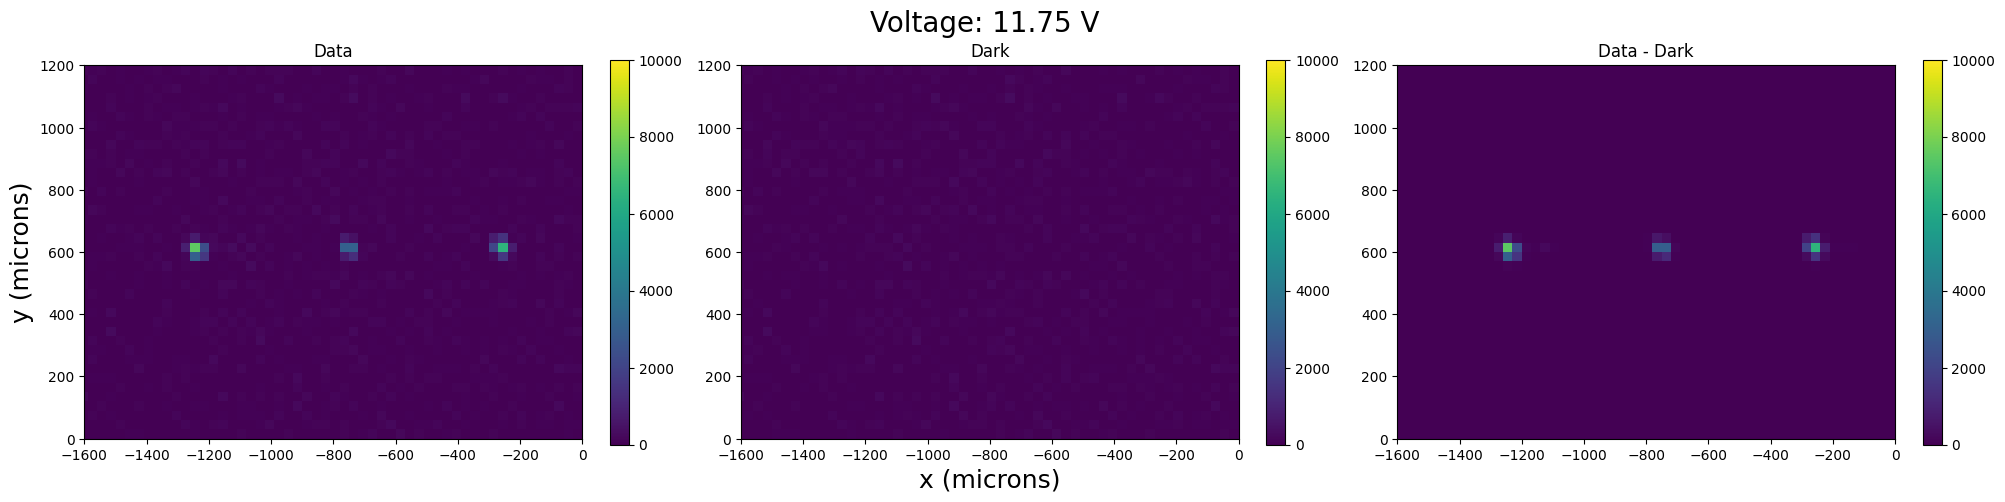

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(24,5))
cbar_norm = colors.Normalize(vmin=0, vmax=10000) 
im0 = ax[0].pcolormesh(x, y, data, norm=cbar_norm)
im1 = ax[1].pcolormesh(x, y, dark, norm=cbar_norm)     
im2 = ax[2].pcolormesh(x, y, data_reduce, norm=cbar_norm)
fig.colorbar(im0, ax=ax[0], fraction=0.05*y_dim/x_dim)
fig.colorbar(im1, ax=ax[1], fraction=0.05*y_dim/x_dim)
fig.colorbar(im2, ax=ax[2], fraction=0.05*y_dim/x_dim)
ax[1].set_xlabel('x (microns)', fontsize=18)
ax[0].set_ylabel('y (microns)', fontsize=18)
ax[0].set_title('Data')
ax[1].set_title('Dark')
ax[2].set_title('Data - Dark')
for i in range(3):
    ax[i].set_xlim(-1600, 0)
    ax[i].set_ylim(0, 1200)
    ax[i].set_aspect('equal')
fig.suptitle(f"Voltage: {voltage:0.2f} V", fontsize=20)

# Plot 3D voltage scan

Construct output reference masks

In [3]:
data_dir = 'C:\\Users\\Pradip\\Desktop\\Sanny-PIC\\2025-12-12-Calibration\\test_scan\\'
filename_root = 'Device6a_I18_1x5Tricoupler'
filename_dark = data_dir+filename_root+"_dark.csv"
filename_outputsBright = glob.glob(data_dir+filename_root+"*_outputsBright.npy")[0]
filename_outputsNull = glob.glob(data_dir+filename_root+"*_outputsNull.npy")[0]
voltages_ref, num_outputs = [9, 9, 0.5], 5
plot_lims = [[-3000, 3000], [-1000, 0]]

filename_x, filename_y = glob.glob(data_dir+filename_root+'*_x.csv')[0], glob.glob(data_dir+filename_root+'*_y.csv')[0]
x, y = np.loadtxt(filename_x), np.loadtxt(filename_y)
outputs_bright = np.load(filename_outputsBright)
outputs_null = np.load(filename_outputsNull)

# Voltages
filename_log = glob.glob(data_dir+filename_root+"*.log")[0]
channel_str = filename_log.split(data_dir+filename_root+'_')[-1].split('.log')[0]
channel_str = channel_str.split('_')
channels = [int(channel.split('Ch')[-1]) for channel in channel_str]

# Read voltages from data log
log = np.loadtxt(filename_log, delimiter=',')
with open(filename_log) as f:
    colnames = f.readline().strip().strip('# ').split(',')
log = np.core.records.fromarrays(log.T, names=colnames)

voltages = []
for channel in channels:
    voltages.append(np.sort(list(set(log['inputVoltage'+str(channel)]))))

Extract outputs

In [4]:
# voltages, outputs = PIC.extract_outputs(data_dir+filename_root, outputs_masks, filename_dark=filename_dark)

output_bright_A, output_bright_B, output_bright_C, output_bright_D, ooutput_bright_E = outputs_bright
output_null_A, output_null_B, output_null_C, output_null_D, ooutput_null_E = outputs_null
voltages_PS1, voltages_PS2, voltages_PS3 = voltages
nulls = 10*np.log10(output_null_C/(output_bright_B + output_bright_C + output_bright_D))

C:\Users\Pradip\AppData\Local\Temp\ipykernel_22492\1959269044.py:6: RuntimeWarning: invalid value encountered in log10
  nulls = 10*np.log10(output_null_C/(output_bright_B + output_bright_C + output_bright_D))


Plot 2D maps of null measurements scanning through PS1 (x-axis), PS2 (y_axis), and PS3 (frame)

C:\Users\Pradip\AppData\Local\Temp\ipykernel_22492\854551023.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = plt.pcolormesh(voltages_PS1, voltages_PS2, nulls[i3,:,:], norm=cbar_norm)


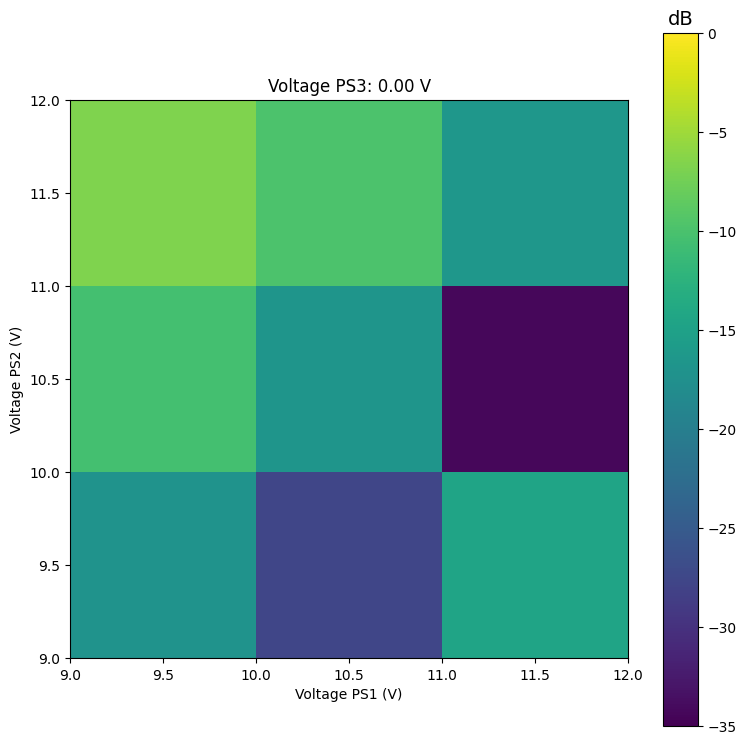

C:\Users\Pradip\AppData\Local\Temp\ipykernel_22492\854551023.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(buf))


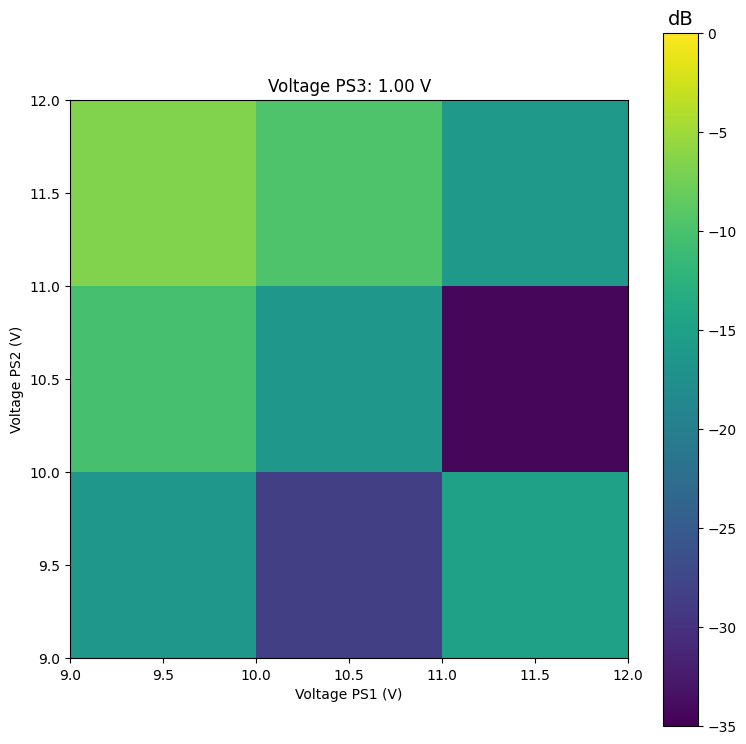

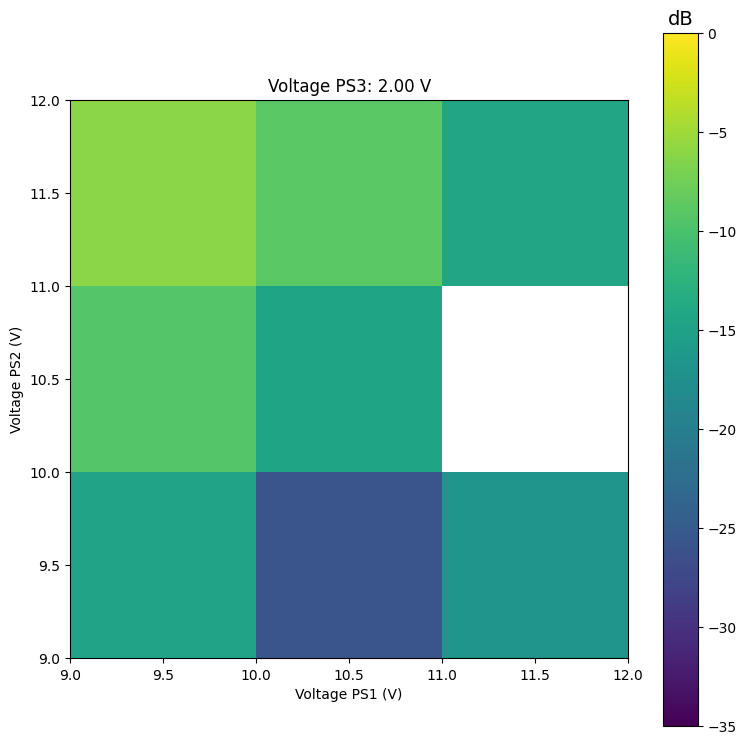

In [5]:
frames = []
for i3, v3 in enumerate(voltages_PS3):
    fig, ax = plt.subplots(1, 1, figsize=(9,9))
    
    cbar_norm = colors.Normalize(vmin=-35, vmax=0) 
    im = plt.pcolormesh(voltages_PS1, voltages_PS2, nulls[i3,:,:], norm=cbar_norm)
    cbar = fig.colorbar(im, ax=ax)
    cbar.ax.set_title('dB', fontsize=14)
    ax.set_aspect('equal')
    plt.xlabel('Voltage PS1 (V)')
    plt.ylabel('Voltage PS2 (V)')
    plt.title(f"Voltage PS3: {v3:.2f} V")

    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close(fig)
    buf.seek(0)
    
    frames.append(imageio.imread(buf))

imageio.mimsave(data_dir+filename_root+"_null.gif", frames, fps=1, loop=0)

Fix PS1, PS3 where min(nulls), scan PS2

C:\Users\Pradip\AppData\Local\Temp\ipykernel_3312\1648281475.py:58: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im0 = ax[0].pcolormesh(x, y, data_reduce_bright, norm=cbar_norm)
C:\Users\Pradip\AppData\Local\Temp\ipykernel_3312\1648281475.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im1 = ax[1].pcolormesh(x, y, data_reduce_null, norm=cbar_norm)


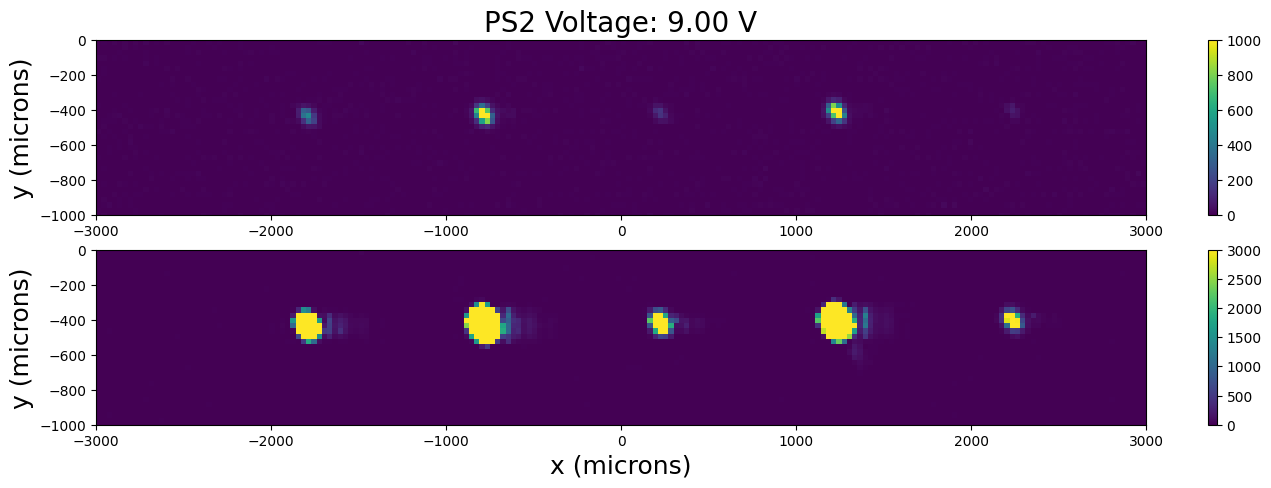

C:\Users\Pradip\AppData\Local\Temp\ipykernel_3312\1648281475.py:80: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(buf))


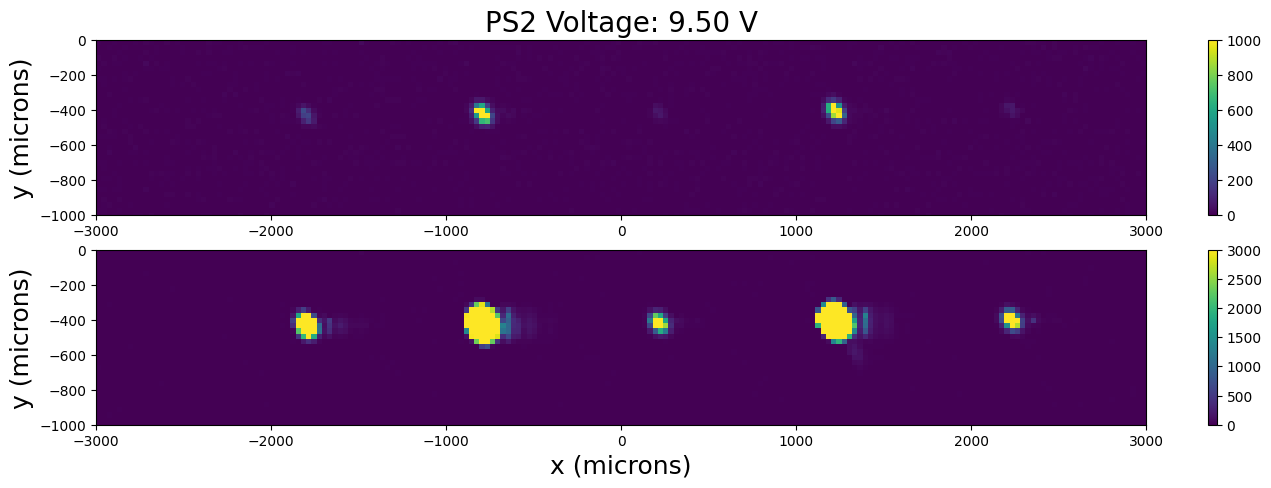

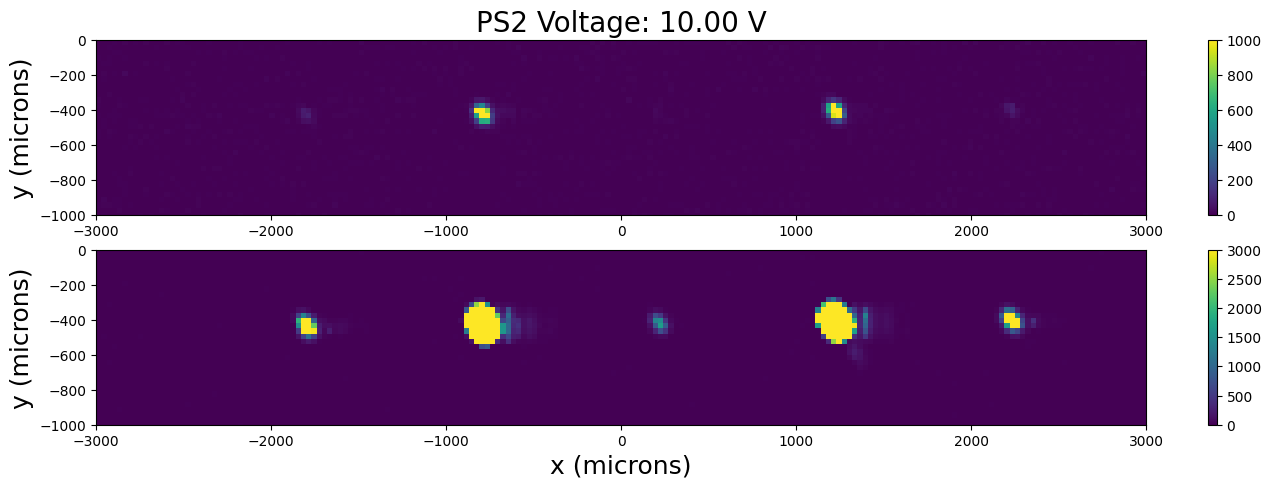

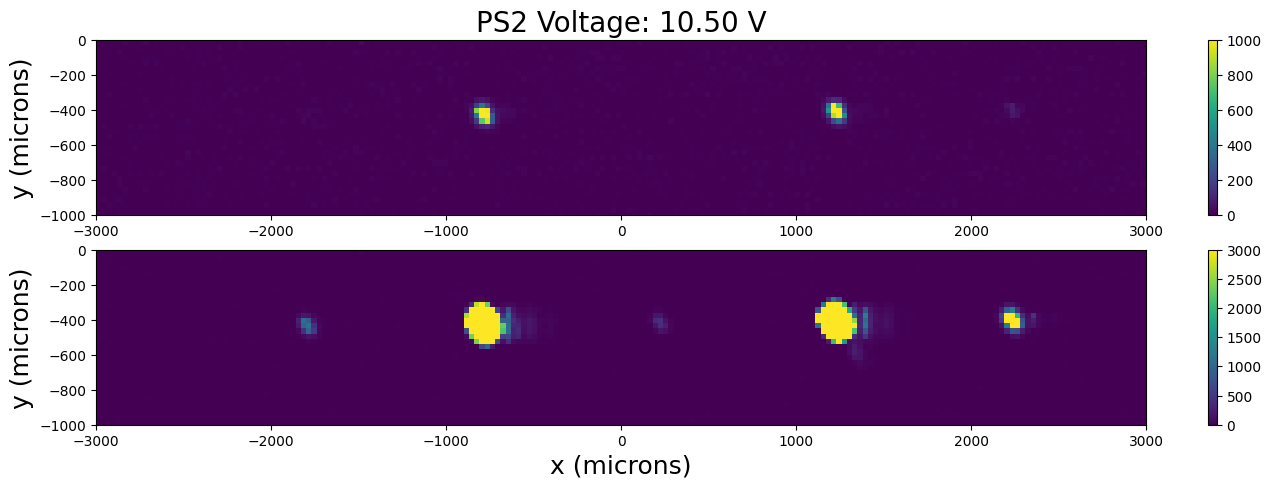

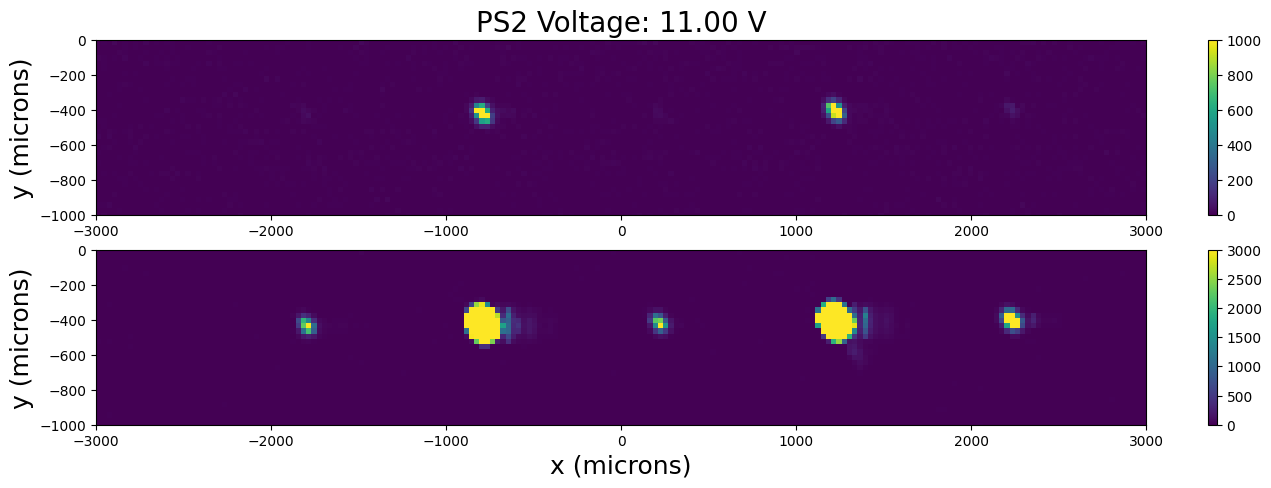

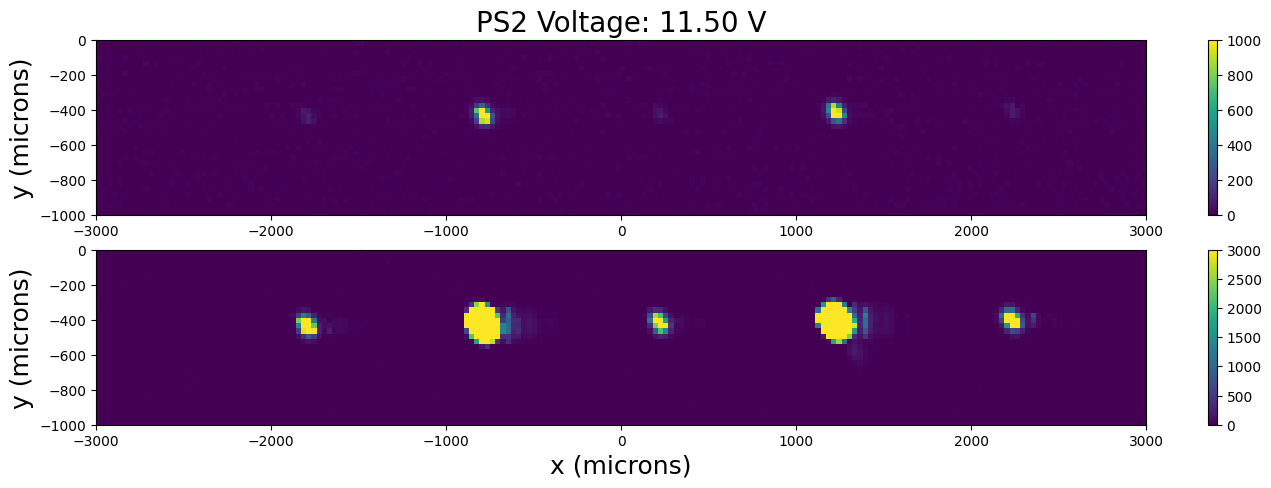

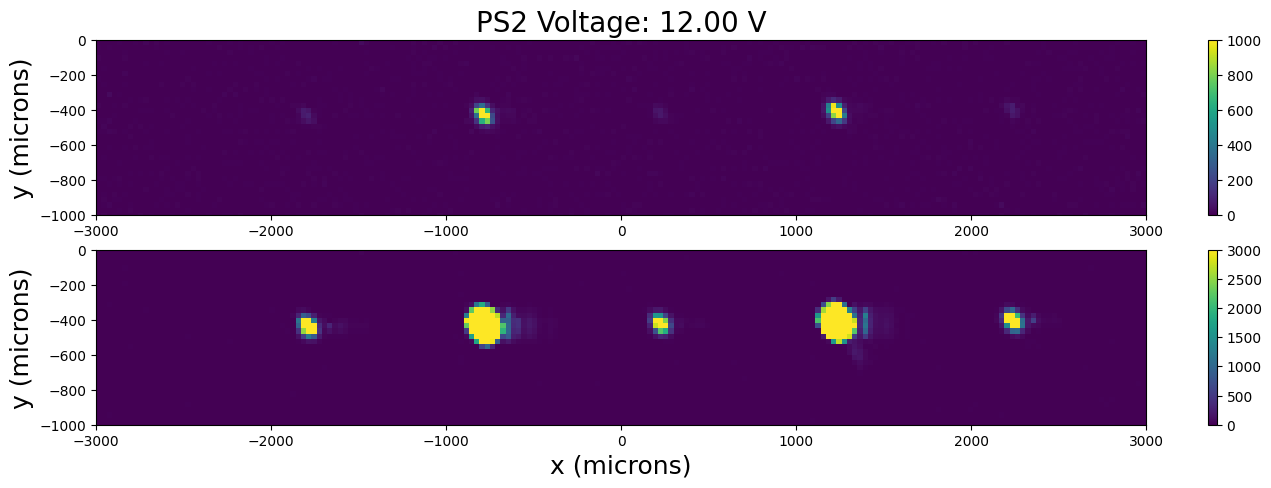

In [207]:
ind = np.nanargmin(nulls)
i_3, i_2, i_1 = np.unravel_index(ind, np.shape(nulls))
v_PS1, v_PS3 = voltages_PS1[i_1], voltages_PS3[i_3]

# Subtract stripes
mask_stripes = np.copy(np.sum(outputs_masks, axis=0))
inds = np.argwhere(mask_stripes==True)
inds_rows = list(set(inds[:,0]))
ind_min, ind_max = np.min(inds_rows), np.max(inds_rows)
inds_rows = np.arange(ind_min - 2*(ind_max-ind_min), ind_max + 2*(ind_max-ind_min))
for ind in inds_rows:
    mask_stripes[ind,:] = True

# Extract and plot intensities from each output in each frame
outputs = []
frames = []
biases = []
for i, v_PS2 in enumerate(voltages_PS2):
    # Read in frame
    output = []

    # Null mode
    v_PS1_str, v_PS2_str, v_PS3_str = f"{v_PS1:.2f}".replace('.', 'p'), f"{v_PS2:.2f}".replace('.', 'p'), f"{v_PS3:.2f}".replace('.', 'p')
    filename = glob.glob(data_dir+filename_root+f"*_V{v_PS1_str}*_V{v_PS2_str}*_V{v_PS3_str}_null.csv")[0]
    # filename_dark = filename.split('.csv')[0] + '_dark.csv'
    data = np.loadtxt(filename, delimiter=',')
    dark = np.loadtxt(filename_dark, delimiter=',')

    data_stripes, dark_stripes = np.copy(data), np.copy(dark)
    data_stripes[mask_stripes] = np.nan
    dark_stripes[mask_stripes] = np.nan

    data = data - np.nanmean(data_stripes, axis=0)
    dark = dark - np.nanmean(dark_stripes, axis=0)
    
    # Subtract darks from data
    data_reduce_null = data - dark

    # Bright mode
    v_PS1_str, v_PS2_str, v_PS3_str = f"{v_PS1:.2f}".replace('.', 'p'), f"{v_PS2:.2f}".replace('.', 'p'), f"{v_PS3:.2f}".replace('.', 'p')
    filename = glob.glob(data_dir+filename_root+f"*_V{v_PS1_str}*_V{v_PS2_str}*_V{v_PS3_str}_bright.csv")[0]
    # filename_dark = filename.split('.csv')[0] + '_dark.csv'
    data = np.loadtxt(filename, delimiter=',')
    dark = np.loadtxt(filename_dark, delimiter=',')

    data_stripes, dark_stripes = np.copy(data), np.copy(dark)
    data_stripes[mask_stripes] = np.nan
    dark_stripes[mask_stripes] = np.nan

    data = data - np.nanmean(data_stripes, axis=0)
    dark = dark - np.nanmean(dark_stripes, axis=0)
    
    # Subtract darks from data
    data_reduce_bright = data - dark

    fig, ax = plt.subplots(2, 1, figsize=(16,5))
    cbar_norm = colors.Normalize(vmin=0, vmax=1000)    
    im0 = ax[0].pcolormesh(x, y, data_reduce_bright, norm=cbar_norm)
    cbar_norm = colors.Normalize(vmin=0, vmax=3000)    
    im1 = ax[1].pcolormesh(x, y, data_reduce_null, norm=cbar_norm)
    # for mask in masks:
    #     masked_overlay = np.ma.masked_where(~mask, np.ones_like(mask))
    #     ax.pcolormesh(x, y, masked_overlay, cmap=yellow_cmap, alpha=0.2, zorder=1)
    fig.colorbar(im0, ax=ax[0], fraction=0.05*1/4)
    fig.colorbar(im1, ax=ax[1], fraction=0.05*1/4)
    ax[1].set_xlabel('x (microns)', fontsize=18)
    for i in range(2):
        ax[i].set_ylabel('y (microns)', fontsize=18)
        ax[i].set_xlim(plot_lims[0])
        ax[i].set_ylim(plot_lims[1])
        ax[i].set_aspect('equal')
    ax[0].set_title(f"PS2 Voltage: {v_PS2:0.2f} V", fontsize=20)

    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close(fig)
    buf.seek(0)
    
    frames.append(imageio.imread(buf))

imageio.mimsave(data_dir+filename_root+"_noStripes_linear.gif", frames, fps=2, loop=0)

In [ ]:
glob.glob

In [2]:
data_dir = 'C:\\Users\\Pradip\\Desktop\\Sanny-PIC\\2025-12-15-Stability_test\\test_scan\\'
filename_root = 'Device6a_I18_1x5Tricoupler'
filename_dark = data_dir+filename_root+"_dark.csv"
filename_outputsBright = glob.glob(data_dir+filename_root+"*_bright.csv")[0]
filename_outputsNull = glob.glob(data_dir+filename_root+"*_null.csv")[0]
plot_lims = [[-3000, 3000], [-800, -200]]

filename_x, filename_y = glob.glob(data_dir+filename_root+'*_x.csv')[0], glob.glob(data_dir+filename_root+'*_y.csv')[0]
x, y = np.loadtxt(filename_x), np.loadtxt(filename_y)
data_bright = np.loadtxt(filename_outputsBright, delimiter=',')
data_null = np.loadtxt(filename_outputsNull, delimiter=',')
dark = np.loadtxt(filename_dark, delimiter=',')

outputs_masks = PIC.build_output_mask(data_null - dark, 5)
dark = dark - np.nanmean(dark, axis=0)

# Subtract stripes
mask_stripes = np.copy(np.sum(outputs_masks, axis=0))
inds = np.argwhere(mask_stripes==True)
inds_rows = list(set(inds[:,0]))
ind_min, ind_max = np.min(inds_rows), np.max(inds_rows)
inds_rows = np.arange(ind_min - 2*(ind_max-ind_min), ind_max + 2*(ind_max-ind_min))
for ind in inds_rows:
    mask_stripes[ind,:] = True

# Extract and plot intensities from each output in each frame
outputs = []
frames = []
biases = []
filename_outputsBright = np.sort(glob.glob(data_dir+filename_root+"*_bright.csv"))
filename_outputsNull = np.sort(glob.glob(data_dir+filename_root+"*_null.csv"))
for i, filename in enumerate(filename_outputsNull[:40]):
    # Read in frame
    output = []

    # Null mode
    data = np.loadtxt(filename, delimiter=',')

    data_stripes, dark_stripes = np.copy(data), np.copy(dark)
    data_stripes[mask_stripes] = np.nan

    data = data - np.nanmean(data_stripes, axis=0)
    
    # Subtract darks from data
    data_reduce_null = data - dark

    # Bright mode
    filename = filename_outputsBright[i]
    data = np.loadtxt(filename, delimiter=',')

    data_stripes, dark_stripes = np.copy(data), np.copy(dark)
    data_stripes[mask_stripes] = np.nan

    data = data - np.nanmean(data_stripes, axis=0)
    
    # Subtract darks from data
    data_reduce_bright = data - dark

    fig, ax = plt.subplots(2, 1, figsize=(16,5))
    cbar_norm = colors.Normalize(vmin=0, vmax=10000)    
    im0 = ax[0].pcolormesh(x, y, data_reduce_bright, norm=cbar_norm)
    cbar_norm = colors.Normalize(vmin=0, vmax=10000)    
    im1 = ax[1].pcolormesh(x, y, data_reduce_null, norm=cbar_norm)
    # for mask in masks:
    #     masked_overlay = np.ma.masked_where(~mask, np.ones_like(mask))
    #     ax.pcolormesh(x, y, masked_overlay, cmap=yellow_cmap, alpha=0.2, zorder=1)
    fig.colorbar(im0, ax=ax[0], fraction=0.05*1/4)
    fig.colorbar(im1, ax=ax[1], fraction=0.05*1/4)
    ax[1].set_xlabel('x (microns)', fontsize=18)
    for i in range(2):
        ax[i].set_ylabel('y (microns)', fontsize=18)
        ax[i].set_xlim(plot_lims[0])
        ax[i].set_ylim(plot_lims[1])
        ax[i].set_aspect('equal')
    # ax[0].set_title(f"PS2 Voltage: {v_PS2:0.2f} V", fontsize=20)

    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close(fig)
    buf.seek(0)
    
    frames.append(imageio.imread(buf))

imageio.mimsave(data_dir+filename_root+"_noStripes_linear_subset_yscale.gif", frames, fps=2, loop=0)

IndexError: list index out of range

Plot all 5 outputs while fixing PS1 and modulating PS2

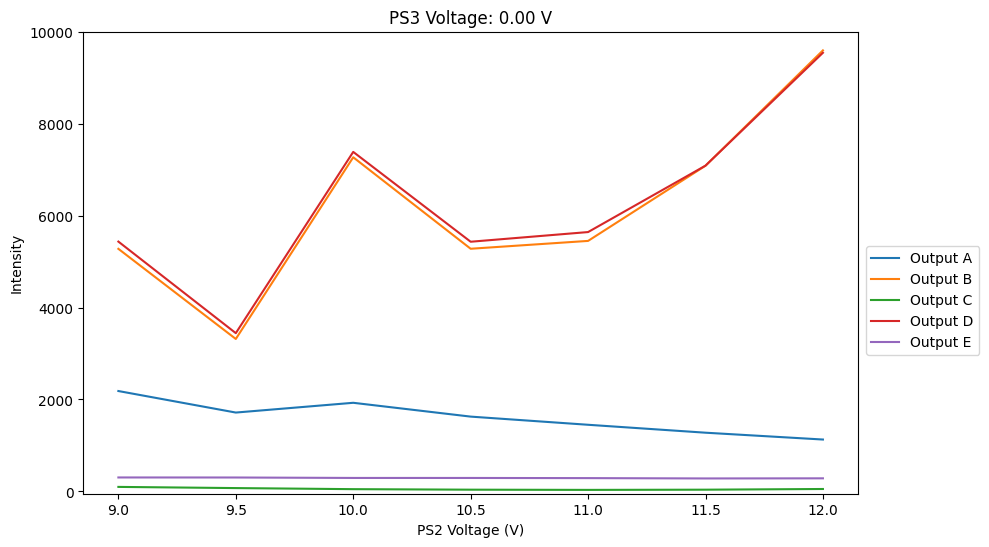

C:\Users\Pradip\AppData\Local\Temp\ipykernel_3312\3299823895.py:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(buf))


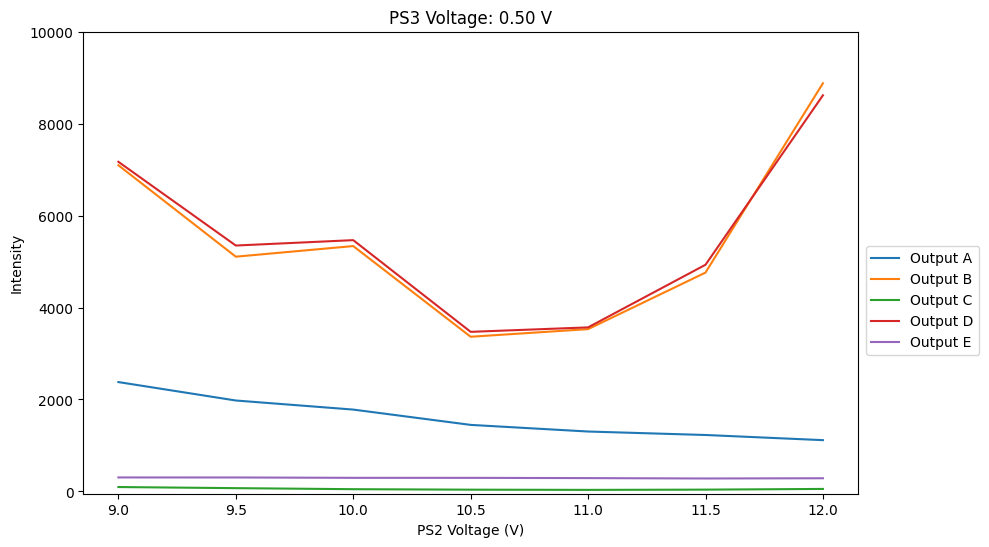

C:\Users\Pradip\AppData\Local\Temp\ipykernel_3312\3299823895.py:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(buf))


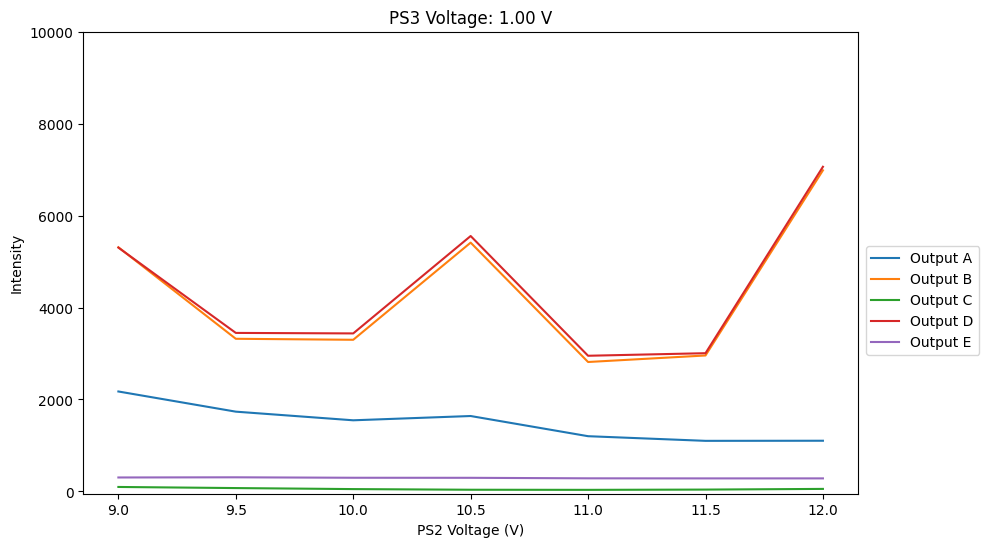

C:\Users\Pradip\AppData\Local\Temp\ipykernel_3312\3299823895.py:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(buf))


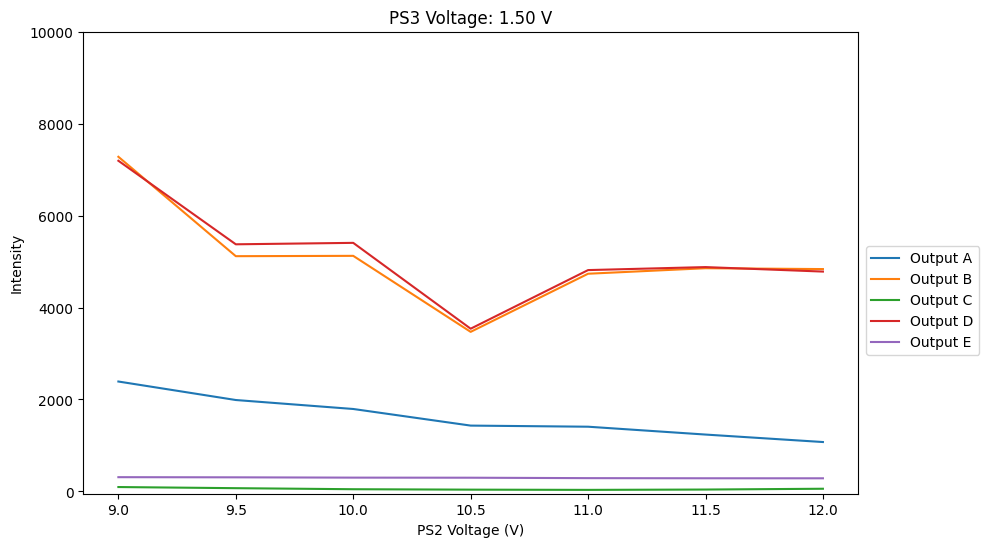

C:\Users\Pradip\AppData\Local\Temp\ipykernel_3312\3299823895.py:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(buf))


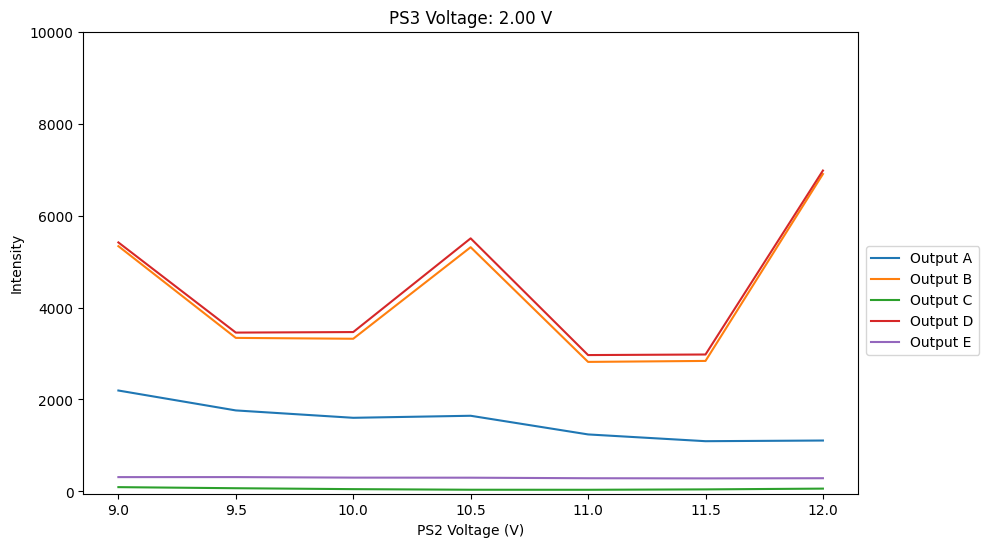

C:\Users\Pradip\AppData\Local\Temp\ipykernel_3312\3299823895.py:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(buf))


In [198]:
ind = np.nanargmin(nulls)
i_3, i_2, i_1 = np.unravel_index(ind, np.shape(nulls))
v_PS1, v_PS3 = voltages_PS1[i_1], voltages_PS3[i_3]

# Extract and plot intensities from each output in each frame
frames = []
for i_3, v_PS3 in enumerate(voltages_PS3):
    outputs = []
    for i_2, v_PS2 in enumerate(voltages_PS2):
        # Read in frame
        output = [outputs_A[i_3, i_2, i_1], outputs_B[i_3, i_2, i_1], outputs_C[i_3, i_2, i_1], outputs_D[i_3, i_2, i_1], outputs_E[i_3, i_2, i_1]]
        outputs.append(output)
    outputs = np.array(outputs)

    plt.figure(figsize=(10,6))
    plt.plot(voltages_PS2, outputs[:, 0], label='Output A')
    plt.plot(voltages_PS2, outputs[:, 1], label='Output B')
    plt.plot(voltages_PS2, outputs[:, 2], label='Output C')
    plt.plot(voltages_PS2, outputs[:, 3], label='Output D')
    plt.plot(voltages_PS2, outputs[:, 4], label='Output E')
    plt.xlabel('PS2 Voltage (V)')
    plt.ylabel('Intensity')
    plt.title(f"PS3 Voltage: {v_PS3:0.2f} V")
    plt.ylim(-50, 10000)
    plt.legend(loc=(1.01, 0.3))
    
    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close(fig)
    buf.seek(0)
    
    frames.append(imageio.imread(buf))

imageio.mimsave(data_dir+filename_root+"_outputs.gif", frames, fps=1, loop=0)

In [201]:
np.min(nulls)

-36.772737416149035